In [1]:
from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# list
colBoth = list()
colCAN = list()
colDON = list()
colDrop = list()
colRemove = list()
colLabel = list()
colOrdinal = list()
colNominal = list()

# set seaborn theme
sns.set_theme()

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

# import user functions
import UserFunctions as uf

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# import data
df = pd.read_pickle("../Data/cleanDF_5_years.pkl")
# import data dictionary
df_dict = pd.read_pickle("../Data/columnDefinition.pkl")
# import flat file
df_flat = pd.read_csv("../Data/flatfile.csv")

# remove empty spaces from column index
df_dict.columns = df_dict.columns.str.strip()
df.columns = df.columns.str.strip()

# add new column on df_dict
df_dict['Information'] = 'N/A'

In [3]:
# display data
df.head()

,NUM_PREV_TX,THORACIC_DGN,GENDER,ABO,WGT_KG_TCR,HGT_CM_TCR,BMI_TCR,CITIZENSHIP,PERM_STATE,EDUCATION,ECMO_TCR,IABP_TCR,INOTROPES_TCR,PGE_TCR,OTH_LIFE_SUP_TCR,VAD_DEVICE_TY_TCR,VAD_BRAND1_TCR,FUNC_STAT_TCR,PRI_PAYMENT_TCR,TCR_DGN,DIAB,DIAL_TY_TCR,CEREB_VASC,MALIG_TCR,MOST_RCNT_CREAT,TOT_SERUM_ALBUM,IMPL_DEFIBRIL,HEMO_SYS_TCR,HEMO_PA_DIA_TCR,HEMO_PA_MN_TCR,HEMO_PCW_TCR,HEMO_CO_TCR,INOTROP_VASO_SYS_TCR,INOTROP_VASO_DIA_TCR,INOTROP_VASO_MN_TCR,INOTROP_VASO_PCW_TCR,INOTROP_VASO_CO_TCR,CIG_USE,TCR_DUR_ABSTAIN,PRIOR_CARD_SURG_TCR,PRIOR_CARD_SURG_TYPE_TCR,PRIOR_CARD_SURG_TYPE_OSTXT_TCR,DAYS_STAT1A,DAYS_STAT2,DAYS_STAT1B,DAYS_STATA4,DAYS_STATA5,DAYS_STATA2,DAYS_STATA3,DAYS_STATA1,DAYS_STATA6,LAST_INACT_REASON,INIT_STAT,REM_CD,TXED,DAYSWAIT_CHRON,END_STAT,INIT_AGE,LIFE_SUP_TCR,ACTIVATE_DATE,END_DATE,INIT_DATE,ETHNICITY,ETHCAT,INIT_HGT_CM_CALC,INIT_WGT_KG_CALC,INIT_BMI_CALC,END_HGT_CM_CALC,END_WGT_KG_CALC,END_BMI_CALC,VENTILATOR_TCR,REGION,VAL_DT_TCR,WORK_INCOME_TCR,BW4,BW6,C1,C2,DR51,DR51_2,DR52,DR52_2,DR53,DR53_2,DQ1,DQ2,FUNC_STAT_TRR,MED_COND_TRR,STATUS_TRR,ADMISSION_DATE,PRI_PAYMENT_TRR,ECMO_TRR,PERM_STATE_TRR,WORK_INCOME_TRR,PGE_TRR,CREAT_TRR,DIAL_AFTER_LIST,HEMO_CO_TRR,HEMO_PA_DIA_TRR,HEMO_PA_MN_TRR,HEMO_PCW_TRR,HEMO_SYS_TRR,IABP_TRR,INFECT_IV_DRUG_TRR,INOTROPES_TRR,INOTROP_VASO_CO_TRR,INOTROP_VASO_DIA_TRR,INOTROP_VASO_MN_TRR,INOTROP_VASO_PCW_TRR,INOTROP_VASO_SYS_TRR,OTH_LIFE_SUP_TRR,PRIOR_LUNG_SURG_TRR,PST_AIRWAY,ACUTE_REJ_EPI,PST_STROKE,PST_DIAL,PST_PACEMAKER,STEROID,TBILI,TRANSFUSIONS,VAD_DEVICE_TY_TRR,VAD_BRAND1_TRR,VENT_SUPPORT_TRR,VENTILATOR_TRR,INHALED_NO_TRR,PRIOR_CARD_SURG_TYPE_TRR,HBV_CORE,HBV_SUR_ANTIGEN,HBV_SURF_TOTAL,CMV_STATUS,HIV_SEROSTATUS,HCV_SEROSTATUS,EBV_SEROSTATUS,HIV_NAT,HCV_NAT,HBV_NAT,GSTATUS,GTIME,LASTFUNO,PSTATUS,PTIME,PX_STAT,FUNC_STAT_TRF,STATUS_TCR,INHALED_NO_TCR,DON_RETYP,CRSMATCH_DONE,CPRA,CPRA_PEAK,TRTREJ1Y,PREV_TX,PREV_TX_ANY,DA1_DON,DA2_DON,DB1_DON,DB2_DON,DDR1_DON,DDR2_DON,RA1,RA2,RB1,RB2,RDR1,RDR2,AMIS,BMIS,DRMIS,HLAMIS,CITIZENSHIP_DON,HIST_COCAINE_DON,AGE_DON,ETHCAT_DON,HBV_CORE_DON,HBV_SUR_ANTIGEN_DON,ABO_DON,ALCOHOL_HEAVY_DON,DON_TY,GENDER_DON,HOME_STATE_DON,HEP_C_ANTI_DON,NON_HRT_DON,ANTIHYPE_DON,BLOOD_INF_DON,BUN_DON,CREAT_DON,OTHER_INF_DON,PT_DIURETICS_DON,PT_STEROIDS_DON,PT_T3_DON,PT_T4_DON,PT_OTH2_OSTXT_DON,PT_OTH3_OSTXT_DON,PT_OTH1_OSTXT_DON,PULM_INF_DON,SGOT_DON,SGPT_DON,TBILI_DON,URINE_INF_DON,VASODIL_DON,VDRL_DON,CLIN_INFECT_DON,CONTIN_COCAINE_DON,CONTIN_OTH_DRUG_DON,EXTRACRANIAL_CANCER_DON,CANCER_SITE_DON,HIST_CIG_DON,HIST_HYPERTENS_DON,INTRACRANIAL_CANCER_DON,HIST_CANCER_DON,HIST_DIABETES_DON,DIABETES_DON,HIST_OTH_DRUG_DON,SKIN_CANCER_DON,CMV_DON,COD_CAD_DON,DDAVP_DON,DEATH_CIRCUM_DON,DEATH_MECH_DON,RECOVERY_DATE_DON,HEPARIN_DON,ARGININE_DON,INSULIN_DON,HGT_CM_DON_CALC,WGT_KG_DON_CALC,BMI_DON_CALC,HBV_NAT_DON,HCV_NAT_DON,HIV_NAT_DON,PX_STAT_DATE,TX_DATE,DISCHARGE_DATE,TX_TYPE,ABO_MAT,AGE,DIAG,DIAL_PRIOR_TX,ISCHTIME,GRF_STAT,SHARE_TY,LOS,LIFE_SUP_TRR,PRIOR_CARD_SURG_TRR,MALIG,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,DISTANCE,VENT_SUPPORT_AFTER_LIST,PROC_TY_HR,VAL_DT_TRR,RECOV_OUT_US,ADMIT_DATE_DON,PROTEIN_URINE,CARDARREST_NEURO_DON,PO2,HIST_MI_DON,LV_EJECT_METH_DON,LV_EJECT_DON,CORONARY_ANGIO,BIOPSY_DGN,TATTOOS_DON,STATUS_DDR,VAL_DT_DDR,HBSAB_DON,EBV_IGG_CAD_DON,EBV_IGM_CAD_DON,CDC_RISK_HIV_DON,INO_PROCURE_AGENT_1,ECD_DONOR,INOTROP_SUPPORT_DON,REFERRAL_DATE,LISTYR,TRANSFUS_TERM_DON,PO2_FIO2_DON,PCO2_DON,PULM_CATH_DON,BRONCHO_LT_DON,BRONCHO_RT_DON,CHEST_XRAY_DON,PH_DON,HEMATOCRIT_DON
0,0,1000,M,O,95.2543,183.0,28.4808,1,NH,3,0,0,1,0,0,1,NaN,2070,2,1049,3,1,N,N,1.51,NaN,Y,33.0,16.0,23.0,20.0,2.30,N,N,N,N,N,Y,998,N,NaN,NaN,118,0,126,0,0,0,0,0,0,7,2020,4,1,324,2010,45,Y,2016-02-12,2017-01-01,2016-02-12,0,1,182.9,95.3,28.5,182.9,90.7,27.1,0,1,NaN,N,0,0,0,0,0,0,0,0,0,0,0,0,2090,3,V,2017-01-01,10,0,NH,N,0,1.13,N,4.30,19.0,30.0,25.0,44.0,0,N,0,Y,Y,Y,Y,Y,0,N,N,3,N,N,N,N,0.5,Y,2,224.0,Y,0,0,16.0,N,N,N,P,N,N,P,NaN,NaN,NaN,0,1411.0,40,0,1411.0,A,2100,V,0,N,Y,0.0,20.0,N,N,N,2.0,32.0,61.0,98.0,4.0,13.0,NaN

In [4]:
# display data dictionary
df_dict.head()

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
0,ABO,RECIPIENT BLOOD GROUP @ REGISTRATION,TCR,CLINICAL INFORMATION,CHAR,TCR ABO BLOOD GROUP,Unknown,N/A
1,ABO_DON,DONOR BLOOD TYPE,DDR/LDR,DONOR INFORMATION,CHAR,DR BLOOD TYPE,Unknown,N/A
2,ABO_MAT,DONOR-RECIPIENT ABO MATCH LEVEL,CALCULATED,Unknown,CHAR,DONOR-RECIPIENT ABO MATCH LEVEL,Unknown,N/A
3,ACTIVATE_DATE,ALLOCATION TIME BEGINNING DATE,WAITING LIST DATA,WAITING LIST DATA,NUM,WL LISTING BACK DATE,Unknown,N/A
4,ACUTE_REJ_EPI,DID RECIPIENT HAVE ANY ACUTE REJECTION EPISODES PRE DISCHARGE?,TRR,POST TRANSPLANT CLINICAL INFORMATION,NUM,ACUTE REJECTION EPISODE,Unknown,N/A


#### Examine NaNs

In [5]:
# NaN percentage & count
NaNs = uf.percentageNull(df)

# display
NaNs.head(10)

,percentage,NaNCount
TOT_SERUM_ALBUM,97.853965,14956
PRIOR_CARD_SURG_TYPE_TRR,80.731484,12339
PRIOR_CARD_SURG_TYPE_OSTXT_TCR,79.776237,12193
LAST_INACT_REASON,76.478671,11689
CONTIN_COCAINE_DON,73.985868,11308
VAD_BRAND1_TCR,71.918346,10992
INO_PROCURE_AGENT_1,65.185815,9963
PRIOR_CARD_SURG_TYPE_TCR,62.974352,9625
VAD_BRAND1_TRR,61.502225,9400
TCR_DUR_ABSTAIN,57.969118,8860


In [6]:
# columns
colNames = ['GRF_STAT','GSTATUS','GTIME', 'PSTATUS', 'PTIME', 'PX_STAT', 'PX_STAT_DATE', 'TXED', 'TX_TYPE', 'TX_DATE', 'LISTYR',
            'ACTIVATE_DATE', 'INIT_DATE', 'ADMISSION_DATE', 'END_DATE']

# display dictionary
df_dict[df_dict.featureName.isin(colNames)]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
3,ACTIVATE_DATE,ALLOCATION TIME BEGINNING DATE,WAITING LIST DATA,WAITING LIST DATA,NUM,WL LISTING BACK DATE,Unknown,N/A
5,ADMISSION_DATE,RECIPIENT DATE OF ADMISSION TO TX CENTER,TRR,PATIENT STATUS,NUM,TRR DATE OF ADMISSION TO TX CENTER,Unknown,N/A
92,END_DATE,"EARLIEST OF DATES OF REMOVAL FROM WAITING LIST, TRANSPLANT, DEATH, OR TIME COPY OF DATA CREATED",WAITING LIST DATA,WAITING LIST DATA,NUM,ENDING DATE FOR REGISTRATION,"IF PATIENT TRANSPLANTED OR DIED, BUT WAS REMOVED AFTER THE EVENT, END_DATE IS BACKDATED TO GIVE THE DATE OF EVENT",N/A
105,GRF_STAT,GRAFT STATUS,TRR/TRF,CLINICAL INFORMATION,CHAR,GRAFT STATUS,Unknown,N/A
106,GSTATUS,GRAFT FAILED (1=YES),CALCULATED,Unknown,NUM,"BOOLEAN: PAT_STAT IN(""D"",""R"")",Unknown,N/A
107,GTIME,GRAFT LIFESPAN-Days From Transplant to Failure/Death/Last Follow-Up,CALCULATED,Unknown,NUM,FOLLDATE - TX_DATE,Unknown,N/A
155,INIT_DATE,BEGINNING DATE FOR REGISTRATION,WAITING LIST DATA,WAITING LIST DATA,NUM,BEGINNING DATE FOR REGISTRATION,Unknown,N/A
180,LISTYR,ACTUAL YEAR REGISTRANT LISTED (WITHOUT DATE OFFSET),CALCULATED,Unknown,NUM,ACTUAL YEAR REGISTRANT LISTED (WITHOUT DATE OFFSET),Unknown,N/A
213,PSTATUS,"Boolean Most Recent Patient Status (based on composite death date) (1=Dead, 0=Alive)",TRR/TRF-CALCULATED,PATIENT STATUS,NUM,Boolean Most Recent Patient Status (based on composite death date),Unknown,N/A
218,PTIME,Patient Survival Time in days (based on composite death date),CALCULATED,Unknown,NUM,Patient Survival Time in days (based on composite death date),Unknown,N/A


In [7]:
df[colNames].head()

,GRF_STAT,GSTATUS,GTIME,PSTATUS,PTIME,PX_STAT,PX_STAT_DATE,TXED,TX_TYPE,TX_DATE,LISTYR,ACTIVATE_DATE,INIT_DATE,ADMISSION_DATE,END_DATE
0,Y,0,1411.0,0,1411.0,A,2020-11-12,1,O,2017-01-01,2016,2016-02-12,2016-02-12,2017-01-01,2017-01-01
1,N,1,0.0,1,44.0,D,2017-02-14,1,O,2017-01-01,2016,2016-10-25,2016-10-25,2016-12-31,2017-01-01
2,Y,0,1479.0,0,1479.0,A,2021-01-20,1,O,2017-01-02,2016,2012-10-03,2016-12-14,2017-01-01,2017-01-02
3,N,1,370.0,1,370.0,D,2018-01-06,1,O,2017-01-01,2014,2014-09-18,2014-09-18,2016-12-22,2017-01-01
4,Y,0,1438.0,0,1438.0,A,2020-12-09,1,O,2017-01-01,2016,2016-03-02,2016-03-02,2016-12-31,2017-01-01


In [8]:
print(f"Total rows: {df.shape[0]:,} & columns: {df.shape[1]:,}")

Total rows: 15,284 & columns: 281


### NUM_PREV_TX

In [9]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'NUM_PREV_TX', True)

               count      mean       std  min  25%  50%  75%  max
NUM_PREV_TX  15284.0  0.033826  0.192701  0.0  0.0  0.0  0.0  3.0


NUM_PREV_TX    0
dtype: int64
NUM_PREV_TX    int64
dtype: object


NUM_PREV_TX: [0 1 2 3]


In [10]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
189,NUM_PREV_TX,THE NUMBER OF PREVIOUS TRANSPLANTS,WAITING LIST DATA,WAITING LIST DATA,NUM,NUMBER PREVIOUS TX,Unknown,N/A


In [11]:
# mapping
colMap = {'NUM_PREV_TX': 'PreviousTransplantNumber_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = "Ordinal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
189,PreviousTransplantNumber_CAN,THE NUMBER OF PREVIOUS TRANSPLANTS,WAITING LIST DATA,WAITING LIST DATA,Ordinal - NUM,NUMBER PREVIOUS TX,Unknown,{'NUM_PREV_TX': 'PreviousTransplantNumber_CAN'}


### THORACIC_DGN

In [12]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'THORACIC_DGN', True)

                count         mean        std    min     25%     50%     75%  \
THORACIC_DGN  15284.0  1035.347095  63.323031  999.0  1000.0  1007.0  1049.0   

                 max  
THORACIC_DGN  1209.0  


THORACIC_DGN    0
dtype: int64
THORACIC_DGN    Int64
dtype: object


THORACIC_DGN: <IntegerArray>
[1000, 1002, 1007, 1051, 1004, 1006, 1001, 1049, 1201, 1106, 1050, 1102, 1202,
 1105, 1101, 1053, 1200, 1003,  999, 1207, 1099, 1005, 1208, 1054, 1203, 1209,
 1104, 1206, 1052, 1199, 1103, 1100, 1204, 1008, 1009, 1010]
Length: 36, dtype: Int64


In [13]:
# SASAnalysisFormat: ALL_DGN
mapping = {
    999: 'OTHER SPECIFY',
    1000: 'DILATED MYOPATHY: IDIOPATHIC',
    1001: 'DILATED MYOPATHY: ADRIAMYCIN',
    1002: 'DILATED MYOPATHY: POST PARTUM',
    1003: 'DILATED MYOPATHY: FAMILIAL',
    1004: 'DILATED MYOPATHY: MYOCARDITIS',
    1005: 'DILATED MYOPATHY: ALCOHOLIC',
    1006: 'DILATED MYOPATHY: VIRAL',
    1007: 'DILATED MYOPATHY: ISCHEMIC',
    1008: 'DILATED MYOPATHY: VIRAL (NOT COVID-19)',
    1009: 'COVID-19: DILATED MYOPATHY: ACTIVE MYOCARDITIS',
    1010: 'COVID-19: DILATED MYOPATHY: HISTORY OF MYOCARDITIS',
    1049: 'DILATED MYOPATHY: OTHER SPECIFY',
    1050: 'RESTRICTIVE MYOPATHY: IDIOPATHIC',
    1051: 'RESTRICTIVE MYOPATHY: AMYLOIDOSIS',
    1052: 'RESTRICTIVE MYOPATHY: ENDOCARDIAL FIBROS',
    1053: 'RESTRICTIVE MYOPATHY: SARCOIDOSIS',
    1054: 'RESTRICTIVE MYOPATHY: SEC TO RADIAT/CHEM',
    1099: 'RESTRICTIVE MYOPATHY: OTHER SPECIFY',
    1100: 'HEART RE-TX/GF: HYPERACUTE REJECTION',
    1101: 'HEART RE-TX/GF: ACUTE REJECTION',
    1102: 'HEART RE-TX/GF: CORONARY ARTERY DISEASE',
    1103: 'HEART RE-TX/GF: NON-SPECIFIC',
    1104: 'HEART RE-TX/GF: RESTRICTIVE/CONSTRICTIVE',
    1105: 'HEART RE-TX/GF: CHRONIC REJECTION',
    1106: 'HEART RE-TX/GF: PRIMARY FAILURE',
    1199: 'HEART RE-TX/GF: OTHER SPECIFY',
    1200: 'CORONARY ARTERY DISEASE',
    1201: 'HYPERTROPHIC CARDIOMYOPATHY',
    1202: 'VALVULAR HEART DISEASE',
    1203: 'CONGENITAL HEART DEFECT - PRIOR SURGERY UNKNOWN',
    1204: 'CANCER',
    1206: 'CONGENITAL HEART DEFECT - WITHOUT SURGERY',
    1207: 'CONGENITAL HEART DEFECT - WITH SURGERY',
    1208: 'ARRHYTHMOGENIC RIGHT VENTRICULAR DYSPLASIA/CARDIOMYOPATHY',
    1209: 'MUSCULAR DYSTROPHY: OTHER SPECIFY'
}

In [14]:
df = uf.mappingCol(df, 'THORACIC_DGN', mapping)

Converted Column THORACIC_DGN Unique Vaue(s) ['DILATED MYOPATHY: IDIOPATHIC', 'DILATED MYOPATHY: POST PARTUM', 'DILATED MYOPATHY: ISCHEMIC', 'RESTRICTIVE MYOPATHY: AMYLOIDOSIS', 'DILATED MYOPATHY: MYOCARDITIS', ..., 'HEART RE-TX/GF: HYPERACUTE REJECTION', 'CANCER', 'DILATED MYOPATHY: VIRAL (NOT COVID-19)', 'COVID-19: DILATED MYOPATHY: ACTIVE MYOCARDITIS', 'COVID-19: DILATED MYOPATHY: HISTORY OF MYOCARDITIS']
Length: 36
Categories (36, object): ['ARRHYTHMOGENIC RIGHT VENTRICULAR DYSPLASIA/CARDIOMYOPATHY', 'CANCER', 'CONGENITAL HEART DEFECT - PRIOR SURGERY UNKNOWN', 'CONGENITAL HEART DEFECT - WITH SURGERY', ..., 'RESTRICTIVE MYOPATHY: OTHER SPECIFY', 'RESTRICTIVE MYOPATHY: SARCOIDOSIS', 'RESTRICTIVE MYOPATHY: SEC TO RADIAT/CHEM', 'VALVULAR HEART DISEASE']


In [15]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
254,THORACIC_DGN,Waitlist CANDIDATE DIAGNOSIS,WL DATA,Unknown,NUM,WL Thoracic Diagnosis,Unknown,N/A


In [16]:
# mapping
colMap = {'THORACIC_DGN': 'WaitListDiagnosisCode_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary comment
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: ALL_DGN - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - "  + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
254,WaitListDiagnosisCode_CAN,Waitlist CANDIDATE DIAGNOSIS,WL DATA,Unknown,Nominal - NUM,WL Thoracic Diagnosis,Unknown,SASAnalysisFormat: ALL_DGN - {'THORACIC_DGN': 'WaitListDiagnosisCode_CAN'}


### GENDER

In [17]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'GENDER', True)

            count unique top   freq
GENDER      15284      2   M  11175
GENDER_DON  15284      2   M  10916


GENDER        0
GENDER_DON    0
dtype: int64
GENDER        object
GENDER_DON    object
dtype: object


GENDER: ['M' 'F']
GENDER_DON: ['M' 'F']


In [18]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
103,GENDER,RECIPIENT GENDER,TCR,CANDIDATE INFORMATION,CHAR,TCR RECIPIENT GENDER,Unknown,N/A
104,GENDER_DON,DONOR GENDER,DDR/LDR,DONOR INFORMATION,CHAR,DR GENDER,Unknown,N/A


In [19]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()

# mapping
colMap = {'GENDER': 'Gender_CAN', 'GENDER_DON':'Gender_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary comment
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(['Gender_CAN'])
colDON.extend(['Gender_DON'])
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
103,Gender_CAN,RECIPIENT GENDER,TCR,CANDIDATE INFORMATION,Nominal - CHAR,TCR RECIPIENT GENDER,Unknown,"{'GENDER': 'Gender_CAN', 'GENDER_DON': 'Gender_DON'}"
104,Gender_DON,DONOR GENDER,DDR/LDR,DONOR INFORMATION,Nominal - CHAR,DR GENDER,Unknown,"{'GENDER': 'Gender_CAN', 'GENDER_DON': 'Gender_DON'}"


### ABO

In [20]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'ABO', True)

           count unique   top  freq      mean       std  min  25%  50%  75%  \
ABO        15284      8     O  6099       NaN       NaN  NaN  NaN  NaN  NaN   
ABO_DON    15284      8     O  7852       NaN       NaN  NaN  NaN  NaN  NaN   
ABO_MAT  15284.0   <NA>  <NA>  <NA>  1.143287  0.350564  1.0  1.0  1.0  1.0   

         max  
ABO      NaN  
ABO_DON  NaN  
ABO_MAT  3.0  


ABO        0
ABO_DON    0
ABO_MAT    0
dtype: int64
ABO        object
ABO_DON    object
ABO_MAT     Int64
dtype: object


ABO: ['O' 'A' 'B' 'AB' 'A2' 'A1B' 'A1' 'A2B']
ABO_DON: ['O' 'A1' 'A' 'A2' 'B' 'A1B' 'A2B' 'AB']
ABO_MAT: <IntegerArray>
[1, 2, 3]
Length: 3, dtype: Int64


In [21]:
# change to category
df[['ABO','ABO_DON']] = df[['ABO','ABO_DON']].astype('category')

# SASAnalysisFormat: ABOMAT
mapping = {1: 'Identical', 2: 'Compatible', 3: 'Incompatible'}

# map
df = uf.mappingCol(df, 'ABO_MAT', mapping)

Converted Column ABO_MAT Unique Vaue(s) ['Identical', 'Compatible', 'Incompatible']
Categories (3, object): ['Compatible', 'Identical', 'Incompatible']


In [22]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
0,ABO,RECIPIENT BLOOD GROUP @ REGISTRATION,TCR,CLINICAL INFORMATION,CHAR,TCR ABO BLOOD GROUP,Unknown,N/A
1,ABO_DON,DONOR BLOOD TYPE,DDR/LDR,DONOR INFORMATION,CHAR,DR BLOOD TYPE,Unknown,N/A
2,ABO_MAT,DONOR-RECIPIENT ABO MATCH LEVEL,CALCULATED,Unknown,CHAR,DONOR-RECIPIENT ABO MATCH LEVEL,Unknown,N/A


In [23]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'ABO': 'BloodGroup_CAN', 'ABO_DON':'BloodGroup_DON', 'ABO_MAT':'BloodGroupMatchLevel'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary comment
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[[2], 'dataType'] = f"Ordinal"
df_dict.loc[[0,1], 'dataType'] = f"Nominal - "  + df_dict.dataType

# add to list
colCAN.extend(['BloodGroup_CAN'])
colDON.extend(['BloodGroup_DON'])
colBoth.extend(['BloodGroupMatchLevel'])
colOrdinal.extend(['BloodGroupMatchLevel'])
colNominal.extend(['BloodGroup_CAN','BloodGroup_DON'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
0,BloodGroup_CAN,RECIPIENT BLOOD GROUP @ REGISTRATION,TCR,CLINICAL INFORMATION,Nominal - CHAR,TCR ABO BLOOD GROUP,Unknown,"{'ABO': 'BloodGroup_CAN', 'ABO_DON': 'BloodGroup_DON', 'ABO_MAT': 'BloodGroupMatchLevel'}"
1,BloodGroup_DON,DONOR BLOOD TYPE,DDR/LDR,DONOR INFORMATION,Nominal - CHAR,DR BLOOD TYPE,Unknown,"{'ABO': 'BloodGroup_CAN', 'ABO_DON': 'BloodGroup_DON', 'ABO_MAT': 'BloodGroupMatchLevel'}"
2,BloodGroupMatchLevel,DONOR-RECIPIENT ABO MATCH LEVEL,CALCULATED,Unknown,Ordinal,DONOR-RECIPIENT ABO MATCH LEVEL,Unknown,"{'ABO': 'BloodGroup_CAN', 'ABO_DON': 'BloodGroup_DON', 'ABO_MAT': 'BloodGroupMatchLevel'}"


### WGT
- WeightKg_DON & Weight_CAN

In [24]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'WGT')

                    count       mean        std     min       25%     50%  \
END_WGT_KG_CALC   15280.0  84.195884  18.312611  32.500  71.20000  83.500   
INIT_WGT_KG_CALC  15267.0  84.151287  18.488670  31.200  70.90000  83.400   
WGT_KG_CALC       15280.0  84.130380  18.434216  31.900  71.20000  83.300   
WGT_KG_DON_CALC   15282.0  84.294929  19.805666  31.400  70.10000  81.600   
WGT_KG_TCR        15246.0  84.160021  18.714782   9.979  70.90025  83.461   

                      75%    max  
END_WGT_KG_CALC   96.6000  159.1  
INIT_WGT_KG_CALC  96.6000  182.5  
WGT_KG_CALC       96.3250  160.1  
WGT_KG_DON_CALC   95.2000  198.0  
WGT_KG_TCR        96.6151  271.0  


END_WGT_KG_CALC      4
INIT_WGT_KG_CALC    17
WGT_KG_CALC          4
WGT_KG_DON_CALC      2
WGT_KG_TCR          38
dtype: int64
END_WGT_KG_CALC     float64
INIT_WGT_KG_CALC    float64
WGT_KG_CALC         float64
WGT_KG_DON_CALC     float64
WGT_KG_TCR          float64
dtype: object




In [25]:
idx = df[feature][df.WGT_KG_TCR < 35].index
df.loc[idx, ['WGT_KG_TCR','INIT_WGT_KG_CALC','END_WGT_KG_CALC','WGT_KG_CALC','WGT_KG_DON_CALC']]

,WGT_KG_TCR,INIT_WGT_KG_CALC,END_WGT_KG_CALC,WGT_KG_CALC,WGT_KG_DON_CALC
250,32.6590,NaN,NaN,NaN,55.0
1435,28.4860,NaN,77.6,62.6,97.8
1821,31.2000,31.2,37.0,37.0,62.6
1855,30.9350,NaN,68.2,74.4,86.6
2887,32.6590,NaN,NaN,NaN,59.0
3071,25.9460,NaN,57.0,60.3,85.9
3576,29.4840,NaN,NaN,NaN,40.0
3941,33.9280,NaN,78.4,73.3,79.8
4354,26.3540,NaN,58.1,52.2,68.5
4613,34.0000,34.0,37.4,37.4,59.6


In [26]:
# descriptive statistics
df[feature].describe().T

,count,mean,std,min,25%,50%,75%,max
END_WGT_KG_CALC,15280.0,84.195884,18.312611,32.500,71.20000,83.500,96.6000,159.1
INIT_WGT_KG_CALC,15267.0,84.151287,18.488670,31.200,70.90000,83.400,96.6000,182.5
WGT_KG_CALC,15280.0,84.130380,18.434216,31.900,71.20000,83.300,96.3250,160.1
WGT_KG_DON_CALC,15282.0,84.294929,19.805666,31.400,70.10000,81.600,95.2000,198.0
WGT_KG_TCR,15246.0,84.160021,18.714782,9.979,70.90025,83.461,96.6151,271.0


In [27]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
95,END_WGT_KG_CALC,Calculated Candidate Weight in KG at Removal/Current Time,CALCULATED,Unknown,NUM,Calculated Candidate Weight in KG at Removal/Current Time,Unknown,N/A
158,INIT_WGT_KG_CALC,Calculated Candidate Weight in KG at Listing,CALCULATED,Unknown,NUM,Calculated Candidate Weight in KG at Listing,Unknown,N/A
276,WGT_KG_CALC,CALCULATED RECIPIENT WEIGHT (kg),CALCULATED,Unknown,NUM,Calculated Recipient Weight (kg),Unknown,N/A
277,WGT_KG_DON_CALC,CALCULATED DONOR WEIGHT (KG),CALCULATED,Unknown,NUM,Calculated Donor Weight,Unknown,N/A
278,WGT_KG_TCR,RECIPIENT WEIGHT (kg) @ REGISTRATION,TCR,CLINICAL INFORMATION,NUM,TCR WEIGHT (KG) AT TIME OF LISTING,Unknown,N/A


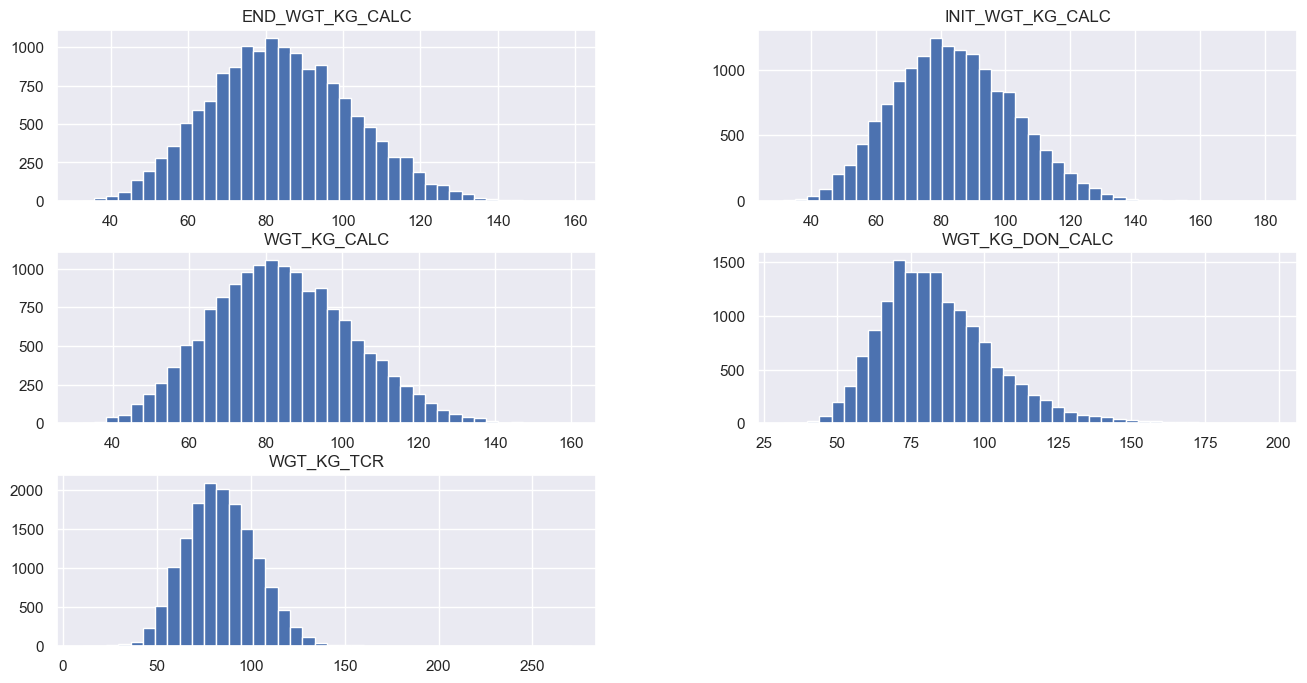

In [28]:
# create a histogram
df[feature].hist(figsize=(16, 8), bins=40);

#### Note:
- Fill NaNs in END_WGT_KG_CALC using WGT_KG_TCR for specified indices

In [29]:
idx = df[feature][df.END_WGT_KG_CALC.isna()].index
df.loc[idx, feature]

,END_WGT_KG_CALC,INIT_WGT_KG_CALC,WGT_KG_CALC,WGT_KG_DON_CALC,WGT_KG_TCR
250,NaN,NaN,NaN,55.0,32.659
2887,NaN,NaN,NaN,59.0,32.659
3576,NaN,NaN,NaN,40.0,29.484
12822,NaN,NaN,NaN,68.0,33.838


In [30]:
# Fill missing values in END_WGT_KG_CALC using WGT_KG_TCR for specified indices
df.loc[idx, 'END_WGT_KG_CALC'] = df.loc[idx, 'WGT_KG_TCR']
# fill missing WGT_KG_DON_CALC with median
df['WGT_KG_DON_CALC'] = df['WGT_KG_DON_CALC'].fillna(df['WGT_KG_DON_CALC'].median())

In [31]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'WGT_KG_DON_CALC': 'WeightKg_DON', 'END_WGT_KG_CALC':'WeightKg_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary comment
df_dict.loc[[158, 276, 278], 'Information'] = f"**DROP**"
df_dict.loc[[95, 277], 'Information'] = f"{colMap} - ** WeightKg_CAN (4 NaNs) updated with END_WGT_KG_CALC Feature & WeightKg_DON (2 NaNs) updated with Median of same Feature **"
df_dict.loc[[95,158,276,277,278], 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colCAN.extend(['WeightKg_CAN'])
colDON.extend(['WeightKg_DON'])

# add to remove column list
colDrop.extend(['INIT_WGT_KG_CALC','WGT_KG_CALC','WGT_KG_TCR'])

# display
df_dict.loc[[95,158,276,277,278]]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
95,WeightKg_CAN,Calculated Candidate Weight in KG at Removal/Current Time,CALCULATED,Unknown,Continuous - NUM,Calculated Candidate Weight in KG at Removal/Current Time,Unknown,"{'WGT_KG_DON_CALC': 'WeightKg_DON', 'END_WGT_KG_CALC': 'WeightKg_CAN'} - ** WeightKg_CAN (4 NaNs) updated with END_WGT_KG_CALC Feature & WeightKg_DON (2 NaNs) updated with Median of same Feature **"
158,INIT_WGT_KG_CALC,Calculated Candidate Weight in KG at Listing,CALCULATED,Unknown,Continuous - NUM,Calculated Candidate Weight in KG at Listing,Unknown,**DROP**
276,WGT_KG_CALC,CALCULATED RECIPIENT WEIGHT (kg),CALCULATED,Unknown,Continuous - NUM,Calculated Recipient Weight (kg),Unknown,**DROP**
277,WeightKg_DON,CALCULATED DONOR WEIGHT (KG),CALCULATED,Unknown,Continuous - NUM,Calculated Donor Weight,Unknown,"{'WGT_KG_DON_CALC': 'WeightKg_DON', 'END_WGT_KG_CALC': 'WeightKg_CAN'} - ** WeightKg_CAN (4 NaNs) updated with END_WGT_KG_CALC Feature & WeightKg_DON (2 NaNs) updated with Median of same Feature **"
278,WGT_KG_TCR,RECIPIENT WEIGHT (kg) @ REGISTRATION,TCR,CLINICAL INFORMATION,Continuous - NUM,TCR WEIGHT (KG) AT TIME OF LISTING,Unknown,**DROP**


### HGT
- Create New HeightCm_difference & HeightCm_DON & HeightCm_CAN

In [32]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'HGT')

                    count        mean        std    min    25%    50%    75%  \
END_HGT_CM_CALC   15284.0  173.798476  10.095670  124.5  167.6  175.3  180.3   
HGT_CM_CALC       15284.0  173.775975  10.138212  126.0  167.6  175.0  180.3   
HGT_CM_DON_CALC   15284.0  174.082465   9.490998  122.0  168.0  175.0  180.3   
HGT_CM_TCR        15195.0  173.765910  10.771815    2.0  168.0  175.0  180.0   
INIT_HGT_CM_CALC  15284.0  173.835887  10.147285  124.5  167.6  175.3  180.3   

                    max  
END_HGT_CM_CALC   213.4  
HGT_CM_CALC       208.3  
HGT_CM_DON_CALC   213.0  
HGT_CM_TCR        218.0  
INIT_HGT_CM_CALC  213.4  


END_HGT_CM_CALC      0
HGT_CM_CALC          0
HGT_CM_DON_CALC      0
HGT_CM_TCR          89
INIT_HGT_CM_CALC     0
dtype: int64
END_HGT_CM_CALC     float64
HGT_CM_CALC         float64
HGT_CM_DON_CALC     float64
HGT_CM_TCR          float64
INIT_HGT_CM_CALC    float64
dtype: object




In [33]:
idx = df[feature][df.HGT_CM_TCR < 30].index
df.loc[idx, feature]

,END_HGT_CM_CALC,HGT_CM_CALC,HGT_CM_DON_CALC,HGT_CM_TCR,INIT_HGT_CM_CALC
4582,190.5,190.5,182.9,6.0,190.5
4991,152.4,149.9,175.3,5.0,152.4
7140,185.4,185.4,177.8,2.0,185.4
7217,170.2,170.2,164.0,2.0,170.2
7757,185.4,185.4,177.8,2.0,185.4
12415,182.9,182.9,163.0,6.0,182.9
12438,167.6,167.6,172.7,6.0,167.6


In [34]:
# descriptive statistics
df[feature].describe().T

,count,mean,std,min,25%,50%,75%,max
END_HGT_CM_CALC,15284.0,173.798476,10.095670,124.5,167.6,175.3,180.3,213.4
HGT_CM_CALC,15284.0,173.775975,10.138212,126.0,167.6,175.0,180.3,208.3
HGT_CM_DON_CALC,15284.0,174.082465,9.490998,122.0,168.0,175.0,180.3,213.0
HGT_CM_TCR,15195.0,173.765910,10.771815,2.0,168.0,175.0,180.0,218.0
INIT_HGT_CM_CALC,15284.0,173.835887,10.147285,124.5,167.6,175.3,180.3,213.4


In [35]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
93,END_HGT_CM_CALC,Calculated Candidate Height in CM at Removal/Current Time,CALCULATED,Unknown,NUM,Calculated Candidate Height in CM at Removal/Current Time,Unknown,N/A
132,HGT_CM_CALC,CALCULATED RECIPIENT HEIGHT(cm),CALCULATED,Unknown,NUM,Calculated Recipient Height (cm),Unknown,N/A
133,HGT_CM_DON_CALC,CALCULATED DONOR HEIGHT (CM),CALCULATED,Unknown,NUM,Calculated Donor Height,Unknown,N/A
134,HGT_CM_TCR,RECIPIENT HEIGHT @ REGISTRATION,TCR,CLINICAL INFORMATION,NUM,TCR HEIGHT (CM) AT TIME OF LISTING,Unknown,N/A
156,INIT_HGT_CM_CALC,Calculated Candidate Height in CM at Listing,CALCULATED,Unknown,NUM,Calculated Candidate Height in CM at Listing,Unknown,N/A


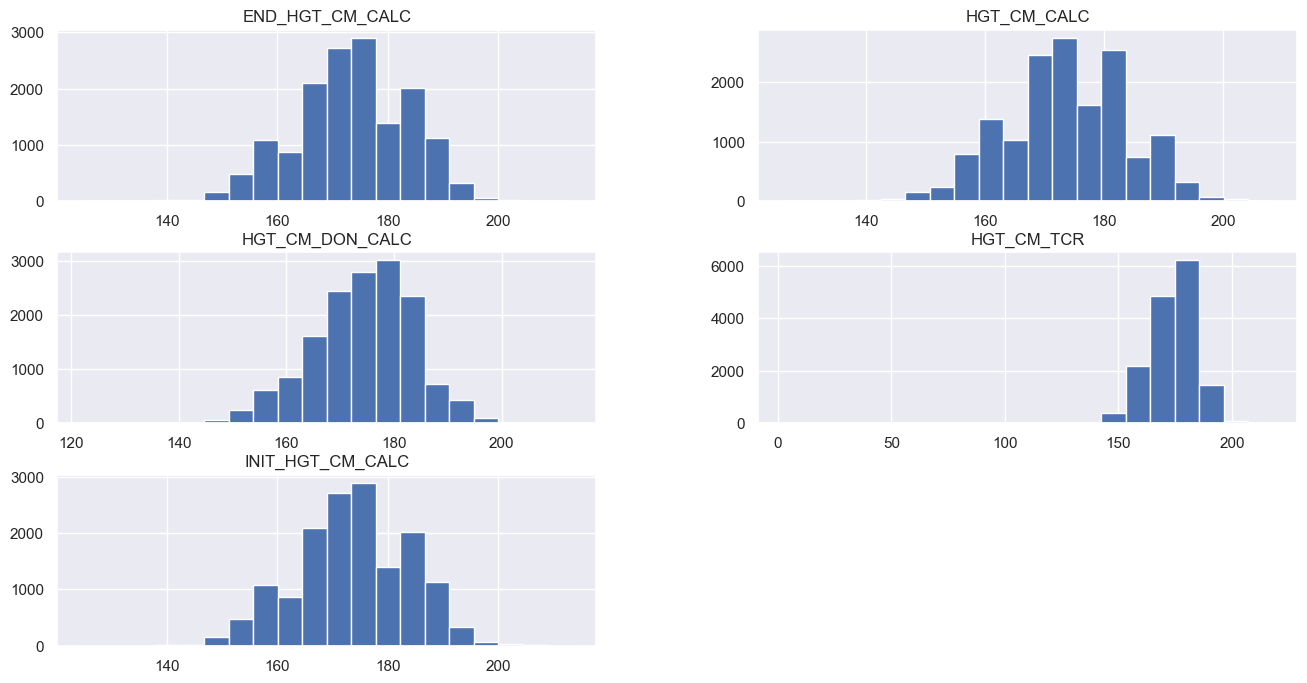

In [36]:
# create a histogram
df[feature].hist(figsize=(16, 8), bins=20);

In [37]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'END_HGT_CM_CALC': 'HeightCm_CAN', 'HGT_CM_DON_CALC':'HeightCm_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary comment
df_dict.loc[[132, 134, 156], 'Information'] = f"**DROP**"
df_dict.loc[[93, 133], 'Information'] = f"{colMap}"
df_dict.loc[[93, 132, 133, 134, 156], 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colCAN.extend(['HeightCm_CAN'])
colDON.extend(['HeightCm_DON'])

# add to remove column list
colDrop.extend(['HGT_CM_CALC','HGT_CM_TCR','INIT_HGT_CM_CALC'])

# display
df_dict.loc[[93, 132, 133, 134, 156]]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
93,HeightCm_CAN,Calculated Candidate Height in CM at Removal/Current Time,CALCULATED,Unknown,Continuous - NUM,Calculated Candidate Height in CM at Removal/Current Time,Unknown,"{'END_HGT_CM_CALC': 'HeightCm_CAN', 'HGT_CM_DON_CALC': 'HeightCm_DON'}"
132,HGT_CM_CALC,CALCULATED RECIPIENT HEIGHT(cm),CALCULATED,Unknown,Continuous - NUM,Calculated Recipient Height (cm),Unknown,**DROP**
133,HeightCm_DON,CALCULATED DONOR HEIGHT (CM),CALCULATED,Unknown,Continuous - NUM,Calculated Donor Height,Unknown,"{'END_HGT_CM_CALC': 'HeightCm_CAN', 'HGT_CM_DON_CALC': 'HeightCm_DON'}"
134,HGT_CM_TCR,RECIPIENT HEIGHT @ REGISTRATION,TCR,CLINICAL INFORMATION,Continuous - NUM,TCR HEIGHT (CM) AT TIME OF LISTING,Unknown,**DROP**
156,INIT_HGT_CM_CALC,Calculated Candidate Height in CM at Listing,CALCULATED,Unknown,Continuous - NUM,Calculated Candidate Height in CM at Listing,Unknown,**DROP**


### BMI_

In [38]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'BMI_')

                 count       mean       std        min        25%       50%  \
BMI_CALC       15276.0  27.728600  4.987464  15.100000  24.100000  27.50000   
BMI_DON_CALC   15280.0  27.806917  6.169618  14.351881  23.510884  26.73374   
BMI_TCR        15187.0  27.711521  5.044589   2.983700  24.070800  27.48150   
END_BMI_CALC   15276.0  27.735075  4.897845  15.000000  24.100000  27.50000   
INIT_BMI_CALC  15258.0  27.711948  4.956136  15.000000  24.100000  27.50000   

                     75%        max  
BMI_CALC       31.300000  47.900000  
BMI_DON_CALC   30.961246  74.360965  
BMI_TCR        31.322200  79.739200  
END_BMI_CALC   31.300000  46.300000  
INIT_BMI_CALC  31.300000  68.300000  


BMI_CALC          8
BMI_DON_CALC      4
BMI_TCR          97
END_BMI_CALC      8
INIT_BMI_CALC    26
dtype: int64
BMI_CALC         float64
BMI_DON_CALC     float64
BMI_TCR          float64
END_BMI_CALC     float64
INIT_BMI_CALC    float64
dtype: object




In [39]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
16,BMI_CALC,Calculated Recipient BMI,CALCULATED,Unknown,NUM,Calculated Recipient BMI,Unknown,N/A
17,BMI_DON_CALC,Donor BMI - Pre/At Donation Calculated,CALCULATED,Unknown,NUM,Calculated Donor BMI,Unknown,N/A
18,BMI_TCR,BMI AT LISTING,TCR,CLINICAL INFORMATION AT LISTING,NUM,TCR BMI,Unknown,N/A
91,END_BMI_CALC,Calculated Candidate BMI at Removal/Current Time,CALCULATED,Unknown,NUM,Calculated Candidate BMI at Removal/Current Time,Unknown,N/A
154,INIT_BMI_CALC,Calculated Candidate BMI at Listing,CALCULATED,Unknown,NUM,Calculated Candidate BMI at Listing,Unknown,N/A


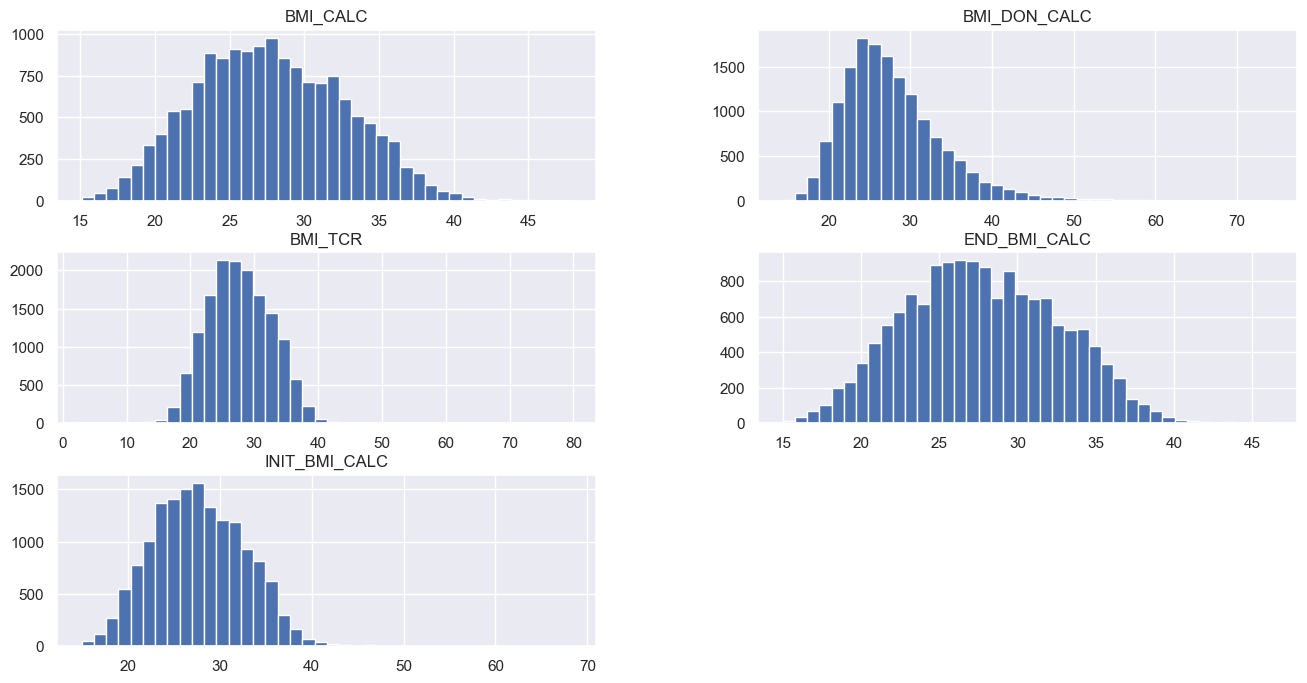

In [40]:
# create a histogram
df[feature].hist(figsize=(16, 8), bins=40);

In [41]:
# END_BMI_CALC
df['END_BMI_CALC'] = df['END_BMI_CALC'].fillna(df['END_BMI_CALC'].mean())
# BMI_DON_CALC
df['BMI_DON_CALC'] = df['BMI_DON_CALC'].fillna(df['BMI_DON_CALC'].median())

In [42]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'END_BMI_CALC': 'BMI_CAN', 'BMI_DON_CALC':'BMI_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary comment
df_dict.loc[[16, 18, 154], 'Information'] = f"**DROP**"
df_dict.loc[[91, 17], 'Information'] = f"{colMap} - ** BMI_CAN (8 NaNs) Mean used to fillna & BMI_DON (4 NaNs) Median used to fillna **"
df_dict.loc[[16, 17, 18, 91, 154], 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colCAN.extend(['BMI_CAN'])
colDON.extend(['BMI_DON'])

# add to remove column list
colDrop.extend(['BMI_CALC','BMI_TCR','INIT_BMI_CALC'])

# display
df_dict.loc[[16, 17, 18, 91, 154]]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
16,BMI_CALC,Calculated Recipient BMI,CALCULATED,Unknown,Continuous - NUM,Calculated Recipient BMI,Unknown,**DROP**
17,BMI_DON,Donor BMI - Pre/At Donation Calculated,CALCULATED,Unknown,Continuous - NUM,Calculated Donor BMI,Unknown,"{'END_BMI_CALC': 'BMI_CAN', 'BMI_DON_CALC': 'BMI_DON'} - ** BMI_CAN (8 NaNs) Mean used to fillna & BMI_DON (4 NaNs) Median used to fillna **"
18,BMI_TCR,BMI AT LISTING,TCR,CLINICAL INFORMATION AT LISTING,Continuous - NUM,TCR BMI,Unknown,**DROP**
91,BMI_CAN,Calculated Candidate BMI at Removal/Current Time,CALCULATED,Unknown,Continuous - NUM,Calculated Candidate BMI at Removal/Current Time,Unknown,"{'END_BMI_CALC': 'BMI_CAN', 'BMI_DON_CALC': 'BMI_DON'} - ** BMI_CAN (8 NaNs) Mean used to fillna & BMI_DON (4 NaNs) Median used to fillna **"
154,INIT_BMI_CALC,Calculated Candidate BMI at Listing,CALCULATED,Unknown,Continuous - NUM,Calculated Candidate BMI at Listing,Unknown,**DROP**


### CITIZENSHIP

In [43]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'CITIZENSHIP', True)

                   count       mean         std  min  25%  50%  75%    max
CITIZENSHIP      15212.0   1.131344    0.659385  1.0  1.0  1.0  1.0    6.0
CITIZENSHIP_DON  15097.0  83.710539  274.830815  1.0  1.0  1.0  1.0  998.0


CITIZENSHIP         72
CITIZENSHIP_DON    187
dtype: int64
CITIZENSHIP        Int64
CITIZENSHIP_DON    Int64
dtype: object


CITIZENSHIP: <IntegerArray>
[1, 4, 6, 5, <NA>]
Length: 5, dtype: Int64
CITIZENSHIP_DON: <IntegerArray>
[1, 998, 4, <NA>, 5]
Length: 5, dtype: Int64


In [44]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: CITIZDDR or CITIZEN
mapping = {1: 'US Citizen', 
           2: 'Resident Alien', 
           3: 'Non-Resident Alien', 
           4: 'Non-US Citizen/US Resident', 
           5: 'Non-US Citizen/Non-US Resident', 
           6: 'Non-US Citizen/Non-US Resident', 
           998: 'Unknown'}

# map
df = uf.mappingCol(df, 'CITIZENSHIP', mapping)
df = uf.mappingCol(df, 'CITIZENSHIP_DON', mapping)

Converted Column CITIZENSHIP Unique Vaue(s) ['US Citizen', 'Non-US Citizen/US Resident', 'Non-US Citizen/Non-US Resident', 'Unknown']
Categories (4, object): ['Non-US Citizen/Non-US Resident', 'Non-US Citizen/US Resident', 'US Citizen', 'Unknown']
Converted Column CITIZENSHIP_DON Unique Vaue(s) ['US Citizen', 'Unknown', 'Non-US Citizen/US Resident', 'Non-US Citizen/Non-US Resident']
Categories (4, object): ['Non-US Citizen/Non-US Resident', 'Non-US Citizen/US Resident', 'US Citizen', 'Unknown']


In [45]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
32,CITIZENSHIP,RECIPIENT CITIZENSHIP @ REGISTRATION,TCR,CANDIDATE INFORMATION,NUM,TCR CITIZENSHIP,Unknown,N/A
33,CITIZENSHIP_DON,DONOR CITIZENSHIP,DDR/LDR,DONOR INFORMATION,NUM,DR CITIZENSHIP,"DECEASED DONORS: CITIZDDR, LIVING DONORS: CITIZEN",N/A


In [46]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CITIZENSHIP': 'Citizenship_CAN', 'CITIZENSHIP_DON':'Citizenship_DON'}

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary comment
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: CITIZDDR or CITIZEN - {colMap} - ** 998: Unknown **"

# add to list
colCAN.extend(['Citizenship_CAN'])
colDON.extend(['Citizenship_DON'])
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
32,Citizenship_CAN,RECIPIENT CITIZENSHIP @ REGISTRATION,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR CITIZENSHIP,Unknown,"SASAnalysisFormat: CITIZDDR or CITIZEN - {'CITIZENSHIP': 'Citizenship_CAN', 'CITIZENSHIP_DON': 'Citizenship_DON'} - ** 998: Unknown **"
33,Citizenship_DON,DONOR CITIZENSHIP,DDR/LDR,DONOR INFORMATION,Nominal - NUM,DR CITIZENSHIP,"DECEASED DONORS: CITIZDDR, LIVING DONORS: CITIZEN","SASAnalysisFormat: CITIZDDR or CITIZEN - {'CITIZENSHIP': 'Citizenship_CAN', 'CITIZENSHIP_DON': 'Citizenship_DON'} - ** 998: Unknown **"


### STATE

In [47]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'STATE', True)

                count unique top  freq
HOME_STATE_DON  15033     53  CA  1458
PERM_STATE      15235     54  CA  1798
PERM_STATE_TRR  14847     54  CA  1753


HOME_STATE_DON    251
PERM_STATE         49
PERM_STATE_TRR    437
dtype: int64
HOME_STATE_DON    object
PERM_STATE        object
PERM_STATE_TRR    object
dtype: object


HOME_STATE_DON: ['MA' 'TN' 'AZ' 'CO' 'MI' 'FL' 'WA' 'TX' 'MO' 'CA' 'PA' 'VA' 'MN' 'OH'
 'CT' 'LA' 'NM' 'SC' 'UT' nan 'NY' 'NC' 'NJ' 'AR' 'DE' 'IN' 'KY' 'OK' 'OR'
 'WI' 'NV' 'GA' 'WV' 'MS' 'IL' 'KS' 'VT' 'MD' 'WY' 'IA' 'AL' 'AK' 'PR'
 'NH' 'ID' 'ZZ' 'ME' 'ND' 'MT' 'SD' 'NE' 'RI' 'DC' 'HI']
PERM_STATE: ['NH' 'VA' 'IA' 'MO' 'MI' 'TN' 'FL' 'CA' 'TX' 'WA' 'OH' 'MN' 'CT' 'IL'
 'LA' 'UT' 'WV' 'NJ' 'OK' 'NC' 'PA' 'MA' 'AR' 'DC' 'IN' 'ME' 'MS' 'NY'
 'KY' 'AZ' 'OR' 'GA' 'CO' 'WI' 'KS' 'MD' 'NE' 'SC' 'SD' 'DE' 'RI' 'VT'
 'WY' 'AL' 'NV' 'MT' 'AK' nan 'ID' 'ND' 'NM' 'HI' 'PR' 'VI' 'ZZ']
PERM_STATE_TRR: ['NH' 'VA' 'IA' 'MO' 'MI' 'TN' 'FL' 'CA' 'TX' 'WA' 'OH' 'MN' 'CT' 'IL'
 'LA

In [48]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
146,HOME_STATE_DON,DR HOME STATE,DDR/LDR,DONOR INFORMATION,CHAR,DR HOME STATE,Unknown,N/A
194,PERM_STATE,RECIPIENT STATE OF RESIDENCY @ REGISTRATION,TCR,CANDIDATE INFORMATION,CHAR,TCR STATE OF RESIDENCY,Unknown,N/A
195,PERM_STATE_TRR,RECIPIENT STATE OF RESIDENCY @ TRANSPLANT,TRR,CANDIDATE INFORMATION,CHAR,TRR STATE OF RESIDENCY,Unknown,N/A


In [49]:
# fill NaN with ZZ: Unknown & convert to category data type
df[feature] = df[feature].fillna('ZZ')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'HOME_STATE_DON':'ResidencyState_DON', 'PERM_STATE': 'ResidencyStateAtRegistration_CAN', 'PERM_STATE_TRR':'ResidencyStateAtTransplant_CAN'}

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**REMOVE** - {colMap} - ** ZZ: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# add to list
colRemove.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
146,ResidencyState_DON,DR HOME STATE,DDR/LDR,DONOR INFORMATION,Nominal - CHAR,DR HOME STATE,Unknown,"**REMOVE** - {'HOME_STATE_DON': 'ResidencyState_DON', 'PERM_STATE': 'ResidencyStateAtRegistration_CAN', 'PERM_STATE_TRR': 'ResidencyStateAtTransplant_CAN'} - ** ZZ: Unknown **"
194,ResidencyStateAtRegistration_CAN,RECIPIENT STATE OF RESIDENCY @ REGISTRATION,TCR,CANDIDATE INFORMATION,Nominal - CHAR,TCR STATE OF RESIDENCY,Unknown,"**REMOVE** - {'HOME_STATE_DON': 'ResidencyState_DON', 'PERM_STATE': 'ResidencyStateAtRegistration_CAN', 'PERM_STATE_TRR': 'ResidencyStateAtTransplant_CAN'} - ** ZZ: Unknown **"
195,ResidencyStateAtTransplant_CAN,RECIPIENT STATE OF RESIDENCY @ TRANSPLANT,TRR,CANDIDATE INFORMATION,Nominal - CHAR,TRR STATE OF RESIDENCY,Unknown,"**REMOVE** - {'HOME_STATE_DON': 'ResidencyState_DON', 'PERM_STATE': 'ResidencyStateAtRegistration_CAN', 'PERM_STATE_TRR': 'ResidencyStateAtTransplant_CAN'} - ** ZZ: Unknown **"


### EDUCATION

In [50]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'EDUCATION', True)

             count       mean         std  min  25%  50%  75%    max
EDUCATION  15210.0  35.403682  173.961105  1.0  3.0  4.0  5.0  998.0


EDUCATION    74
dtype: int64
EDUCATION    Int64
dtype: object


EDUCATION: <IntegerArray>
[3, 5, 6, 4, 998, 2, 1, <NA>]
Length: 8, dtype: Int64


In [51]:
# fill NaN with 1: Unknown & None
df[feature] = df[feature].fillna(999)

# SASAnalysisFormat: EDLEVEL
mapping = {
    1: 'NONE',
    2: 'GRADE SCHOOL (0-8)',
    3: 'HIGH SCHOOL (9-12) or GED',
    4: 'ATTENDED COLLEGE/TECHNICAL SCHOOL',
    5: 'ASSOCIATE/BACHELOR DEGREE',
    6: 'POST-COLLEGE GRADUATE DEGREE',
    996: 'N/A (< 5 YRS OLD)',
    998: "UNKNOWN",
    999: 'UNKNOWN'
}

# map
df = uf.mappingCol(df, 'EDUCATION', mapping)

Converted Column EDUCATION Unique Vaue(s) ['HIGH SCHOOL (9-12) or GED', 'ASSOCIATE/BACHELOR DEGREE', 'POST-COLLEGE GRADUATE DEGREE', 'ATTENDED COLLEGE/TECHNICAL SCHOOL', 'UNKNOWN', 'GRADE SCHOOL (0-8)', 'NONE']
Categories (7, object): ['ASSOCIATE/BACHELOR DEGREE', 'ATTENDED COLLEGE/TECHNICAL SCHOOL', 'GRADE SCHOOL (0-8)', 'HIGH SCHOOL (9-12) or GED', 'NONE', 'POST-COLLEGE GRADUATE DEGREE', 'UNKNOWN']


In [52]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
90,EDUCATION,RECIPIENT HIGHEST EDUCATIONAL LEVEL @ REGISTRATION,TCR,CANDIDATE INFORMATION,NUM,TCR HIGHEST EDUCATIONAL LEVEL,Unknown,N/A


In [53]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'EDUCATION': 'EducationLevel_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: EDLEVEL - {colMap} - ** 999: UNKNOWN **"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
90,EducationLevel_CAN,RECIPIENT HIGHEST EDUCATIONAL LEVEL @ REGISTRATION,TCR,CANDIDATE INFORMATION,Ordinal - NUM,TCR HIGHEST EDUCATIONAL LEVEL,Unknown,SASAnalysisFormat: EDLEVEL - {'EDUCATION': 'EducationLevel_CAN'} - ** 999: UNKNOWN **


### ECMO

In [54]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'ECMO')

            count      mean       std  min  25%  50%  75%  max
ECMO_TCR  15284.0  0.027741  0.164236  0.0  0.0  0.0  0.0  1.0
ECMO_TRR  15284.0  0.039388  0.194522  0.0  0.0  0.0  0.0  1.0


ECMO_TCR    0
ECMO_TRR    0
dtype: int64
ECMO_TCR    int64
ECMO_TRR    int64
dtype: object




In [55]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
88,ECMO_TCR,PATIENT ON LIFE SUPPORT - ECMO @ REGISTRATION,TCR,CANDIDATE INFORMATION,NUM,TCR LIFE SUPPORT ECMO,Unknown,N/A
89,ECMO_TRR,PATIENT ON LIFE SUPPORT - ECMO @ TRANSPLANT,TRR,PATIENT STATUS,NUM,TRR ECMO,Unknown,N/A


In [56]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'ECMO_TCR': 'LifeSupportRegistration_ECMO_CAN', 'ECMO_TRR':'LifeSupportTransplant_ECMO_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary 
df_dict.loc[idx, 'Information'] = f"Extracorporeal membrane oxygenation (ECMO) is a life-support treatment that helps patients with critical heart or lung conditions by temporarily taking \
over the function of the heart and lungs. - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
88,LifeSupportRegistration_ECMO_CAN,PATIENT ON LIFE SUPPORT - ECMO @ REGISTRATION,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR LIFE SUPPORT ECMO,Unknown,"Extracorporeal membrane oxygenation (ECMO) is a life-support treatment that helps patients with critical heart or lung conditions by temporarily taking over the function of the heart and lungs. - {'ECMO_TCR': 'LifeSupportRegistration_ECMO_CAN', 'ECMO_TRR': 'LifeSupportTransplant_ECMO_CAN'}"
89,LifeSupportTransplant_ECMO_CAN,PATIENT ON LIFE SUPPORT - ECMO @ TRANSPLANT,TRR,PATIENT STATUS,Nominal - NUM,TRR ECMO,Unknown,"Extracorporeal membrane oxygenation (ECMO) is a life-support treatment that helps patients with critical heart or lung conditions by temporarily taking over the function of the heart and lungs. - {'ECMO_TCR': 'LifeSupportRegistration_ECMO_CAN', 'ECMO_TRR': 'LifeSupportTransplant_ECMO_CAN'}"


### IABP

In [57]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'IABP', True)

            count      mean       std  min  25%  50%  75%  max
IABP_TCR  15284.0  0.118359  0.323043  0.0  0.0  0.0  0.0  1.0
IABP_TRR  15284.0  0.204004  0.402985  0.0  0.0  0.0  0.0  1.0


IABP_TCR    0
IABP_TRR    0
dtype: int64
IABP_TCR    int64
IABP_TRR    int64
dtype: object


IABP_TCR: [0 1]
IABP_TRR: [0 1]


In [58]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
147,IABP_TCR,PATIENT ON LIFE SUPPORT - IABP @ REGISTRATION,TCR,CANDIDATE INFORMATION,NUM,TCR LIFE SUPPORT IABP,Unknown,N/A
148,IABP_TRR,PATIENT ON LIFE SUPPORT - IABP @ TRANSPLANT,TRR,PATIENT STATUS,NUM,TRR IABP,Unknown,N/A


In [59]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'IABP_TCR': 'LifeSupportRegistration_IABP_CAN', 'IABP_TRR':'LifeSupportTransplant_IABP_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary comment
df_dict.loc[idx, 'Information'] = f"An intra-aortic balloon pump (IABP) is a device that can be used as a lifesaving treatment for patients \
who need help pumping blood throughout their body. It's often used after heart surgery or when a patient is in cardiogenic shock. - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
147,LifeSupportRegistration_IABP_CAN,PATIENT ON LIFE SUPPORT - IABP @ REGISTRATION,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR LIFE SUPPORT IABP,Unknown,"An intra-aortic balloon pump (IABP) is a device that can be used as a lifesaving treatment for patients who need help pumping blood throughout their body. It's often used after heart surgery or when a patient is in cardiogenic shock. - {'IABP_TCR': 'LifeSupportRegistration_IABP_CAN', 'IABP_TRR': 'LifeSupportTransplant_IABP_CAN'}"
148,LifeSupportTransplant_IABP_CAN,PATIENT ON LIFE SUPPORT - IABP @ TRANSPLANT,TRR,PATIENT STATUS,Nominal - NUM,TRR IABP,Unknown,"An intra-aortic balloon pump (IABP) is a device that can be used as a lifesaving treatment for patients who need help pumping blood throughout their body. It's often used after heart surgery or when a patient is in cardiogenic shock. - {'IABP_TCR': 'LifeSupportRegistration_IABP_CAN', 'IABP_TRR': 'LifeSupportTransplant_IABP_CAN'}"


### INOTROPES

In [60]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'INOTROPES', True)

                 count      mean       std  min  25%  50%  75%  max
INOTROPES_TCR  15284.0  0.330673  0.470471  0.0  0.0  0.0  1.0  1.0
INOTROPES_TRR  15284.0  0.367770  0.482214  0.0  0.0  0.0  1.0  1.0


INOTROPES_TCR    0
INOTROPES_TRR    0
dtype: int64
INOTROPES_TCR    int64
INOTROPES_TRR    int64
dtype: object


INOTROPES_TCR: [1 0]
INOTROPES_TRR: [0 1]


In [61]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
159,INOTROPES_TCR,IV INOTROPES @ REGISTRATION,TCR,CANDIDATE INFORMATION,NUM,TCR LIFE SUPPORT IV INOTROPES,Unknown,N/A
160,INOTROPES_TRR,IV INOTROPES @ TRANSPLANT,TRR,PATIENT STATUS,NUM,TRR LIFE SUPPORT IV INOTROPES,Unknown,N/A


In [62]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'INOTROPES_TCR': 'IntropesIVRegistration_CAN', 'INOTROPES_TRR':'IntropesIVTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"They receive inotropic therapy through an IV (through the vein) tube in a large central vein. \
If you're receiving inotropes, your provider will keep checking your heart rhythm, vital signs and fluid levels. \
Some people with end-stage heart failure may go home with IV inotropes. - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
159,IntropesIVRegistration_CAN,IV INOTROPES @ REGISTRATION,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR LIFE SUPPORT IV INOTROPES,Unknown,"They receive inotropic therapy through an IV (through the vein) tube in a large central vein. If you're receiving inotropes, your provider will keep checking your heart rhythm, vital signs and fluid levels. Some people with end-stage heart failure may go home with IV inotropes. - {'INOTROPES_TCR': 'IntropesIVRegistration_CAN', 'INOTROPES_TRR': 'IntropesIVTransplant_CAN'}"
160,IntropesIVTransplant_CAN,IV INOTROPES @ TRANSPLANT,TRR,PATIENT STATUS,Nominal - NUM,TRR LIFE SUPPORT IV INOTROPES,Unknown,"They receive inotropic therapy through an IV (through the vein) tube in a large central vein. If you're receiving inotropes, your provider will keep checking your heart rhythm, vital signs and fluid levels. Some people with end-stage heart failure may go home with IV inotropes. - {'INOTROPES_TCR': 'IntropesIVRegistration_CAN', 'INOTROPES_TRR': 'IntropesIVTransplant_CAN'}"


### PGE

In [63]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'PGE', True)

           count      mean       std  min  25%  50%  75%  max
PGE_TCR  15284.0  0.000458  0.021397  0.0  0.0  0.0  0.0  1.0
PGE_TRR  15284.0  0.001243  0.035237  0.0  0.0  0.0  0.0  1.0


PGE_TCR    0
PGE_TRR    0
dtype: int64
PGE_TCR    int64
PGE_TRR    int64
dtype: object


PGE_TCR: [0 1]
PGE_TRR: [0 1]


In [64]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
196,PGE_TCR,PATIENT ON LIFE SUPPORT: PGE @ REGISTRATION,TCR,CANDIDATE INFORMATION,NUM,TCR LIFE SUPPORT PGE,Unknown,N/A
197,PGE_TRR,PATIENT ON LIFE SUPPORT: PGE @ TRANSPLANT,TRR,PATIENT STATUS,NUM,TRR PGE,Unknown,N/A


In [65]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PGE_TCR': 'LifeSupportRegistration_PGE_CAN', 'PGE_TRR':'LifeSupportTransplant_PGE_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
196,LifeSupportRegistration_PGE_CAN,PATIENT ON LIFE SUPPORT: PGE @ REGISTRATION,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR LIFE SUPPORT PGE,Unknown,"{'PGE_TCR': 'LifeSupportRegistration_PGE_CAN', 'PGE_TRR': 'LifeSupportTransplant_PGE_CAN'}"
197,LifeSupportTransplant_PGE_CAN,PATIENT ON LIFE SUPPORT: PGE @ TRANSPLANT,TRR,PATIENT STATUS,Nominal - NUM,TRR PGE,Unknown,"{'PGE_TCR': 'LifeSupportRegistration_PGE_CAN', 'PGE_TRR': 'LifeSupportTransplant_PGE_CAN'}"


### OTH_LIFE_SUP
- Create New LifeSupport_OTHER_difference

In [66]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'OTH_LIFE_SUP', True)

                    count      mean       std  min  25%  50%  75%  max
OTH_LIFE_SUP_TCR  15284.0  0.047108  0.211877  0.0  0.0  0.0  0.0  1.0
OTH_LIFE_SUP_TRR  15284.0  0.062026   0.24121  0.0  0.0  0.0  0.0  1.0


OTH_LIFE_SUP_TCR    0
OTH_LIFE_SUP_TRR    0
dtype: int64
OTH_LIFE_SUP_TCR    Int64
OTH_LIFE_SUP_TRR    Int64
dtype: object


OTH_LIFE_SUP_TCR: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
OTH_LIFE_SUP_TRR: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64


In [67]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
191,OTH_LIFE_SUP_TCR,"OTHER MECHANISM OF LIFE Y/N, 1=Y @ REGISTRATION",TCR,CANDIDATE INFORMATION,NUM,TCR LIFE SUPPORT OTHER,Unknown,N/A
192,OTH_LIFE_SUP_TRR,"OTHER MECHANISM OF LIFE Y/N, 1=Y @ TRANSPLANT",TRR,PATIENT STATUS,NUM,TRR OTHER LIFE SUPPORT,Unknown,N/A


In [68]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()

# mapping
colMap = {'OTH_LIFE_SUP_TCR': 'LifeSupportRegistration_OTHER_CAN', 'OTH_LIFE_SUP_TRR':'LifeSupportTransplant_OTHER_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
191,LifeSupportRegistration_OTHER_CAN,"OTHER MECHANISM OF LIFE Y/N, 1=Y @ REGISTRATION",TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR LIFE SUPPORT OTHER,Unknown,"{'OTH_LIFE_SUP_TCR': 'LifeSupportRegistration_OTHER_CAN', 'OTH_LIFE_SUP_TRR': 'LifeSupportTransplant_OTHER_CAN'}"
192,LifeSupportTransplant_OTHER_CAN,"OTHER MECHANISM OF LIFE Y/N, 1=Y @ TRANSPLANT",TRR,PATIENT STATUS,Nominal - NUM,TRR OTHER LIFE SUPPORT,Unknown,"{'OTH_LIFE_SUP_TCR': 'LifeSupportRegistration_OTHER_CAN', 'OTH_LIFE_SUP_TRR': 'LifeSupportTransplant_OTHER_CAN'}"


### VAD_DEVICE

In [69]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'VAD_DEVICE', True)

                     count      mean       std  min  25%  50%  75%  max
VAD_DEVICE_TY_TCR  15212.0  1.321128  0.604167  1.0  1.0  1.0  2.0  5.0
VAD_DEVICE_TY_TRR  14884.0   1.45868  0.692711  1.0  1.0  1.0  2.0  5.0


VAD_DEVICE_TY_TCR     72
VAD_DEVICE_TY_TRR    400
dtype: int64
VAD_DEVICE_TY_TCR    Int64
VAD_DEVICE_TY_TRR    Int64
dtype: object


VAD_DEVICE_TY_TCR: <IntegerArray>
[1, 2, 5, 4, 3, <NA>]
Length: 6, dtype: Int64
VAD_DEVICE_TY_TRR: <IntegerArray>
[2, 1, 5, 4, 3, <NA>]
Length: 6, dtype: Int64


In [70]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: VADDEVTY
mapping = {
    1: 'None',
    2: 'Lvad',
    3: 'Rvad',
    4: 'Tah',
    5: 'Lvad+Rvad',
    6: 'Lvad/Rvad/Tah unspecified',
    998: 'Unknown'
}

# map
df = uf.mappingCol(df, 'VAD_DEVICE_TY_TCR', mapping)
df = uf.mappingCol(df, 'VAD_DEVICE_TY_TRR', mapping)

Converted Column VAD_DEVICE_TY_TCR Unique Vaue(s) ['None', 'Lvad', 'Lvad+Rvad', 'Tah', 'Rvad', 'Unknown']
Categories (6, object): ['Lvad', 'Lvad+Rvad', 'None', 'Rvad', 'Tah', 'Unknown']
Converted Column VAD_DEVICE_TY_TRR Unique Vaue(s) ['Lvad', 'None', 'Lvad+Rvad', 'Tah', 'Rvad', 'Unknown']
Categories (6, object): ['Lvad', 'Lvad+Rvad', 'None', 'Rvad', 'Tah', 'Unknown']


In [71]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
265,VAD_DEVICE_TY_TCR,CANDIDATE TYPE OF VAD DEVICE AT LISTING,TCR,CANDIDATE INFORMATION,NUM,TCR PATIENT ON VENTRICULAR ASSIST DEVICE TYPE,Unknown,N/A
266,VAD_DEVICE_TY_TRR,TRR VAD DEVICE TYPE,TRR,PATIENT STATUS,NUM,TRR VAD DEVICE TYPE,Unknown,N/A


In [72]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'VAD_DEVICE_TY_TCR': 'VentricularDeviceTypeListing_CAN', 'VAD_DEVICE_TY_TRR':'VentricularDeviceTypeTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update dictionary
df_dict.loc[idx, 'Information'] = f"**REMOVE** SASAnalysisFormat: VADDEVTY - {colMap} - ** 998: Unknown *"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colRemove.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
265,VentricularDeviceTypeListing_CAN,CANDIDATE TYPE OF VAD DEVICE AT LISTING,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR PATIENT ON VENTRICULAR ASSIST DEVICE TYPE,Unknown,"**REMOVE** SASAnalysisFormat: VADDEVTY - {'VAD_DEVICE_TY_TCR': 'VentricularDeviceTypeListing_CAN', 'VAD_DEVICE_TY_TRR': 'VentricularDeviceTypeTransplant_CAN'} - ** 998: Unknown *"
266,VentricularDeviceTypeTransplant_CAN,TRR VAD DEVICE TYPE,TRR,PATIENT STATUS,Nominal - NUM,TRR VAD DEVICE TYPE,Unknown,"**REMOVE** SASAnalysisFormat: VADDEVTY - {'VAD_DEVICE_TY_TCR': 'VentricularDeviceTypeListing_CAN', 'VAD_DEVICE_TY_TRR': 'VentricularDeviceTypeTransplant_CAN'} - ** 998: Unknown *"


### VAD_BRAND1

In [73]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'VAD_BRAND1', True)

                 count        mean         std    min    25%    50%    75%  \
VAD_BRAND1_TCR  4292.0  315.819897  252.488917  205.0  205.0  224.0  236.0   
VAD_BRAND1_TRR  5884.0  298.532631  227.161780  205.0  205.0  224.0  236.0   

                  max  
VAD_BRAND1_TCR  999.0  
VAD_BRAND1_TRR  999.0  


VAD_BRAND1_TCR    10992
VAD_BRAND1_TRR     9400
dtype: int64
VAD_BRAND1_TCR    float64
VAD_BRAND1_TRR    float64
dtype: object


VAD_BRAND1_TCR: [ nan 205. 224. 236. 999. 227. 226. 402. 215. 210. 320. 313. 209. 225.
 208. 318. 223. 230. 237. 311. 235. 321. 228. 238. 332. 329. 330. 217.
 316.]
VAD_BRAND1_TRR: [224. 205.  nan 236. 999. 402. 209. 227. 226. 320. 225. 313. 215. 210.
 217. 208. 316. 318. 237. 332. 235. 329. 321. 228. 331. 317. 223.]


In [74]:
uniqueval = uf.combineGetUnique(df, 'VAD_BRAND1_TCR', 'VAD_BRAND1_TRR', 998)
print(uniqueval)

[402, 311, 313, 316, 317, 318, 320, 321, 329, 330, 331, 332, 205, 208, 209, 210, 215, 217, 223, 224, 225, 226, 227, 228, 998, 999, 230, 235, 236, 237, 238]


In [75]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: VADBRAND
mapping = {
    205: 'Heartmate II',
    208: 'Heartmate XVE',
    209: 'Heartsaver VAD',
    210: 'Jarvik 2000',
    215: 'Cardiac Assist Tandem Heart',
    217: 'Thoratec IVAD',
    223: 'Evaheart',
    224: 'Heartware HVAD',
    225: 'Impella Recover 2.5',
    226: 'Impella Recover 5.0',
    227: 'CentriMag (Thoratec/Levitronix)',
    228: 'Maquet Jostra Rotaflow',
    230: 'Terumo DuraHeart',
    235: 'Cardiac Assist Protek Duo',
    236: 'HeartMate III',
    237: 'Impella CP',
    238: 'Impella RP',
    311: 'Cardiac Assist Tandem Heart',
    313: 'Heartmate II',
    316: 'Heartware HVAD',
    317: 'Impella Recover 2.5',
    318: 'Impella Recover 5.0',
    320: 'CentriMag (Thoratec/Levitronix)',
    321: 'Maquet Jostra Rotaflow',
    329: 'Cardiac Assist Protek Duo',
    330: 'HeartMate III',
    331: 'Impella CP',
    332: 'Impella RP',
    402: 'SynCardia CardioWest',
    998: 'Unknown',
    999: 'Other'
}

# map
df = uf.mappingCol(df, 'VAD_BRAND1_TCR', mapping, False)
df = uf.mappingCol(df, 'VAD_BRAND1_TRR', mapping, False)

In [76]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
263,VAD_BRAND1_TCR,CANDIDATE VAD BRAND 1 AT LISTING,TCR,CANDIDATE INFORMATION,NUM,TCR LVAD BRAND,Unknown,N/A
264,VAD_BRAND1_TRR,TRR LIFE SUPPORT VAD BRAND 1,TRR,PATIENT STATUS,NUM,TRR VAD BRAND 1,Unknown,N/A


In [77]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'VAD_BRAND1_TCR': 'VentricularDeviceBrandListing_CAN', 'VAD_BRAND1_TRR':'VentricularDeviceBrandTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update dictionary
df_dict.loc[idx, 'Information'] = f"**REMOVE** SASAnalysisFormat: VADBRAND - {colMap} - ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colRemove.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
263,VentricularDeviceBrandListing_CAN,CANDIDATE VAD BRAND 1 AT LISTING,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR LVAD BRAND,Unknown,"**REMOVE** SASAnalysisFormat: VADBRAND - {'VAD_BRAND1_TCR': 'VentricularDeviceBrandListing_CAN', 'VAD_BRAND1_TRR': 'VentricularDeviceBrandTransplant_CAN'} - ** 998: Unknown **"
264,VentricularDeviceBrandTransplant_CAN,TRR LIFE SUPPORT VAD BRAND 1,TRR,PATIENT STATUS,Nominal - NUM,TRR VAD BRAND 1,Unknown,"**REMOVE** SASAnalysisFormat: VADBRAND - {'VAD_BRAND1_TCR': 'VentricularDeviceBrandListing_CAN', 'VAD_BRAND1_TRR': 'VentricularDeviceBrandTransplant_CAN'} - ** 998: Unknown **"


### FUNC_STAT

In [78]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'FUNC_STAT', True)

                 count         mean         std    min     25%     50%  \
FUNC_STAT_TCR  15209.0  2012.677757   236.77056  998.0  2020.0  2040.0   
FUNC_STAT_TRF  13165.0  1938.482036  360.890084  998.0  2030.0  2080.0   
FUNC_STAT_TRR  14874.0  1983.384564  236.561294  998.0  2020.0  2030.0   

                  75%     max  
FUNC_STAT_TCR  2060.0  4100.0  
FUNC_STAT_TRF  2100.0  2100.0  
FUNC_STAT_TRR  2060.0  2100.0  


FUNC_STAT_TCR      75
FUNC_STAT_TRF    2119
FUNC_STAT_TRR     410
dtype: int64
FUNC_STAT_TCR    Int64
FUNC_STAT_TRF    Int64
FUNC_STAT_TRR    Int64
dtype: object


FUNC_STAT_TCR: <IntegerArray>
[2070, 2030, 2050, 2090, 2020, 2040, 2080, 2060, 2010,  998, 4090, 4060, 2100,
 4070, 4080, 4050, 4040, 4030, 4100, <NA>]
Length: 20, dtype: Int64
FUNC_STAT_TRF: <IntegerArray>
[2100, 2050, 2010, 2070, 2080, 2090, 998, <NA>, 2060, 2020, 2040, 2030]
Length: 12, dtype: Int64
FUNC_STAT_TRR: <IntegerArray>
[2090, 2050, 2040, 2020, 2070, 2030, 2060, 2080, 998, 2010, 2100, <NA>]
Len

In [79]:
# 998 Unknown
uniqueval = uf.combineGetUnique(df, 'FUNC_STAT_TCR', 'FUNC_STAT_TRF', 998, False)
uniqueval = uf.getUnique(df, 'FUNC_STAT_TRR', 998, uniqueval, False)
print(uniqueval)

[2050, 4100, 2060, 2070, 2080, 2090, 2100, 4030, 4040, 4050, 2010, 4060, 2020, 998, 4070, 2030, 4080, 2040, 4090]


In [80]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: FUNCSTAT
mapping = {
    998: 'Unknown',
    2010: '10% - Moribund, fatal processes progressing rapidly',
    2020: '20% - Very sick, hospitalization necessary: active treatment necessary',
    2030: '30% - Severely disabled: hospitalization is indicated, death not imminent',
    2040: '40% - Disabled: requires special care and assistance',
    2050: '50% - Requires considerable assistance and frequent medical care',
    2060: '60% - Requires occasional assistance but is able to care for needs',
    2070: '70% - Cares for self: unable to carry on normal activity or active work',
    2080: '80% - Normal activity with effort: some symptoms of disease',
    2090: '90% - Able to carry on normal activity: minor symptoms of disease',
    2100: '100% - Normal, no complaints, no evidence of disease',
    4030: '30% - Severely disabled: hospitalization is indicated, death not imminent',
    4040: '40% - Disabled: requires special care and assistance',
    4050: '50% - Requires considerable assistance and frequent medical care',
    4060: '60% - Requires occasional assistance but is able to care for needs',
    4070: '70% - Cares for self: unable to carry on normal activity or active work',
    4080: '80% - Normal activity with effort: some symptoms of disease',
    4090: '90% - Able to carry on normal activity: minor symptoms of disease',
    4100: '100% - Normal, no complaints, no evidence of disease'
}

# map
df = uf.mappingCol(df, 'FUNC_STAT_TCR', mapping, False)
df = uf.mappingCol(df, 'FUNC_STAT_TRF', mapping, False)
df = uf.mappingCol(df, 'FUNC_STAT_TRR', mapping, False)

In [81]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
100,FUNC_STAT_TCR,RECIPIENT FUNCTIONAL STATUS @ REGISTRATION,TCR,CANDIDATE INFORMATION,NUM,TCR FUNCTIONAL STATUS @ LISTING,Unknown,N/A
101,FUNC_STAT_TRF,RECIPIENT FUNCTIONAL STATUS-MOST RECENT AT FOLLOW-UP,TRF,PATIENT STATUS AT TIME OF FOLLOW-UP,NUM,FUNCTIONAL STATUS AT MOST RECENT FOLLOW-UP,Unknown,N/A
102,FUNC_STAT_TRR,RECIPIENT FUNCTIONAL STATUS @TRANSPLANT,TRR,PATIENT STATUS,NUM,TRR FUNCTIONAL STATUS @ TRANSPLANT,Unknown,N/A


In [82]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'FUNC_STAT_TCR': 'FunctionalStatusRegistration_CAN', 'FUNC_STAT_TRF':'FunctionalStatusFollowUp', 'FUNC_STAT_TRR':'FunctionalStatusTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: FUNCSTAT - {colMap}- ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colOrdinal.extend(list(colMap.values()))
colLabel.extend(['FunctionalStatusFollowUp'])
colCAN.extend(['FunctionalStatusRegistration_CAN', 'FunctionalStatusTransplant_CAN'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
100,FunctionalStatusRegistration_CAN,RECIPIENT FUNCTIONAL STATUS @ REGISTRATION,TCR,CANDIDATE INFORMATION,Ordinal - NUM,TCR FUNCTIONAL STATUS @ LISTING,Unknown,"SASAnalysisFormat: FUNCSTAT - {'FUNC_STAT_TCR': 'FunctionalStatusRegistration_CAN', 'FUNC_STAT_TRF': 'FunctionalStatusFollowUp', 'FUNC_STAT_TRR': 'FunctionalStatusTransplant_CAN'}- ** 998: Unknown **"
101,FunctionalStatusFollowUp,RECIPIENT FUNCTIONAL STATUS-MOST RECENT AT FOLLOW-UP,TRF,PATIENT STATUS AT TIME OF FOLLOW-UP,Ordinal - NUM,FUNCTIONAL STATUS AT MOST RECENT FOLLOW-UP,Unknown,"SASAnalysisFormat: FUNCSTAT - {'FUNC_STAT_TCR': 'FunctionalStatusRegistration_CAN', 'FUNC_STAT_TRF': 'FunctionalStatusFollowUp', 'FUNC_STAT_TRR': 'FunctionalStatusTransplant_CAN'}- ** 998: Unknown **"
102,FunctionalStatusTransplant_CAN,RECIPIENT FUNCTIONAL STATUS @TRANSPLANT,TRR,PATIENT STATUS,Ordinal - NUM,TRR FUNCTIONAL STATUS @ TRANSPLANT,Unknown,"SASAnalysisFormat: FUNCSTAT - {'FUNC_STAT_TCR': 'FunctionalStatusRegistration_CAN', 'FUNC_STAT_TRF': 'FunctionalStatusFollowUp', 'FUNC_STAT_TRR': 'FunctionalStatusTransplant_CAN'}- ** 998: Unknown **"


### PRI_PAYMENT

In [83]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'PRI_PAYMENT', True)

                   count      mean       std  min  25%  50%  75%   max
PRI_PAYMENT_TCR  15212.0  2.198725  1.592754  1.0  1.0  2.0  3.0  12.0
PRI_PAYMENT_TRR  14877.0  2.266115  1.545828  1.0  1.0  2.0  3.0  12.0


PRI_PAYMENT_TCR     72
PRI_PAYMENT_TRR    407
dtype: int64
PRI_PAYMENT_TCR    Int64
PRI_PAYMENT_TRR    Int64
dtype: object


PRI_PAYMENT_TCR: <IntegerArray>
[2, 1, 4, 3, 7, 6, 12, 8, 5, 10, 11, 9, <NA>]
Length: 13, dtype: Int64
PRI_PAYMENT_TRR: <IntegerArray>
[10, 1, 2, 4, 3, 6, 7, 12, 8, 9, 5, <NA>]
Length: 12, dtype: Int64


In [84]:
# 15 Unknown
uniqueval = uf.combineGetUnique(df, 'PRI_PAYMENT_TCR', 'PRI_PAYMENT_TRR', 15, False)
print(uniqueval)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15]


In [85]:
# SASAnalysisFormat: PRIMPAY
mapping = {
    1: 'Private insurance',
    2: 'Public insurance - Medicaid',
    3: 'Public insurance - Medicare FFS (Fee for Service)',
    4: 'Public insurance - Medicare & Choice',
    5: 'Public insurance - CHIP (Children\'s Health Insurance Program)',
    6: 'Public insurance - Department of VA',
    7: 'Public insurance - Other government',
    8: 'Self',
    9: 'Donation',
    10: 'Free Care',
    11: 'Pending',
    12: 'Foreign Government Specify',
    15: 'Unknown'
}

# map
df = uf.mappingCol(df, 'PRI_PAYMENT_TCR', mapping, False)
df = uf.mappingCol(df, 'PRI_PAYMENT_TRR', mapping, False)

In [86]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
209,PRI_PAYMENT_TCR,RECIPIENT PRIMARY PROJECTED PAYMENT TYPE @ REGISTRATION,TCR,CANDIDATE INFORMATION,NUM,TCR PRIMARY PROJECTED SOURCE PAY,Unknown,N/A
210,PRI_PAYMENT_TRR,RECIPIENT PRIMARY PAYMENT SOURCE @ TRANSPLANT,TRR,PATIENT STATUS,NUM,TRR PRIMARY SOURCE OF PAYMENT,Unknown,N/A


In [87]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PRI_PAYMENT_TCR': 'PrimaryPaymentRegistration_CAN', 'PRI_PAYMENT_TRR':'PrimaryPaymentTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**REMOVE** SASAnalysisFormat: PRIMPAY - {colMap} - ** 15: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colRemove.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
209,PrimaryPaymentRegistration_CAN,RECIPIENT PRIMARY PROJECTED PAYMENT TYPE @ REGISTRATION,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR PRIMARY PROJECTED SOURCE PAY,Unknown,"**REMOVE** SASAnalysisFormat: PRIMPAY - {'PRI_PAYMENT_TCR': 'PrimaryPaymentRegistration_CAN', 'PRI_PAYMENT_TRR': 'PrimaryPaymentTransplant_CAN'} - ** 15: Unknown **"
210,PrimaryPaymentTransplant_CAN,RECIPIENT PRIMARY PAYMENT SOURCE @ TRANSPLANT,TRR,PATIENT STATUS,Nominal - NUM,TRR PRIMARY SOURCE OF PAYMENT,Unknown,"**REMOVE** SASAnalysisFormat: PRIMPAY - {'PRI_PAYMENT_TCR': 'PrimaryPaymentRegistration_CAN', 'PRI_PAYMENT_TRR': 'PrimaryPaymentTransplant_CAN'} - ** 15: Unknown **"


### TCR_DGN

In [88]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'TCR_DGN', True)

           count         mean        std    min     25%     50%     75%  \
TCR_DGN  15211.0  1035.197291  64.057384  999.0  1000.0  1007.0  1049.0   

            max  
TCR_DGN  1209.0  


TCR_DGN    73
dtype: int64
TCR_DGN    Int64
dtype: object


TCR_DGN: <IntegerArray>
[1049, 1000, 1002, 1007,  999, 1051, 1004, 1006, 1001, 1201, 1106, 1102, 1202,
 1105, 1003, 1053, 1200, 1207, 1099, 1005, 1208, 1199, 1050, 1209, 1100, 1052,
 1104, 1054, 1206, 1101, 1203, 1103, 1008, 1204, 1009, <NA>, 1010]
Length: 37, dtype: Int64


In [89]:
# 998 Unknown
uniqueval = uf.getUnique(df, 'TCR_DGN', 998, None, False)
print(uniqueval)

[1049, 1050, 1051, 1052, 1053, 1054, 1199, 1200, 1201, 1202, 1203, 1204, 1206, 1207, 1208, 1209, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010]


In [90]:
# SASAnalysisFormat: ALL_DGN
mapping = {
    999: 'OTHER',
    998: 'Unknown',
    1000: 'DILATED MYOPATHY: IDIOPATHIC',
    1001: 'DILATED MYOPATHY: ADRIAMYCIN',
    1002: 'DILATED MYOPATHY: POST PARTUM',
    1003: 'DILATED MYOPATHY: FAMILIAL',
    1004: 'DILATED MYOPATHY: MYOCARDITIS',
    1005: 'DILATED MYOPATHY: ALCOHOLIC',
    1006: 'DILATED MYOPATHY: VIRAL',
    1007: 'DILATED MYOPATHY: ISCHEMIC',
    1008: 'DILATED MYOPATHY: VIRAL (NOT COVID-19)',
    1009: 'COVID-19: DILATED MYOPATHY: ACTIVE MYOCARDITIS',
    1010: 'COVID-19: DILATED MYOPATHY: HISTORY OF MYOCARDITIS',
    1049: 'DILATED MYOPATHY: OTHER SPECIFY',
    1050: 'RESTRICTIVE MYOPATHY: IDIOPATHIC',
    1051: 'RESTRICTIVE MYOPATHY: AMYLOIDOSIS',
    1052: 'RESTRICTIVE MYOPATHY: ENDOCARDIAL FIBROS',
    1053: 'RESTRICTIVE MYOPATHY: SARCOIDOSIS',
    1054: 'RESTRICTIVE MYOPATHY: SEC TO RADIAT/CHEM',
    1099: 'RESTRICTIVE MYOPATHY: OTHER SPECIFY',
    1100: 'HEART RE-TX/GF: HYPERACUTE REJECTION',
    1101: 'HEART RE-TX/GF: ACUTE REJECTION',
    1102: 'HEART RE-TX/GF: CORONARY ARTERY DISEASE',
    1103: 'HEART RE-TX/GF: NON-SPECIFIC',
    1104: 'HEART RE-TX/GF: RESTRICTIVE/CONSTRICTIVE',
    1105: 'HEART RE-TX/GF: CHRONIC REJECTION',
    1106: 'HEART RE-TX/GF: PRIMARY FAILURE',
    1199: 'HEART RE-TX/GF: OTHER SPECIFY',
    1200: 'CORONARY ARTERY DISEASE',
    1201: 'HYPERTROPHIC CARDIOMYOPATHY',
    1202: 'VALVULAR HEART DISEASE',
    1203: 'CONGENITAL HEART DEFECT - PRIOR SURGERY UNKNOWN',
    1204: 'CANCER',
    1206: 'CONGENITAL HEART DEFECT - WITHOUT SURGERY',
    1207: 'CONGENITAL HEART DEFECT - WITH SURGERY',
    1208: 'ARRHYTHMOGENIC RIGHT VENTRICULAR DYSPLASIA/CARDIOMYOPATHY',
    1209: 'MUSCULAR DYSTROPHY: OTHER SPECIFY'
}

# map
df = uf.mappingCol(df, 'TCR_DGN', mapping, False)

In [91]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
252,TCR_DGN,CANDIDATE DIAGNOSIS AT LISTING,TCR,CLINICAL INFORMATION,NUM,TCR PRIMARY DIAGNOSIS AT LISTING,Unknown,N/A


In [92]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'TCR_DGN': 'DiagnosisAtListing_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: ALL_DGN {colMap} - ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
252,DiagnosisAtListing_CAN,CANDIDATE DIAGNOSIS AT LISTING,TCR,CLINICAL INFORMATION,Nominal - NUM,TCR PRIMARY DIAGNOSIS AT LISTING,Unknown,SASAnalysisFormat: ALL_DGN {'TCR_DGN': 'DiagnosisAtListing_CAN'} - ** 998: Unknown **


### DIAB

In [93]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'DIAB', True)

                     count unique   top   freq      mean        std  min  25%  \
DIAB               15211.0   <NA>  <NA>   <NA>  2.179673  24.249028  1.0  1.0   
DIABETES_DON         15282      3     N  14569       NaN        NaN  NaN  NaN   
HIST_DIABETES_DON  15282.0   <NA>  <NA>   <NA>  9.427496  90.859254  1.0  1.0   

                   50%  75%    max  
DIAB               1.0  3.0  998.0  
DIABETES_DON       NaN  NaN    NaN  
HIST_DIABETES_DON  1.0  1.0  998.0  


DIAB                 73
DIABETES_DON          2
HIST_DIABETES_DON     2
dtype: int64
DIAB                  Int64
DIABETES_DON         object
HIST_DIABETES_DON     Int64
dtype: object


DIAB: <IntegerArray>
[3, 1, 5, 4, 2, 998, <NA>]
Length: 7, dtype: Int64
DIABETES_DON: ['N' 'Y' 'U' nan]
HIST_DIABETES_DON: <IntegerArray>
[1, 4, 2, 5, 998, 3, <NA>]
Length: 7, dtype: Int64


In [94]:
# update NaNs
df.DIAB = df.DIAB.fillna(998) # 998 Unknown
df.DIABETES_DON = df.DIABETES_DON.fillna('U') # U Unknown
df.HIST_DIABETES_DON = df.HIST_DIABETES_DON.fillna(998) # 998 Unknown

# SASAnalysisFormat: DIABTY
mapping = {
    1: 'No',
    2: 'Type I',
    3: 'Type II',
    4: 'Type Other',
    5: 'Type Unknown',
    998: 'Unknown'
}

# map
df = uf.mappingCol(df, 'DIAB', mapping, False)

# SASAnalysisFormat: HISTDIAB
mapping = {
    1: 'No',
    2: 'Yes, 0-5 years',
    3: 'Yes, 6-10 years',
    4: 'Yes, >10 years',
    5: 'Yes, Duration Unknown',
    998: 'Unknown'
}

# map
df = uf.mappingCol(df, 'HIST_DIABETES_DON', mapping, False)

# change to category
df = uf.toCategory(df, ['DIABETES_DON'])

In [95]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
65,DIAB,RECIPIENT DIABETES @ REGISTRATION,TCR,CLINICAL INFORMATION,NUM,TCR DIABETES,Unknown,N/A
66,DIABETES_DON,"DECEASED DONOR-HISTORY OF DIABETES (Y,N)",DDR,DONOR HISTORY,CHAR,DDR DIABETES (Y/N),UNROLLED Y/N FIELD FROM HIST_DIABETES_DON,N/A
138,HIST_DIABETES_DON,"DECEASED DONOR-HISTORY OF DIABETES, INCL. DURATION OF DISEASE",DDR,DONOR HISTORY,NUM,DDR HISTORY OF DIABETES,Unknown,N/A


In [96]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DIAB': 'DiabetesType_CAN', 'DIABETES_DON':'Diabetes_DON', 'HIST_DIABETES_DON':'DiabetesHistory_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[[65], 'Information'] = f"SASAnalysisFormat: DIABTY - {colMap} - ** 998: Unknown **"
df_dict.loc[[138], 'Information'] = f"SASAnalysisFormat: HISTDIAB - {colMap} - ** 998: Unknown **"
df_dict.loc[[65, 138], 'dataType'] = f"Ordinal - " + df_dict.dataType
df_dict.loc[[66], 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colNominal.extend(['Diabetes_DON'])
colOrdinal.extend(['DiabetesType_CAN','DiabetesHistory_DON'])
colCAN.extend(['DiabetesType_CAN'])
colDON.extend(['Diabetes_DON','DiabetesHistory_DON'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
65,DiabetesType_CAN,RECIPIENT DIABETES @ REGISTRATION,TCR,CLINICAL INFORMATION,Ordinal - NUM,TCR DIABETES,Unknown,"SASAnalysisFormat: DIABTY - {'DIAB': 'DiabetesType_CAN', 'DIABETES_DON': 'Diabetes_DON', 'HIST_DIABETES_DON': 'DiabetesHistory_DON'} - ** 998: Unknown **"
66,Diabetes_DON,"DECEASED DONOR-HISTORY OF DIABETES (Y,N)",DDR,DONOR HISTORY,Nominal - CHAR,DDR DIABETES (Y/N),UNROLLED Y/N FIELD FROM HIST_DIABETES_DON,"{'DIAB': 'DiabetesType_CAN', 'DIABETES_DON': 'Diabetes_DON', 'HIST_DIABETES_DON': 'DiabetesHistory_DON'} - ** U: Unknown **"
138,DiabetesHistory_DON,"DECEASED DONOR-HISTORY OF DIABETES, INCL. DURATION OF DISEASE",DDR,DONOR HISTORY,Ordinal - NUM,DDR HISTORY OF DIABETES,Unknown,"SASAnalysisFormat: HISTDIAB - {'DIAB': 'DiabetesType_CAN', 'DIABETES_DON': 'Diabetes_DON', 'HIST_DIABETES_DON': 'DiabetesHistory_DON'} - ** 998: Unknown **"


### DIAL

In [97]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'DIAL', True)

                   count unique   top   freq      mean        std  min  25%  \
DIAL_AFTER_LIST    14861      3     N  14084       NaN        NaN  NaN  NaN   
DIAL_PRIOR_TX      14863      2     N  13960       NaN        NaN  NaN  NaN   
DIAL_TY_TCR      15209.0   <NA>  <NA>   <NA>  2.543625  38.776063  1.0  1.0   
PST_DIAL           14818      3     N  12506       NaN        NaN  NaN  NaN   

                 50%  75%    max  
DIAL_AFTER_LIST  NaN  NaN    NaN  
DIAL_PRIOR_TX    NaN  NaN    NaN  
DIAL_TY_TCR      1.0  1.0  999.0  
PST_DIAL         NaN  NaN    NaN  


DIAL_AFTER_LIST    423
DIAL_PRIOR_TX      421
DIAL_TY_TCR         75
PST_DIAL           466
dtype: int64
DIAL_AFTER_LIST    object
DIAL_PRIOR_TX      object
DIAL_TY_TCR         Int64
PST_DIAL           object
dtype: object


DIAL_AFTER_LIST: ['N' 'Y' 'U' nan]
DIAL_PRIOR_TX: ['N' 'Y' nan]
DIAL_TY_TCR: <IntegerArray>
[1, 2, 3, 999, 998, <NA>]
Length: 6, dtype: Int64
PST_DIAL: ['N' 'Y' 'U' nan]


In [98]:
# update NaNs
df.DIAL_AFTER_LIST = df.DIAL_AFTER_LIST.fillna('U') # U Unknown
df.DIAL_PRIOR_TX = df.DIAL_PRIOR_TX.fillna('U') # U Unknown
df.DIAL_TY_TCR = df.DIAL_TY_TCR.fillna(998) # 998 Unknown
df.PST_DIAL = df.PST_DIAL.fillna('U') # U Unknown

# SASAnalysisFormat: DIAL_TY
mapping = {
    1: 'No dialysis',
    2: 'Hemodialysis',
    3: 'Peritoneal Dialysis',
    998: 'Dialysis Status Unknown',
    999: 'Dialysis - Unknown Type was performed'
}

# map
df = uf.mappingCol(df, 'DIAL_TY_TCR', mapping, False)

# change to category
df = uf.toCategory(df, ['DIAL_AFTER_LIST','DIAL_PRIOR_TX', 'PST_DIAL'])

In [99]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
68,DIAL_AFTER_LIST,DIALYSIS OCCURRING BETWEEN LISTING AND TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR PRE-TRANSPLANT DIALYSIS - SINCE LISTING,Unknown,N/A
69,DIAL_PRIOR_TX,Calculated: Ever Dialysis Prior Tx?,CALCULATED,Unknown,CHAR,Calculated: Ever Dialysis Prior Tx?,Unknown,N/A
70,DIAL_TY_TCR,PATIENT TYPE OF DIALYSIS @ REGISTRATION,TCR,CLINICAL INFORMATION,NUM,TCR DIALYSIS,Collected for HR . But removed for HL and LU on 3/31/15.,N/A
215,PST_DIAL,EVENTS PRIOR TO DISCHARGE: DIALYSIS,TRR,POST TRANSPLANT CLINICAL INFORMATION,CHAR,TRR DIALYSIS - POST TRANSPLANT,Unknown,N/A


In [100]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DIAL_AFTER_LIST': 'DialysisListingTransplant_CAN', 'DIAL_PRIOR_TX':'DialysisPriorListing_CAN', 'DIAL_TY_TCR':'DialysisTypeRegistration_CAN', 'PST_DIAL':'DialysisPriorDischarge'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[[70], 'Information'] = f"SASAnalysisFormat: DIAL_TY - {colMap} - ** 998: Unknown **"
df_dict.loc[[68, 69, 215], 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colNominal.extend(list(colMap.values()))
colCAN.extend(['DialysisListingTransplant_CAN', 'DialysisPriorListing_CAN', 'DialysisTypeRegistration_CAN'])
colLabel.extend(['DialysisPriorDischarge'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
68,DialysisListingTransplant_CAN,DIALYSIS OCCURRING BETWEEN LISTING AND TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR PRE-TRANSPLANT DIALYSIS - SINCE LISTING,Unknown,"{'DIAL_AFTER_LIST': 'DialysisListingTransplant_CAN', 'DIAL_PRIOR_TX': 'DialysisPriorListing_CAN', 'DIAL_TY_TCR': 'DialysisTypeRegistration_CAN', 'PST_DIAL': 'DialysisPriorDischarge'} - ** U: Unknown **"
69,DialysisPriorListing_CAN,Calculated: Ever Dialysis Prior Tx?,CALCULATED,Unknown,Nominal - CHAR,Calculated: Ever Dialysis Prior Tx?,Unknown,"{'DIAL_AFTER_LIST': 'DialysisListingTransplant_CAN', 'DIAL_PRIOR_TX': 'DialysisPriorListing_CAN', 'DIAL_TY_TCR': 'DialysisTypeRegistration_CAN', 'PST_DIAL': 'DialysisPriorDischarge'} - ** U: Unknown **"
70,DialysisTypeRegistration_CAN,PATIENT TYPE OF DIALYSIS @ REGISTRATION,TCR,CLINICAL INFORMATION,Nominal - NUM,TCR DIALYSIS,Collected for HR . But removed for HL and LU on 3/31/15.,"SASAnalysisFormat: DIAL_TY - {'DIAL_AFTER_LIST': 'DialysisListingTransplant_CAN', 'DIAL_PRIOR_TX': 'DialysisPriorListing_CAN', 'DIAL_TY_TCR': 'DialysisTypeRegistration_CAN', 'PST_DIAL': 'DialysisPriorDischarge'} - ** 998: Unknown **"
215,DialysisPriorDischarge,EVENTS PRIOR TO DISCHARGE: DIALYSIS,TRR,POST TRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR DIALYSIS - POST TRANSPLANT,Unknown,"{'DIAL_AFTER_LIST': 'DialysisListingTransplant_CAN', 'DIAL_PRIOR_TX': 'DialysisPriorListing_CAN', 'DIAL_TY_TCR': 'DialysisTypeRegistration_CAN', 'PST_DIAL': 'DialysisPriorDischarge'} - ** U: Unknown **"


### CEREB

In [101]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'CEREB', True)

            count unique top   freq
CEREB_VASC  15207      3   N  14061


CEREB_VASC    77
dtype: int64
CEREB_VASC    object
dtype: object


CEREB_VASC: ['N' 'Y' 'U' nan]


In [102]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
29,CEREB_VASC,PATIENT SYMPTOMATIC CEREBROVASCULAR DISEASE @ REGISTRATION,TCR,CLINICAL INFORMATION,CHAR,TCR CEREBROVASCULAR DISEASE,Unknown,N/A


In [103]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CEREB_VASC': 'CerebroVascularDisease_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
29,CerebroVascularDisease_CAN,PATIENT SYMPTOMATIC CEREBROVASCULAR DISEASE @ REGISTRATION,TCR,CLINICAL INFORMATION,Nominal - CHAR,TCR CEREBROVASCULAR DISEASE,Unknown,{'CEREB_VASC': 'CerebroVascularDisease_CAN'} - ** U: Unknown **


### MALIG 
- Duplicate columns removed from DataFrame

In [104]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'MALIG', True)

           count unique top   freq
MALIG      15211      3   N  13822
MALIG_TCR  15211      3   N  13822


MALIG        73
MALIG_TCR    73
dtype: int64
MALIG        object
MALIG_TCR    object
dtype: object


MALIG: ['N' 'Y' 'U' nan]
MALIG_TCR: ['N' 'Y' 'U' nan]


In [105]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

In [106]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
184,MALIG,ANY PREVIOUS MALIGNANCY?,CALCULATED,Unknown,CHAR,CALCULATED: ANY PREVIOUS MALIGNANCY?,Unknown,N/A
185,MALIG_TCR,ANY PREVIOUS MALIGNANCY (EXCLUDE NON-MELANOMA SKIN CANCER) @ REGISTRATION,TCR,CLINICAL INFORMATION,CHAR,TCR ANY PREVIOUS MALIGNANCY,Unknown,N/A


In [107]:
# check for dupulacate feature
df[df.MALIG.str.strip() != df.MALIG_TCR.str.strip()].shape

(0, 281)

In [108]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'MALIG_TCR': 'PreviousMalignancy_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[[184], 'Information'] =  "**DUPLACATE**DROP**"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))
colDrop.extend(['MALIG'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
184,MALIG,ANY PREVIOUS MALIGNANCY?,CALCULATED,Unknown,Nominal - CHAR,CALCULATED: ANY PREVIOUS MALIGNANCY?,Unknown,**DUPLACATE**DROP**
185,PreviousMalignancy_CAN,ANY PREVIOUS MALIGNANCY (EXCLUDE NON-MELANOMA SKIN CANCER) @ REGISTRATION,TCR,CLINICAL INFORMATION,Nominal - CHAR,TCR ANY PREVIOUS MALIGNANCY,Unknown,{'MALIG_TCR': 'PreviousMalignancy_CAN'} - ** U: Unknown **


### CREAT

In [109]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'CREAT')

                   count      mean       std   min   25%  50%   75%    max
CREAT_DON        15284.0  1.579822  1.674119  0.04  0.76  1.0  1.52  17.89
CREAT_TRR        15284.0  1.380336  1.014748  0.06  0.96  1.2  1.50  25.68
MOST_RCNT_CREAT  15284.0  1.393200  1.039604  0.08  0.96  1.2  1.50  24.00


CREAT_DON          0
CREAT_TRR          0
MOST_RCNT_CREAT    0
dtype: int64
CREAT_DON          float64
CREAT_TRR          float64
MOST_RCNT_CREAT    float64
dtype: object




In [110]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
43,CREAT_DON,DECEASED DONOR-TERMINAL LAB CREATININE,DDR,CLINICAL INFORMATION,NUM,DDR TERMINAL LAB CREATININE,Unknown,N/A
44,CREAT_TRR,RECIPIENT SERUM CREATININE AT TIME OF TX,TRR,PRETRANSPLANT CLINICAL INFORMATION,NUM,TRR SERUM CREATININE AT TIME OF TRANSPLANT,Unknown,N/A
187,MOST_RCNT_CREAT,PATIENT MOST RECENT ABSOLUTE CREATININE AT LISTING,TCR,CLINICAL INFORMATION,NUM,TCR MOST RECENT CREAT.,Collection ended 1/1/07 for Lung (see INIT_CREAT & END_CREAT instead),N/A


In [111]:
# deframent DataFrame
df = df.copy()

# mapping
colMap = {'CREAT_DON': 'Creatinine_DON', 'CREAT_TRR':'CreatinineTransplant_CAN', 'MOST_RCNT_CREAT':'CreatinineListing_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colCAN.extend(['CreatinineTransplant_CAN','CreatinineListing_CAN'])
colDON.extend(['Creatinine_DON'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
43,Creatinine_DON,DECEASED DONOR-TERMINAL LAB CREATININE,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR TERMINAL LAB CREATININE,Unknown,"{'CREAT_DON': 'Creatinine_DON', 'CREAT_TRR': 'CreatinineTransplant_CAN', 'MOST_RCNT_CREAT': 'CreatinineListing_CAN'}"
44,CreatinineTransplant_CAN,RECIPIENT SERUM CREATININE AT TIME OF TX,TRR,PRETRANSPLANT CLINICAL INFORMATION,Continuous - NUM,TRR SERUM CREATININE AT TIME OF TRANSPLANT,Unknown,"{'CREAT_DON': 'Creatinine_DON', 'CREAT_TRR': 'CreatinineTransplant_CAN', 'MOST_RCNT_CREAT': 'CreatinineListing_CAN'}"
187,CreatinineListing_CAN,PATIENT MOST RECENT ABSOLUTE CREATININE AT LISTING,TCR,CLINICAL INFORMATION,Continuous - NUM,TCR MOST RECENT CREAT.,Collection ended 1/1/07 for Lung (see INIT_CREAT & END_CREAT instead),"{'CREAT_DON': 'Creatinine_DON', 'CREAT_TRR': 'CreatinineTransplant_CAN', 'MOST_RCNT_CREAT': 'CreatinineListing_CAN'}"


### TOT_SERUM_ALBUM

In [112]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'TOT_SERUM_ALBUM')

                 count      mean       std  min  25%  50%  75%  max
TOT_SERUM_ALBUM  328.0  3.841768  0.686162  1.0  3.6  3.9  4.3  5.4


TOT_SERUM_ALBUM    14956
dtype: int64
TOT_SERUM_ALBUM    float64
dtype: object




In [113]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
255,TOT_SERUM_ALBUM,PATIENT TOTAL SERUM ALBUMIN @ REGISTRATION (pre 1/1/2007 for adult),TCR,CLINICAL INFORMATION,NUM,TCR TOTAL SERUM ALBUMIN AT LISTING (Pre 1/1/2007 for adult),Unknown,N/A


In [114]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'TOT_SERUM_ALBUM': 'TotalSerumAlbumin_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"A serum albumin test measures the amount of albumin, a protein produced by the liver, in a patient's blood. The normal range for serum albumin \
is 3.4 to 5.4 grams per deciliter (g/dL), but this may vary between laboratories. A serum albumin test can help determine if a patient has: \
Liver or kidney disease, Poor protein absorption, Inflammation, Infections, and Thyroid disease. - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
255,TotalSerumAlbumin_CAN,PATIENT TOTAL SERUM ALBUMIN @ REGISTRATION (pre 1/1/2007 for adult),TCR,CLINICAL INFORMATION,Continuous - NUM,TCR TOTAL SERUM ALBUMIN AT LISTING (Pre 1/1/2007 for adult),Unknown,"A serum albumin test measures the amount of albumin, a protein produced by the liver, in a patient's blood. The normal range for serum albumin is 3.4 to 5.4 grams per deciliter (g/dL), but this may vary between laboratories. A serum albumin test can help determine if a patient has: Liver or kidney disease, Poor protein absorption, Inflammation, Infections, and Thyroid disease. - {'TOT_SERUM_ALBUM': 'TotalSerumAlbumin_CAN'}"


### IMPL_DEFIBRIL

In [115]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'IMPL_DEFIBRIL', True)

               count unique top   freq
IMPL_DEFIBRIL  15209      3   Y  10830


IMPL_DEFIBRIL    75
dtype: int64
IMPL_DEFIBRIL    object
dtype: object


IMPL_DEFIBRIL: ['Y' 'N' 'U' nan]


In [116]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
149,IMPL_DEFIBRIL,IMPLANTABLE DEFIBRILLATOR Y/N/U @ REGISTRATION,TCR,CLINICAL INFORMATION,CHAR,TCR IMPLANTABLE DEFIBRILLATOR,Unknown,N/A


In [117]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# mapping
colMap = {'IMPL_DEFIBRIL': 'DefibrillatorImplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
149,DefibrillatorImplant_CAN,IMPLANTABLE DEFIBRILLATOR Y/N/U @ REGISTRATION,TCR,CLINICAL INFORMATION,Nominal - CHAR,TCR IMPLANTABLE DEFIBRILLATOR,Unknown,{'IMPL_DEFIBRIL': 'DefibrillatorImplant_CAN'} - ** U: Unknown **


### HEMO

In [118]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'HEMO')

                   count       mean        std   min    25%    50%   75%  \
HEMO_CO_TCR      14443.0   4.258799   1.334269  0.45   3.33   4.10   5.0   
HEMO_CO_TRR      14210.0   4.518315   1.454143  0.20   3.52   4.36   5.3   
HEMO_PA_DIA_TCR  14722.0  20.239112   8.730090  0.00  14.00  20.00  26.0   
HEMO_PA_DIA_TRR  14465.0  19.116917   8.493802  0.00  13.00  18.00  25.0   
HEMO_PA_MN_TCR   14652.0  28.203341  10.253912  0.00  20.00  28.00  35.0   
HEMO_PA_MN_TRR   14333.0  26.849669   9.883871  0.00  19.00  26.00  33.0   
HEMO_PCW_TCR     13951.0  18.800552   8.801433  0.00  12.00  18.00  25.0   
HEMO_PCW_TRR     13816.0  17.673706   8.615761  0.00  11.00  17.00  24.0   
HEMO_SYS_TCR     14732.0  41.364309  14.271316  0.00  31.00  40.00  51.0   
HEMO_SYS_TRR     14474.0  39.451762  13.700835  0.00  29.00  38.00  48.0   

                   max  
HEMO_CO_TCR       14.4  
HEMO_CO_TRR       15.0  
HEMO_PA_DIA_TCR   91.0  
HEMO_PA_DIA_TRR  110.0  
HEMO_PA_MN_TCR    96.0  
HEMO_PA_MN_TR

In [119]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
120,HEMO_CO_TCR,MOST RECENT HEMODYNAMICS CO L/MIN @ REGISTRATION,TCR,CLINICAL INFORMATION,NUM,TCR CO L/MIN,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A
121,HEMO_CO_TRR,MOST RECENT HEMODYNAMICS CO L/MIN @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,NUM,TRR CO L/MIN,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A
122,HEMO_PA_DIA_TCR,MOST RECENT HEMODYNAMICS PA (DIA) MM/HG @ REGISTRATION,TCR,CLINICAL INFORMATION,NUM,TCR PA(DIA) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A
123,HEMO_PA_DIA_TRR,MOST RECENT HEMODYNAMICS PA (DIA) MM/HG @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,NUM,TRR PA(DIA) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A
124,HEMO_PA_MN_TCR,MOST RECENT HEMODYNAMICS PA (MEAN) MM/HG @ REGISTRATION,TCR,CLINICAL INFORMATION,NUM,TCR PA(MEAN) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A
125,HEMO_PA_MN_TRR,MOST RECENT HEMODYNAMICS PA (MEAN) MM/HG @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,NUM,TRR PA(MEAN) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A
126,HEMO_PCW_TCR,MOST RECENT HEMODYNAMICS PCW (MEAN) MM/HG @ REGISTRATION,TCR,CLINICAL INFORMATION,NUM,TCR PCW(MEAN) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A
127,HEMO_PCW_TRR,MOST RECENT HEMODYNAMICS PCW (MEAN) MM/HG @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,NUM,TRR PCW(MEAN) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A
128,HEMO_SYS_TCR,MOST RECENT HEMODYNAMICS PA (SYS) MM/HG @ REGISTRATION,TCR,CLINICAL INFORMATION,NUM,TCR PA(SYS) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A
129,HEMO_SYS_TRR,MOST RECENT HEMODYNAMICS PA (SYS) MM/HG @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,NUM,TRR PA(SYS) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,N/A


In [120]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'HEMO_CO_TCR': 'HemodynamicsRegistration_CO_CAN', 'HEMO_CO_TRR':'HemodynamicsTransplant_CO_CAN', 
          'HEMO_PA_DIA_TCR':'HemodynamicsRegistration_PA_DIA_CAN', 'HEMO_PA_DIA_TRR':'HemodynamicsTransplant_PA_DIA_CAN',
          'HEMO_PA_MN_TCR':'HemodynamicsRegistration_PA_MN_CAN','HEMO_PA_MN_TRR':'HemodynamicsTransplant_PA_MN_CAN',
          'HEMO_PCW_TCR':'HemodynamicsRegistration_PCW_CAN','HEMO_PCW_TRR':'HemodynamicsTransplant_PCW_CAN',
          'HEMO_SYS_TCR':'HemodynamicsRegistration_SYS_CAN','HEMO_SYS_TRR':'HemodynamicsTransplant_SYS_CAN' 
         }

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Hemodynamics is how your blood flows through your blood vessels. Many factors affect how well your blood can \
move throughout your body. Your heart and blood vessels can make adjustments to deliver enough oxygen for your body's needs. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
120,HemodynamicsRegistration_CO_CAN,MOST RECENT HEMODYNAMICS CO L/MIN @ REGISTRATION,TCR,CLINICAL INFORMATION,Continuous - NUM,TCR CO L/MIN,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,"Hemodynamics is how your blood flows through your blood vessels. Many factors affect how well your blood can move throughout your body. Your heart and blood vessels can make adjustments to deliver enough oxygen for your body's needs. - {'HEMO_CO_TCR': 'HemodynamicsRegistration_CO_CAN', 'HEMO_CO_TRR': 'HemodynamicsTransplant_CO_CAN', 'HEMO_PA_DIA_TCR': 'HemodynamicsRegistration_PA_DIA_CAN', 'HEMO_PA_DIA_TRR': 'HemodynamicsTransplant_PA_DIA_CAN', 'HEMO_PA_MN_TCR': 'HemodynamicsRegistration_PA_MN_CAN', 'HEMO_PA_MN_TRR': 'HemodynamicsTransplant_PA_MN_CAN', 'HEMO_PCW_TCR': 'HemodynamicsRegistration_PCW_CAN', 'HEMO_PCW_TRR': 'HemodynamicsTransplant_PCW_CAN', 'HEMO_SYS_TCR': 'HemodynamicsRegistration_SYS_CAN', 'HEMO_SYS_TRR': 'HemodynamicsTransplant_SYS_CAN'} - NaNs"
121,HemodynamicsTransplant_CO_CAN,MOST RECENT HEMODYNAMICS CO L/MIN @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Continuous - NUM,TRR CO L/MIN,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,"Hemodynamics is how your blood flows through your blood vessels. Many factors affect how well your blood can move throughout your body. Your heart and blood vessels can make adjustments to deliver enough oxygen for your body's needs. - {'HEMO_CO_TCR': 'HemodynamicsRegistration_CO_CAN', 'HEMO_CO_TRR': 'HemodynamicsTransplant_CO_CAN', 'HEMO_PA_DIA_TCR': 'HemodynamicsRegistration_PA_DIA_CAN', 'HEMO_PA_DIA_TRR': 'HemodynamicsTransplant_PA_DIA_CAN', 'HEMO_PA_MN_TCR': 'HemodynamicsRegistration_PA_MN_CAN', 'HEMO_PA_MN_TRR': 'HemodynamicsTransplant_PA_MN_CAN', 'HEMO_PCW_TCR': 'HemodynamicsRegistration_PCW_CAN', 'HEMO_PCW_TRR': 'HemodynamicsTransplant_PCW_CAN', 'HEMO_SYS_TCR': 'HemodynamicsRegistration_SYS_CAN', 'HEMO_SYS_TRR': 'HemodynamicsTransplant_SYS_CAN'} - NaNs"
122,HemodynamicsRegistration_PA_DIA_CAN,MOST RECENT HEMODYNAMICS PA (DIA) MM/HG @ REGISTRATION,TCR,CLINICAL INFORMATION,Continuous - NUM,TCR PA(DIA) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,"Hemodynamics is how your blood flows through your blood vessels. Many factors affect how well your blood can move throughout your body. Your heart and blood vessels can make adjustments to deliver enough oxygen for your body's needs. - {'HEMO_CO_TCR': 'HemodynamicsRegistration_CO_CAN', 'HEMO_CO_TRR': 'HemodynamicsTransplant_CO_CAN', 'HEMO_PA_DIA_TCR': 'HemodynamicsRegistration_PA_DIA_CAN', 'HEMO_PA_DIA_TRR': 'HemodynamicsTransplant_PA_DIA_CAN', 'HEMO_PA_MN_TCR': 'HemodynamicsRegistration_PA_MN_CAN', 'HEMO_PA_MN_TRR': 'HemodynamicsTransplant_PA_MN_CAN', 'HEMO_PCW_TCR': 'HemodynamicsRegistration_PCW_CAN', 'HEMO_PCW_TRR': 'HemodynamicsTransplant_PCW_CAN', 'HEMO_SYS_TCR': 'HemodynamicsRegistration_SYS_CAN', 'HEMO_SYS_TRR': 'HemodynamicsTransplant_SYS_CAN'} - NaNs"
123,HemodynamicsTransplant_PA_DIA_CAN,MOST RECENT HEMODYNAMICS PA (DIA) MM/HG @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Continuous - NUM,TRR PA(DIA) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.,"Hemodynamics is how your blood flows through your blood vessels. Many factors affect how well your blood can move throughout your body. Your heart and blood vessels can make adjustments to deliver enough oxygen for your body's needs. - {'HEMO_CO_TCR': 'HemodynamicsRegistration_CO_CAN', 'HEMO_CO_TRR': 'HemodynamicsTransplant_CO_CAN', 'HEMO_PA_DIA_TCR': 'HemodynamicsRegistration_PA_DIA_CAN', 'HEMO_PA_DIA_TRR': 'HemodynamicsTransplant_PA_DIA_CAN', 'HEMO_PA_MN_TCR': 'HemodynamicsRegistration_PA_MN_CAN', 'HEMO_PA_MN_TRR': 'HemodynamicsTransplant_PA_MN_CAN', 'HEMO_PCW_TCR': '

### INOTROP_VASO

In [121]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'INOTROP_VASO', True)

                      count unique top  freq
INOTROP_VASO_CO_TCR   14442      2   N  8715
INOTROP_VASO_CO_TRR   14203      2   N  8326
INOTROP_VASO_DIA_TCR  14721      2   N  8818
INOTROP_VASO_DIA_TRR  14460      2   N  8399
INOTROP_VASO_MN_TCR   14651      2   N  8804
INOTROP_VASO_MN_TRR   14327      2   N  8327
INOTROP_VASO_PCW_TCR  13950      2   N  8762
INOTROP_VASO_PCW_TRR  13811      2   N  8344
INOTROP_VASO_SYS_TCR  14731      2   N  8820
INOTROP_VASO_SYS_TRR  14468      2   N  8405


INOTROP_VASO_CO_TCR      842
INOTROP_VASO_CO_TRR     1081
INOTROP_VASO_DIA_TCR     563
INOTROP_VASO_DIA_TRR     824
INOTROP_VASO_MN_TCR      633
INOTROP_VASO_MN_TRR      957
INOTROP_VASO_PCW_TCR    1334
INOTROP_VASO_PCW_TRR    1473
INOTROP_VASO_SYS_TCR     553
INOTROP_VASO_SYS_TRR     816
dtype: int64
INOTROP_VASO_CO_TCR     object
INOTROP_VASO_CO_TRR     object
INOTROP_VASO_DIA_TCR    object
INOTROP_VASO_DIA_TRR    object
INOTROP_VASO_MN_TCR     object
INOTROP_VASO_MN_TRR     object
INOTROP_VASO_P

In [122]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
162,INOTROP_VASO_CO_TCR,MOST RECENT CO L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,TCR,HEART/LUNG MEDICAL FACTORS,CHAR,TCR MOST RECENT CO L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,Unknown,N/A
163,INOTROP_VASO_CO_TRR,TRR CARDIAC OUTPUT MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR CARDIAC OUTPUT MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,Unknown,N/A
164,INOTROP_VASO_DIA_TCR,MOST RECENT PA (DIA) MM/HG INOTROPES/VAOSDILATORS YES/NO AT LISTING,TCR,HEART/LUNG MEDICAL FACTORS,CHAR,TCR MOST RECENT PA (DIA) L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,Unknown,N/A
165,INOTROP_VASO_DIA_TRR,TRR DIASTOLIC MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR DIASTOLIC MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,Unknown,N/A
166,INOTROP_VASO_MN_TCR,MOST RECENT PA (MEAN) MM/HG INOTROPES/VASODILATORS YES/NO AT LISTING,TCR,HEART/LUNG MEDICAL FACTORS,CHAR,TCR MOST RECENT PA (MEAN) L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,Unknown,N/A
167,INOTROP_VASO_MN_TRR,TRR MEAN PULMONARY ARTERY MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR MEAN PULMONARY ARTERY MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,Unknown,N/A
168,INOTROP_VASO_PCW_TCR,MOST RECENT PCW (MEAN) MM/HG INOTROPES/VASODILATORS YES/NO AT LISTING,TCR,HEART/LUNG MEDICAL FACTORS,CHAR,TCR MOST RECENT PCW (MEAN) L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,Unknown,N/A
169,INOTROP_VASO_PCW_TRR,TRR MEAN PULMONARY CAPILLARY WEDGE MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR MEAN PULMONARY CAPILLARY WEDGE MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,Unknown,N/A
170,INOTROP_VASO_SYS_TCR,Most Recent PA (sys) mm/Hg Inotropes/Vasodilators YES/NO AT LISTING,TCR,HEART/LUNG MEDICAL FACTORS,CHAR,TCR PA (SYS) MM/HG INOTROPES/VASODILATORS,Unknown,N/A
171,INOTROP_VASO_SYS_TRR,TRR SYSTOLIC MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR SYSTOLIC MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,Unknown,N/A


In [123]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'INOTROP_VASO_CO_TCR': 'IntropesVasodilatorsListing_CO_CAN', 'INOTROP_VASO_CO_TRR':'IntropesVasodilatorsTransplant_CO_CAN', 
          'INOTROP_VASO_DIA_TCR':'IntropesVasodilatorsListing_DIA_CAN', 'INOTROP_VASO_DIA_TRR':'IntropesVasodilatorsTransplant_DIA_CAN',
          'INOTROP_VASO_MN_TCR':'IntropesVasodilatorsListing_MN_CAN','INOTROP_VASO_MN_TRR':'IntropesVasodilatorsTransplant_MN_CAN',
          'INOTROP_VASO_PCW_TCR':'IntropesVasodilatorsListing_PCW_CAN','INOTROP_VASO_PCW_TRR':'IntropesVasodilatorsTransplant_PCW_CAN',
          'INOTROP_VASO_SYS_TCR':'IntropesVasodilatorsListing_SYS_CAN','INOTROP_VASO_SYS_TRR':'IntropesVasodilatorsTransplant_SYS_CAN' 
         }

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] =  f"Inotropic and vasopressor agents have increasingly become a therapeutic cornerstone for the management of several \
important cardiovascular syndromes. In broad terms, these substances have excitatory and inhibitory actions on the heart and vascular \
smooth muscle, as well as important metabolic, central nervous system, and presynaptic autonomic nervous system effects. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
162,IntropesVasodilatorsListing_CO_CAN,MOST RECENT CO L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,TCR,HEART/LUNG MEDICAL FACTORS,Nominal - CHAR,TCR MOST RECENT CO L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,Unknown,"Inotropic and vasopressor agents have increasingly become a therapeutic cornerstone for the management of several important cardiovascular syndromes. In broad terms, these substances have excitatory and inhibitory actions on the heart and vascular smooth muscle, as well as important metabolic, central nervous system, and presynaptic autonomic nervous system effects. - {'INOTROP_VASO_CO_TCR': 'IntropesVasodilatorsListing_CO_CAN', 'INOTROP_VASO_CO_TRR': 'IntropesVasodilatorsTransplant_CO_CAN', 'INOTROP_VASO_DIA_TCR': 'IntropesVasodilatorsListing_DIA_CAN', 'INOTROP_VASO_DIA_TRR': 'IntropesVasodilatorsTransplant_DIA_CAN', 'INOTROP_VASO_MN_TCR': 'IntropesVasodilatorsListing_MN_CAN', 'INOTROP_VASO_MN_TRR': 'IntropesVasodilatorsTransplant_MN_CAN', 'INOTROP_VASO_PCW_TCR': 'IntropesVasodilatorsListing_PCW_CAN', 'INOTROP_VASO_PCW_TRR': 'IntropesVasodilatorsTransplant_PCW_CAN', 'INOTROP_VASO_SYS_TCR': 'IntropesVasodilatorsListing_SYS_CAN', 'INOTROP_VASO_SYS_TRR': 'IntropesVasodilatorsTransplant_SYS_CAN'} - ** U: Unknown **"
163,IntropesVasodilatorsTransplant_CO_CAN,TRR CARDIAC OUTPUT MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR CARDIAC OUTPUT MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,Unknown,"Inotropic and vasopressor agents have increasingly become a therapeutic cornerstone for the management of several important cardiovascular syndromes. In broad terms, these substances have excitatory and inhibitory actions on the heart and vascular smooth muscle, as well as important metabolic, central nervous system, and presynaptic autonomic nervous system effects. - {'INOTROP_VASO_CO_TCR': 'IntropesVasodilatorsListing_CO_CAN', 'INOTROP_VASO_CO_TRR': 'IntropesVasodilatorsTransplant_CO_CAN', 'INOTROP_VASO_DIA_TCR': 'IntropesVasodilatorsListing_DIA_CAN', 'INOTROP_VASO_DIA_TRR': 'IntropesVasodilatorsTransplant_DIA_CAN', 'INOTROP_VASO_MN_TCR': 'IntropesVasodilatorsListing_MN_CAN', 'INOTROP_VASO_MN_TRR': 'IntropesVasodilatorsTransplant_MN_CAN', 'INOTROP_VASO_PCW_TCR': 'IntropesVasodilatorsListing_PCW_CAN', 'INOTROP_VASO_PCW_TRR': 'IntropesVasodilatorsTransplant_PCW_CAN', 'INOTROP_VASO_SYS_TCR': 'IntropesVasodilatorsListing_SYS_CAN', 'INOTROP_VASO_SYS_TRR': 'IntropesVasodilatorsTransplant_SYS_CAN'} - ** U: Unknown **"
164,IntropesVasodilatorsListing_DIA_CAN,MOST RECENT PA (DIA) MM/HG INOTROPES/VAOSDILATORS YES/NO AT LISTING,TCR,HEART/LUNG MEDICAL FACTORS,Nominal - CHAR,TCR MOST RECENT PA (DIA) L/MIN INOTROPES/VASODILATORS YES/NO AT LISTING,Unknown,"Inotropic and vasopressor agents have increasingly become a therapeutic cornerstone for the management of several important cardiovascular syndromes. In broad terms, these substances have excitatory and inhibitory actions on the heart and vascular smooth muscle, as well as important metabolic, central nervous system, and presynaptic autonomic nervous system effects. - {'INOTROP_VASO_CO_TCR': 'IntropesVasodilatorsListing_CO_CAN', 'INOTROP_VASO_CO_TRR': 'IntropesVasodilatorsTransplant_CO_CAN', 'INOTROP_VASO_DIA_TCR': 'IntropesVasodilatorsListing_DIA_CAN', 'INOTROP_VASO_DIA_TRR': 'IntropesVasodilatorsTransplant_DIA_CAN', 'INOTROP_VASO_MN_TCR': 'IntropesVasodilatorsListing_MN_CAN', 'INOTROP_VASO_MN_TRR': 'IntropesVasodilatorsTransplant_MN_CAN', 'INOTROP_VASO_PCW_TCR': 'IntropesVasodilatorsListing_PCW_CAN', 'INOTROP_VASO_PCW_TRR': 'IntropesVasodilatorsTransplant_PCW_CAN', 'INOTROP_VASO_SYS_TCR': 'IntropesVasodilatorsListing_SYS_CAN', 'INOTROP_VASO_SYS_TRR': 'IntropesVasodilatorsTransplant_SYS_CAN'} - ** U: Unknown **"
165,IntropesVasodilatorsTransplant_DIA_CAN,TRR DIASTOLIC MEASUREMENT OBTAINED WHILE ON INOTROPES OR VASODILATERS Y/N,TRR

### CIG

In [124]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'CIG', True)

              count unique top   freq
CIG_USE       15211      2   N   8787
HIST_CIG_DON  15280      3   N  13191


CIG_USE         73
HIST_CIG_DON     4
dtype: int64
CIG_USE         object
HIST_CIG_DON    object
dtype: object


CIG_USE: ['Y' 'N' nan]
HIST_CIG_DON: ['N' 'U' 'Y' nan]


In [125]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
31,CIG_USE,HISTORY OF CIGARETTE USE,TCR,CLINICAL INFORMATION,CHAR,TCR HISTORY OF CIGARETTE USE,Unknown,N/A
136,HIST_CIG_DON,DECEASED DONOR-HISTORY OF CIGARETTES IN PAST @ >20PACK YRS,DDR,DONOR HISTORY,CHAR,DDR HISTORY OF CIGARETTE USE,Unknown,N/A


In [126]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()

# mapping
colMap = {'CIG_USE': 'CigaretteUse_CAN', 'HIST_CIG_DON':'CigaretteHistory_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] =  f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colNominal.extend(list(colMap.values()))
colCAN.extend(['CigaretteUse_CAN'])
colDON.extend(['CigaretteHistory_DON'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
31,CigaretteUse_CAN,HISTORY OF CIGARETTE USE,TCR,CLINICAL INFORMATION,Nominal - CHAR,TCR HISTORY OF CIGARETTE USE,Unknown,"{'CIG_USE': 'CigaretteUse_CAN', 'HIST_CIG_DON': 'CigaretteHistory_DON'} - ** U: Unknown **"
136,CigaretteHistory_DON,DECEASED DONOR-HISTORY OF CIGARETTES IN PAST @ >20PACK YRS,DDR,DONOR HISTORY,Nominal - CHAR,DDR HISTORY OF CIGARETTE USE,Unknown,"{'CIG_USE': 'CigaretteUse_CAN', 'HIST_CIG_DON': 'CigaretteHistory_DON'} - ** U: Unknown **"


### ABSTAIN

In [127]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'ABSTAIN', True)

                  count       mean         std  min  25%  50%  75%    max
TCR_DUR_ABSTAIN  6424.0  38.482098  178.146861  1.0  3.0  7.0  7.0  998.0


TCR_DUR_ABSTAIN    8860
dtype: int64
TCR_DUR_ABSTAIN    Int64
dtype: object


TCR_DUR_ABSTAIN: <IntegerArray>
[998, <NA>, 3, 7, 2, 4, 5, 1, 6, 8]
Length: 10, dtype: Int64


In [128]:
# update NaNs update 999: Unknown
df[feature] = df[feature].fillna(999)

# SASAnalysisFormat: CIGDURAB
mapping = {
    1: '0-2 months',
    2: '3-12 months',
    3: '13-24 months',
    4: '25-36 months',
    5: '37-48 months',
    6: '49-60 months',
    7: '>60 months',
    8: 'Continues to smoke',
    998: 'Unknown duration',
    999: "Unknown"
}

# map
df = uf.mappingCol(df, 'TCR_DUR_ABSTAIN', mapping, False)

In [129]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
253,TCR_DUR_ABSTAIN,DURATION OF ABSTINENCE FOR CIGARETTE USE,TCR,CANDIDATE INFORMATION,NUM,TCR DURATION OF ABSTINENCE FOR CIGARETTE USE,Unknown,N/A


In [130]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'TCR_DUR_ABSTAIN': 'CigaretteAbstinence_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] =  f"SASAnalysisFormat: CIGDURAB - {colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colOrdinal.extend(list(colMap.values()))
colCAN.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
253,CigaretteAbstinence_CAN,DURATION OF ABSTINENCE FOR CIGARETTE USE,TCR,CANDIDATE INFORMATION,Ordinal - NUM,TCR DURATION OF ABSTINENCE FOR CIGARETTE USE,Unknown,SASAnalysisFormat: CIGDURAB - {'TCR_DUR_ABSTAIN': 'CigaretteAbstinence_CAN'} - ** 999: Unknown **


### PRIOR_CARD_SURG

In [131]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'PRIOR_CARD_SURG')

                                 count unique   top   freq       mean  \
PRIOR_CARD_SURG_TCR              15150      3     N   9118        NaN   
PRIOR_CARD_SURG_TRR              14861      3     N  11903        NaN   
PRIOR_CARD_SURG_TYPE_OSTXT_TCR    3091    913  LVAD    981        NaN   
PRIOR_CARD_SURG_TYPE_TCR        5659.0    NaN   NaN    NaN   9.854568   
PRIOR_CARD_SURG_TYPE_TRR        2945.0    NaN   NaN    NaN  11.893379   

                                     std  min  25%   50%   75%   max  
PRIOR_CARD_SURG_TCR                  NaN  NaN  NaN   NaN   NaN   NaN  
PRIOR_CARD_SURG_TRR                  NaN  NaN  NaN   NaN   NaN   NaN  
PRIOR_CARD_SURG_TYPE_OSTXT_TCR       NaN  NaN  NaN   NaN   NaN   NaN  
PRIOR_CARD_SURG_TYPE_TCR        7.193032  1.0  2.0  16.0  16.0  26.0  
PRIOR_CARD_SURG_TYPE_TRR        6.528796  1.0  4.0  16.0  16.0  24.0  


PRIOR_CARD_SURG_TCR                 134
PRIOR_CARD_SURG_TRR                 423
PRIOR_CARD_SURG_TYPE_OSTXT_TCR    12193
PRIOR_CARD_SU

In [132]:
# display unique values
print(df.PRIOR_CARD_SURG_TCR.unique())
print(df.PRIOR_CARD_SURG_TRR.unique())
print(df.PRIOR_CARD_SURG_TYPE_TCR.unique())
print(df.PRIOR_CARD_SURG_TYPE_TRR.unique())

['N' 'Y' 'U' nan]
['Y' 'N' 'U' nan]
[nan 18. 16. 17.  2.  1. 19.  3.  4. 12. 20.  8.  9.  6. 22. 24. 26. 25.
  5. 14.  7. 10. 21.]
[16. nan  1. 17.  4. 18.  2.  3. 19.  6. 24.  8. 20.  7.  5. 22.]


In [133]:
# 0 Unknown
uniqueval = uf.combineGetUnique(df, 'PRIOR_CARD_SURG_TYPE_TCR', 'PRIOR_CARD_SURG_TYPE_TRR', 0, False)
print(uniqueval)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26]


In [134]:
# fill NaN with 0: Unknown & U: Unknown
df[['PRIOR_CARD_SURG_TYPE_TCR', 'PRIOR_CARD_SURG_TYPE_TRR']] = df[['PRIOR_CARD_SURG_TYPE_TCR', 'PRIOR_CARD_SURG_TYPE_TRR']].fillna(0).astype('int32')
df[['PRIOR_CARD_SURG_TCR','PRIOR_CARD_SURG_TRR']] = df[['PRIOR_CARD_SURG_TCR','PRIOR_CARD_SURG_TRR']].fillna('U')

# SASAnalysisFormat: CARDSURG
mapping = {
    0: "Unknown",
    1: "CABG",
    2: "Valve Replace/Repair",
    3: "CABG; Valve Replace/Repair",
    4: "Congenital",
    5: "CABG; Congenital",
    6: "Valve Replace/Repair; Congenital",
    7: "CABG; Valve Replace/Repair; Congenital",
    8: "Left Vent. Remodeling",
    9: "CABG; Left Vent. Remodeling",
    10: "Valve Replace/Repair; Left Vent. Remodeling",
    12: "Congenital; Left Vent. Remodeling",
    14: "Valve Replace/Repair; Congenital; Left Vent. Remodeling",
    15: "CABG; Valve Replace/Repair; Congenital; Left Vent. Remodeling",
    16: "Other, specify",
    17: "CABG; Other, specify",
    18: "Valve Replace/Repair; Other, specify",
    19: "CABG; Valve Replace/Repair; Other, specify",
    20: "Congenital; Other, specify",
    21: "CABG; Congenital; Other, specify",
    22: "Valve Replace/Repair; Congenital; Other, specify",
    24: "Left Vent. Remodeling; Other, specify",
    25: "CABG; Left Vent. Remodeling; Other, specify",
    26: "Valve Replace/Repair; Left Vent. Remodeling; Other, specify"
}

# map
df = uf.mappingCol(df, 'PRIOR_CARD_SURG_TYPE_TCR', mapping, False)
df = uf.mappingCol(df, 'PRIOR_CARD_SURG_TYPE_TRR', mapping, False)

# change to category
df = uf.toCategory(df, ['PRIOR_CARD_SURG_TCR','PRIOR_CARD_SURG_TRR'])

In [135]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
203,PRIOR_CARD_SURG_TCR,TCR PRIOR CARDIAC SURGERY AT LISTING (NON-TRANSPLANT),TCR,CLINICAL INFORMATION,CHAR,TCR PRIOR CARDIAC SURGERY (NON-TRANSPLANT),Unknown,N/A
204,PRIOR_CARD_SURG_TRR,TRR CARDIAC SURGERY BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR CARDIAC SURGERY BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),Unknown,N/A
205,PRIOR_CARD_SURG_TYPE_OSTXT_TCR,TCR PRIOR CARDIAC SURGERY TYPE OTHER SPECIFIED AT LISTING (NON-TRANSPLANT),TCR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TCR Prior Cardiac Surgery Type: Other Specified,Unknown,N/A
206,PRIOR_CARD_SURG_TYPE_TCR,TRR PRIOR CARDIAC SURGERY TYPE AT LISTING (NON-TRANSPLANT),TCR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TCR Prior Cardiac Surgery Type,Unknown,N/A
207,PRIOR_CARD_SURG_TYPE_TRR,TRR CARDIAC SURGERY TYPE BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR CARDIAC SURGERY TYPE BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),Unknown,N/A


In [136]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PRIOR_CARD_SURG_TCR': 'PriorCardiacSurgery_CAN', 'PRIOR_CARD_SURG_TRR':'PriorCardiacSurgeryListAndTransplant_CAN',
          'PRIOR_CARD_SURG_TYPE_OSTXT_TCR': 'PriorCardiacSurgeryTextType_CAN',
          'PRIOR_CARD_SURG_TYPE_TCR': 'PriorCardiacSurgeryType_CAN', 'PRIOR_CARD_SURG_TYPE_TRR': 'PriorCardiacSurgeryTypeListAndTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# category to object
df[list(colMap.values())] = df[list(colMap.values())].astype('object')

# category
feature = ['PriorCardiacSurgery_CAN', 'PriorCardiacSurgeryListAndTransplant_CAN', 
           'PriorCardiacSurgeryType_CAN', 'PriorCardiacSurgeryTypeListAndTransplant_CAN']

# object to category
df[feature] = df[feature].astype('category')

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] =  f"{colMap} - ** U and 0: Unknown **"
df_dict.loc[[203,204], 'dataType'] = f"Nominal - " + df_dict.dataType
df_dict.loc[[205], 'dataType'] = f"Text - " + df_dict.dataType
df_dict.loc[[206,207], 'dataType'] = f"Ordinal? - NUM" 

# add to list
colNominal.extend(list(colMap.values()))
colCAN.extend(list(colMap.values()))
colRemove.extend(['PriorCardiacSurgeryTextType_CAN'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
203,PriorCardiacSurgery_CAN,TCR PRIOR CARDIAC SURGERY AT LISTING (NON-TRANSPLANT),TCR,CLINICAL INFORMATION,Nominal - CHAR,TCR PRIOR CARDIAC SURGERY (NON-TRANSPLANT),Unknown,"{'PRIOR_CARD_SURG_TCR': 'PriorCardiacSurgery_CAN', 'PRIOR_CARD_SURG_TRR': 'PriorCardiacSurgeryListAndTransplant_CAN', 'PRIOR_CARD_SURG_TYPE_OSTXT_TCR': 'PriorCardiacSurgeryTextType_CAN', 'PRIOR_CARD_SURG_TYPE_TCR': 'PriorCardiacSurgeryType_CAN', 'PRIOR_CARD_SURG_TYPE_TRR': 'PriorCardiacSurgeryTypeListAndTransplant_CAN'} - ** U and 0: Unknown **"
204,PriorCardiacSurgeryListAndTransplant_CAN,TRR CARDIAC SURGERY BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR CARDIAC SURGERY BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),Unknown,"{'PRIOR_CARD_SURG_TCR': 'PriorCardiacSurgery_CAN', 'PRIOR_CARD_SURG_TRR': 'PriorCardiacSurgeryListAndTransplant_CAN', 'PRIOR_CARD_SURG_TYPE_OSTXT_TCR': 'PriorCardiacSurgeryTextType_CAN', 'PRIOR_CARD_SURG_TYPE_TCR': 'PriorCardiacSurgeryType_CAN', 'PRIOR_CARD_SURG_TYPE_TRR': 'PriorCardiacSurgeryTypeListAndTransplant_CAN'} - ** U and 0: Unknown **"
205,PriorCardiacSurgeryTextType_CAN,TCR PRIOR CARDIAC SURGERY TYPE OTHER SPECIFIED AT LISTING (NON-TRANSPLANT),TCR,PRETRANSPLANT CLINICAL INFORMATION,Text - CHAR,TCR Prior Cardiac Surgery Type: Other Specified,Unknown,"{'PRIOR_CARD_SURG_TCR': 'PriorCardiacSurgery_CAN', 'PRIOR_CARD_SURG_TRR': 'PriorCardiacSurgeryListAndTransplant_CAN', 'PRIOR_CARD_SURG_TYPE_OSTXT_TCR': 'PriorCardiacSurgeryTextType_CAN', 'PRIOR_CARD_SURG_TYPE_TCR': 'PriorCardiacSurgeryType_CAN', 'PRIOR_CARD_SURG_TYPE_TRR': 'PriorCardiacSurgeryTypeListAndTransplant_CAN'} - ** U and 0: Unknown **"
206,PriorCardiacSurgeryType_CAN,TRR PRIOR CARDIAC SURGERY TYPE AT LISTING (NON-TRANSPLANT),TCR,PRETRANSPLANT CLINICAL INFORMATION,Ordinal? - NUM,TCR Prior Cardiac Surgery Type,Unknown,"{'PRIOR_CARD_SURG_TCR': 'PriorCardiacSurgery_CAN', 'PRIOR_CARD_SURG_TRR': 'PriorCardiacSurgeryListAndTransplant_CAN', 'PRIOR_CARD_SURG_TYPE_OSTXT_TCR': 'PriorCardiacSurgeryTextType_CAN', 'PRIOR_CARD_SURG_TYPE_TCR': 'PriorCardiacSurgeryType_CAN', 'PRIOR_CARD_SURG_TYPE_TRR': 'PriorCardiacSurgeryTypeListAndTransplant_CAN'} - ** U and 0: Unknown **"
207,PriorCardiacSurgeryTypeListAndTransplant_CAN,TRR CARDIAC SURGERY TYPE BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),TRR,PRETRANSPLANT CLINICAL INFORMATION,Ordinal? - NUM,TRR CARDIAC SURGERY TYPE BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),Unknown,"{'PRIOR_CARD_SURG_TCR': 'PriorCardiacSurgery_CAN', 'PRIOR_CARD_SURG_TRR': 'PriorCardiacSurgeryListAndTransplant_CAN', 'PRIOR_CARD_SURG_TYPE_OSTXT_TCR': 'PriorCardiacSurgeryTextType_CAN', 'PRIOR_CARD_SURG_TYPE_TCR': 'PriorCardiacSurgeryType_CAN', 'PRIOR_CARD_SURG_TYPE_TRR': 'PriorCardiacSurgeryTypeListAndTransplant_CAN'} - ** U and 0: Unknown **"


### DAYS_STAT
- Unable to determine meaning - calculated field

In [137]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'DAYS_STAT')

               count       mean         std  min  25%  50%   75%     max
DAYS_STAT1A  15284.0  16.250523   49.129840  0.0  0.0  0.0   9.0  1569.0
DAYS_STAT1B  15284.0  63.099189  195.072355  0.0  0.0  0.0  12.0  2589.0
DAYS_STAT2   15284.0  25.294884  140.914912  0.0  0.0  0.0   0.0  2711.0
DAYS_STATA1  15284.0   0.429861    3.113271  0.0  0.0  0.0   0.0   159.0
DAYS_STATA2  15284.0   5.163373   15.963654  0.0  0.0  0.0   5.0   877.0
DAYS_STATA3  15284.0   8.985213   39.386982  0.0  0.0  0.0   0.0   961.0
DAYS_STATA4  15284.0  42.096833  123.371925  0.0  0.0  0.0   8.0  1107.0
DAYS_STATA5  15284.0   1.402709   20.217169  0.0  0.0  0.0   0.0   754.0
DAYS_STATA6  15284.0  10.908205   62.831072  0.0  0.0  0.0   0.0  1106.0


DAYS_STAT1A    0
DAYS_STAT1B    0
DAYS_STAT2     0
DAYS_STATA1    0
DAYS_STATA2    0
DAYS_STATA3    0
DAYS_STATA4    0
DAYS_STATA5    0
DAYS_STATA6    0
dtype: int64
DAYS_STAT1A    int64
DAYS_STAT1B    int64
DAYS_STAT2     int64
DAYS_STATA1    int64
DAYS_STATA2    int

In [138]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
49,DAYS_STAT1A,DAYS IN STATUS 1A,CALCULATED,Unknown,NUM,DAYS IN STATUS 1A,Unknown,N/A
50,DAYS_STAT1B,DAYS IN STATUS 1B,CALCULATED,Unknown,NUM,DAYS IN STATUS 1B,Unknown,N/A
51,DAYS_STAT2,DAYS IN STATUS 2,CALCULATED,Unknown,NUM,DAYS IN STATUS 2,Unknown,N/A
52,DAYS_STATA1,DAYS IN ADULT STATUS 1,CALCULATED,Unknown,NUM,DAYS IN ADULT STATUS 1,Unknown,N/A
53,DAYS_STATA2,DAYS IN ADULT STATUS 2,CALCULATED,Unknown,NUM,DAYS IN ADULT STATUS 2,Unknown,N/A
54,DAYS_STATA3,DAYS IN ADULT STATUS 3,CALCULATED,Unknown,NUM,DAYS IN ADULT STATUS 3,Unknown,N/A
55,DAYS_STATA4,DAYS IN ADULT STATUS 4,CALCULATED,Unknown,NUM,DAYS IN ADULT STATUS 4,Unknown,N/A
56,DAYS_STATA5,DAYS IN ADULT STATUS 5,CALCULATED,Unknown,NUM,DAYS IN ADULT STATUS 5,Unknown,N/A
57,DAYS_STATA6,DAYS IN ADULT STATUS 6,CALCULATED,Unknown,NUM,DAYS IN ADULT STATUS 6,Unknown,N/A


In [139]:
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DAYS_STAT1A':'StatusDays_1A', 'DAYS_STAT1B':'StatusDays_1B', 'DAYS_STAT2':'StatusDays_2',
          'DAYS_STATA1':'StatusDays_1', 'DAYS_STATA2':'StatusDays_A2','DAYS_STATA3':'StatusDays_A3',
          'DAYS_STATA4':'StatusDays_A4', 'DAYS_STATA5':'StatusDays_A5','DAYS_STATA6':'StatusDays_A6'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**UNKNOWN/REMOVE** - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colRemove.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
49,StatusDays_1A,DAYS IN STATUS 1A,CALCULATED,Unknown,Continuous - NUM,DAYS IN STATUS 1A,Unknown,"**UNKNOWN/REMOVE** - {'DAYS_STAT1A': 'StatusDays_1A', 'DAYS_STAT1B': 'StatusDays_1B', 'DAYS_STAT2': 'StatusDays_2', 'DAYS_STATA1': 'StatusDays_1', 'DAYS_STATA2': 'StatusDays_A2', 'DAYS_STATA3': 'StatusDays_A3', 'DAYS_STATA4': 'StatusDays_A4', 'DAYS_STATA5': 'StatusDays_A5', 'DAYS_STATA6': 'StatusDays_A6'}"
50,StatusDays_1B,DAYS IN STATUS 1B,CALCULATED,Unknown,Continuous - NUM,DAYS IN STATUS 1B,Unknown,"**UNKNOWN/REMOVE** - {'DAYS_STAT1A': 'StatusDays_1A', 'DAYS_STAT1B': 'StatusDays_1B', 'DAYS_STAT2': 'StatusDays_2', 'DAYS_STATA1': 'StatusDays_1', 'DAYS_STATA2': 'StatusDays_A2', 'DAYS_STATA3': 'StatusDays_A3', 'DAYS_STATA4': 'StatusDays_A4', 'DAYS_STATA5': 'StatusDays_A5', 'DAYS_STATA6': 'StatusDays_A6'}"
51,StatusDays_2,DAYS IN STATUS 2,CALCULATED,Unknown,Continuous - NUM,DAYS IN STATUS 2,Unknown,"**UNKNOWN/REMOVE** - {'DAYS_STAT1A': 'StatusDays_1A', 'DAYS_STAT1B': 'StatusDays_1B', 'DAYS_STAT2': 'StatusDays_2', 'DAYS_STATA1': 'StatusDays_1', 'DAYS_STATA2': 'StatusDays_A2', 'DAYS_STATA3': 'StatusDays_A3', 'DAYS_STATA4': 'StatusDays_A4', 'DAYS_STATA5': 'StatusDays_A5', 'DAYS_STATA6': 'StatusDays_A6'}"
52,StatusDays_1,DAYS IN ADULT STATUS 1,CALCULATED,Unknown,Continuous - NUM,DAYS IN ADULT STATUS 1,Unknown,"**UNKNOWN/REMOVE** - {'DAYS_STAT1A': 'StatusDays_1A', 'DAYS_STAT1B': 'StatusDays_1B', 'DAYS_STAT2': 'StatusDays_2', 'DAYS_STATA1': 'StatusDays_1', 'DAYS_STATA2': 'StatusDays_A2', 'DAYS_STATA3': 'StatusDays_A3', 'DAYS_STATA4': 'StatusDays_A4', 'DAYS_STATA5': 'StatusDays_A5', 'DAYS_STATA6': 'StatusDays_A6'}"
53,StatusDays_A2,DAYS IN ADULT STATUS 2,CALCULATED,Unknown,Continuous - NUM,DAYS IN ADULT STATUS 2,Unknown,"**UNKNOWN/REMOVE** - {'DAYS_STAT1A': 'StatusDays_1A', 'DAYS_STAT1B': 'StatusDays_1B', 'DAYS_STAT2': 'StatusDays_2', 'DAYS_STATA1': 'StatusDays_1', 'DAYS_STATA2': 'StatusDays_A2', 'DAYS_STATA3': 'StatusDays_A3', 'DAYS_STATA4': 'StatusDays_A4', 'DAYS_STATA5': 'StatusDays_A5', 'DAYS_STATA6': 'StatusDays_A6'}"
54,StatusDays_A3,DAYS IN ADULT STATUS 3,CALCULATED,Unknown,Continuous - NUM,DAYS IN ADULT STATUS 3,Unknown,"**UNKNOWN/REMOVE** - {'DAYS_STAT1A': 'StatusDays_1A', 'DAYS_STAT1B': 'StatusDays_1B', 'DAYS_STAT2': 'StatusDays_2', 'DAYS_STATA1': 'StatusDays_1', 'DAYS_STATA2': 'StatusDays_A2', 'DAYS_STATA3': 'StatusDays_A3', 'DAYS_STATA4': 'StatusDays_A4', 'DAYS_STATA5': 'StatusDays_A5', 'DAYS_STATA6': 'StatusDays_A6'}"
55,StatusDays_A4,DAYS IN ADULT STATUS 4,CALCULATED,Unknown,Continuous - NUM,DAYS IN ADULT STATUS 4,Unknown,"**UNKNOWN/REMOVE** - {'DAYS_STAT1A': 'StatusDays_1A', 'DAYS_STAT1B': 'StatusDays_1B', 'DAYS_STAT2': 'StatusDays_2', 'DAYS_STATA1': 'StatusDays_1', 'DAYS_STATA2': 'StatusDays_A2', 'DAYS_STATA3': 'StatusDays_A3', 'DAYS_STATA4': 'StatusDays_A4', 'DAYS_STATA5': 'StatusDays_A5', 'DAYS_STATA6': 'StatusDays_A6'}"
56,StatusDays_A5,DAYS IN ADULT STATUS 5,CALCULATED,Unknown,Continuous - NUM,DAYS IN ADULT STATUS 5,Unknown,"**UNKNOWN/REMOVE** - {'DAYS_STAT1A': 'StatusDays_1A', 'DAYS_STAT1B': 'StatusDays_1B', 'DAYS_STAT2': 'StatusDays_2', 'DAYS_STATA1': 'StatusDays_1', 'DAYS_STATA2': 'StatusDays_A2', 'DAYS_STATA3': 'StatusDays_A3', 'DAYS_STATA4': 'StatusDays_A4', 'DAYS_STATA5': 'StatusDays_A5', 'DAYS_STATA6': 'StatusDays_A6'}"
57,StatusDays_A6,DAYS IN ADULT STATUS 6,CALCULATED,Unknown,Continuous - NUM,DAYS IN ADULT STATUS 6,Unknown,"**UNKNOWN/REMOVE** - {'DAYS_STAT1A': 'StatusDays_1A', 'DAYS_STAT1B': 'StatusDays_1B', 'DAYS_STAT2': 'StatusDays_2', 'DAYS_STATA1': 'StatusDays_1', 'DAYS_STATA2': 'StatusDays_A2', 'DAYS_STATA3': 'StatusDays_A3', 'DAYS_STATA4': 'StatusDays_A4', 'DAYS_STATA5': 'StatusDays_A5', 'DAYS_STATA6': 'StatusDays_A6'}"


### LAST_INACT_REASON (REMOVE)

In [140]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'LAST_INACT_REASON',True)

                    count      mean       std  min  25%  50%  75%   max
LAST_INACT_REASON  3595.0  7.364951  3.282946  1.0  7.0  7.0  9.0  16.0


LAST_INACT_REASON    11689
dtype: int64
LAST_INACT_REASON    Int64
dtype: object


LAST_INACT_REASON: <IntegerArray>
[7, <NA>, 11, 4, 9, 6, 3, 2, 5, 8, 13, 12, 1, 15, 10, 16]
Length: 16, dtype: Int64


In [141]:
# fill NaN with 999: Unknown
df[feature] = df[feature].fillna(999)

# SASAnalysisFormat: MELDDIFFREAS
mapping = {
    0: '',
    1: 'Not Applicable Candidate is Status 1',
    2: 'Temporarily Inactive',
    3: 'Active Exception',
    4: 'MELD/PELD Score Exception Denied',
    5: 'MELD/PELD Score Exception Indeterminate',
    6: 'MELD/PELD Score Exception Pending',
    7: 'MELD/PELD Score Exception Referred to Committee after 21 days',
    8: 'Meets Criteria for HCC',
    9: 'Maximum MELD score is 40',
    10: 'Labs have expired',
    11: 'Data required to calculate MELD/PELD score not entered at time of implementation',
    12: 'Not Applicable, Candidate is Status 2A',
    13: 'Lab score at the time of match higher than 40 - MELD score limited to 40 point maximum',
    14: 'Adult liver-intestine points added',
    15: 'Status 1A',
    16: 'Status 1B',
    17: 'Pediatric liver-intestine points added',
    18: 'MELD/PELD Score Exception Override',
    999: 'Unknown'
}

# map
df = uf.mappingCol(df, 'LAST_INACT_REASON', mapping, False)

In [142]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
177,LAST_INACT_REASON,Candidate Reason for Last Inactive Status,Unknown,Unknown,NUM,Candidate Reason for Last Inactive Status,Unknown,N/A


In [143]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'LAST_INACT_REASON': 'LastInactiveStatusReason_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**DROP** SASAnalysisFormat: MELDDIFFREAS - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colDrop.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
177,LastInactiveStatusReason_CAN,Candidate Reason for Last Inactive Status,Unknown,Unknown,Ordinal - NUM,Candidate Reason for Last Inactive Status,Unknown,**DROP** SASAnalysisFormat: MELDDIFFREAS - {'LAST_INACT_REASON': 'LastInactiveStatusReason_CAN'}


### INIT_STAT (REMOVE)

In [144]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'INIT_STAT', True)

             count         mean         std     min     25%     50%     75%  \
INIT_STAT  15284.0  2096.736587  118.353175  2010.0  2020.0  2120.0  2140.0   

              max  
INIT_STAT  2999.0  


INIT_STAT    0
dtype: int64
INIT_STAT    Int64
dtype: object


INIT_STAT: <IntegerArray>
[2020, 2010, 2030, 2999, 2120, 2160, 2140, 2110, 2130, 2150]
Length: 10, dtype: Int64


In [145]:
# SASAnalysisFormat STAT
mapping = {
  2010: 'HR: Status 1A',
  2020: 'HR: Status 1B',
  2030: 'HR: Status 2',
  2110: 'HR: Adult Status 1',
  2120: 'HR: Adult Status 2',
  2130: 'HR: Adult Status 3',
  2140: 'HR: Adult Status 4',
  2150: 'HR: Adult Status 5',
  2160: 'HR: Adult Status 6',
  2999: 'HR: Temporarily inactive'
}

# map
df = uf.mappingCol(df, 'INIT_STAT', mapping, False)

In [146]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
157,INIT_STAT,INITIAL WAITING LIST STATUS CODE,WAITING LIST DATA,WAITING LIST DATA,NUM,INITIAL WAITING LIST STATUS CODE,Unknown,N/A


In [147]:
# mapping
colMap = {'INIT_STAT': 'InitialWaitListStatusCode_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**DROP** {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDrop.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
157,InitialWaitListStatusCode_CAN,INITIAL WAITING LIST STATUS CODE,WAITING LIST DATA,WAITING LIST DATA,Nominal - NUM,INITIAL WAITING LIST STATUS CODE,Unknown,**DROP** {'INIT_STAT': 'InitialWaitListStatusCode_CAN'}


### REM_CD (REMOVE)

In [148]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'REM_CD', True)

          count      mean       std  min  25%  50%  75%   max
REM_CD  15284.0  4.007001  0.332167  4.0  4.0  4.0  4.0  21.0


REM_CD    0
dtype: int64
REM_CD    Int64
dtype: object


REM_CD: <IntegerArray>
[4, 15, 21]
Length: 3, dtype: Int64


In [149]:
# SASAnalysisFormat: REMCD
mapping = {
  4: 'Deceased Donor tx, removed by tx center',
  15: 'Living Donor tx, removed by tx center',
  21: 'Patient died during TX procedure	'
}

# map
df = uf.mappingCol(df, 'REM_CD', mapping, False)

In [150]:
df[feature].value_counts()

REM_CD                                 
Deceased Donor tx, removed by tx center    15277
Patient died during TX procedure\t             5
Living Donor tx, removed by tx center          2
Name: count, dtype: int64

In [151]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
240,REM_CD,REASON FOR REMOVAL FROM THE WAITING LIST,WAITING LIST DATA,WAITING LIST DATA,NUM,LISTING REMOVAL CODE,THIS IS MISSING IF PATIENT IS STILL WAITING AT TIME DATASET CREATED,N/A


In [152]:
# mapping
colMap = {'REM_CD': 'ReasonWaitlistRemoval_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**DROP** - SASAnalysisFormat: REMCD - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDrop.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
240,ReasonWaitlistRemoval_CAN,REASON FOR REMOVAL FROM THE WAITING LIST,WAITING LIST DATA,WAITING LIST DATA,Nominal - NUM,LISTING REMOVAL CODE,THIS IS MISSING IF PATIENT IS STILL WAITING AT TIME DATASET CREATED,**DROP** - SASAnalysisFormat: REMCD - {'REM_CD': 'ReasonWaitlistRemoval_CAN'}


### TXED (REMOVE)

In [153]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'TXED', True)

        count      mean       std  min  25%  50%  75%  max
TXED  15284.0  0.999869  0.011439  0.0  1.0  1.0  1.0  1.0


TXED    0
dtype: int64
TXED    Int64
dtype: object


TXED: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64


In [154]:
df[feature].value_counts()

TXED
1       15282
0           2
Name: count, dtype: int64

In [155]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
259,TXED,CANDIDATE RECEIVED DECEASED DONOR TRANSPLANT? 1=YES,WL,WAITING LIST DATA,NUM,CANDIDATE REMOVED FOR DECEASED DONOR TRANSPLANT (0/1),Unknown,N/A


In [156]:
# check unique values and count
df[feature].value_counts(dropna=False)

TXED
1       15282
0           2
Name: count, dtype: int64

In [157]:
# convert to category data type
df[feature] = df[feature].astype('category')

# mapping
colMap = {'TXED': 'RemovedForDeceasedDonorTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**DROP** - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDrop.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
259,RemovedForDeceasedDonorTransplant_CAN,CANDIDATE RECEIVED DECEASED DONOR TRANSPLANT? 1=YES,WL,WAITING LIST DATA,Nominal - NUM,CANDIDATE REMOVED FOR DECEASED DONOR TRANSPLANT (0/1),Unknown,**DROP** - {'TXED': 'RemovedForDeceasedDonorTransplant_CAN'}


### DAYSWAIT_CHRON

In [158]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'DAYSWAIT_CHRON')

                  count        mean         std  min   25%   50%    75%  \
DAYSWAIT_CHRON  15284.0  198.363714  354.386797  0.0  13.0  52.0  215.0   

                   max  
DAYSWAIT_CHRON  3835.0  


DAYSWAIT_CHRON    0
dtype: int64
DAYSWAIT_CHRON    int64
dtype: object




In [159]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
48,DAYSWAIT_CHRON,TOTAL DAYS ON WAITING LIST,CALCULATED,Unknown,NUM,DAYS ON WAITING LIST,Unknown,N/A


In [160]:
# deframent DataFrame
df = df.copy()

# mapping
colMap = {'DAYSWAIT_CHRON': 'TotalDayWaitList_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
48,TotalDayWaitList_CAN,TOTAL DAYS ON WAITING LIST,CALCULATED,Unknown,Continuous - NUM,DAYS ON WAITING LIST,Unknown,{'DAYSWAIT_CHRON': 'TotalDayWaitList_CAN'}


### END_STAT

In [161]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'END_STAT', True)

            count         mean        std     min     25%     50%     75%  \
END_STAT  15284.0  2088.191573  54.698148  2010.0  2020.0  2120.0  2130.0   

             max  
END_STAT  2160.0  


END_STAT    0
dtype: int64
END_STAT    Int64
dtype: object


END_STAT: <IntegerArray>
[2010, 2020, 2030, 2120, 2140, 2110, 2130, 2160, 2150]
Length: 9, dtype: Int64


In [162]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
94,END_STAT,CANDIDATE STATUS AT TRANSPLANT OFFER/REMOVALCURRENT TIME,TRR>TCR,WAITING LIST DATA,NUM,WAITING LIST STATUS CODE AT TRANSPLANT,Unknown,N/A


In [163]:
# END_STAT
uniqueValues = list(df.END_STAT.unique())

# make string
uniqueValues = list(map(str, uniqueValues))

# display
uniqueValues

['2010', '2020', '2030', '2120', '2140', '2110', '2130', '2160', '2150']

In [164]:
# search values
df_flat[df_flat.DataFieldValue.isin(uniqueValues)]

,SASAnalysisFormat,DataFieldValue,DataFieldFormattedValue,DataType
62,ALL_COD,2110,INFECTION: VIRAL- CYTOMEGALOVIRUS (CMV),N
66,ALL_COD,2120,INFECTION: FUNGAL- ASPERGILLUS,N
68,ALL_COD,2130,INFECTION: PROTOZOAL,N
3147,CHDMULT,2010,Hypoplastic Left Heart Syndrome; Atrioventricular Septal Defect; Other left Heart Valvar/Structural Hypo,N
3157,CHDMULT,2020,Transposition of the Great Arteries; Truncus Arteriosus; Congenitally Corrected Transposition (L-TGA); P,N
3167,CHDMULT,2030,Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Atrioventricular Septal Defect; Tr,N
3247,CHDMULT,2110,Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Atrioventricular Septal Defect; Ot,N
3257,CHDMULT,2120,Atrioventricular Septal Defect; Congenitally Corrected Transposition (L-TGA); Other,N
3267,CHDMULT,2130,Hypoplastic Left Heart Syndrome; Other left Heart Valvar/Structural Hypoplasia; Congenitally Corrected T,N
3277,CHDMULT,2140,Transposition of the Great Arteries; Atrioventricular Septal Defect; Other left Heart Valvar/Structural,N


In [165]:
# SASAnalysisFormat: CHDMULT
mapping = {
  2010: 'Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Atrioventricular Septal Defect',
  2020: 'Transposition of the Great Arteries; Truncus Arteriosus; Congenitally Corrected Transposition (L-TGA)',
  2030: 'Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Atrioventricular Septal Defect',
  2120: 'Atrioventricular Septal Defect; Congenitally Corrected Transposition (L-TGA)',
  2140: 'Transposition of the Great Arteries; Atrioventricular Septal Defect; Other left Heart Valvar/Structural',
  2110: 'Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Atrioventricular Septal Defect',
  2130: 'Hypoplastic Left Heart Syndrome; Other left Heart Valvar/Structural Hypoplasia; Congenitally Corrected',
  2160: 'Other left Heart Valvar/Structural Hypoplasia; Truncus Arteriosus; Congenitally Corrected Transposition',
  2150: 'Hypoplastic Left Heart Syndrome; Transposition of the Great Arteries; Truncus Arteriosus; Congenitally'
}

# map
df = uf.mappingCol(df, 'END_STAT', mapping, False)

In [166]:
df.END_STAT.isna().sum()

0

In [167]:
# deframent DataFrame
df = df.copy()

# mapping
colMap = {'END_STAT': 'StatusAtTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f" SASAnalysisFormat: CHDMULT - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
94,StatusAtTransplant_CAN,CANDIDATE STATUS AT TRANSPLANT OFFER/REMOVALCURRENT TIME,TRR>TCR,WAITING LIST DATA,Nominal - NUM,WAITING LIST STATUS CODE AT TRANSPLANT,Unknown,SASAnalysisFormat: CHDMULT - {'END_STAT': 'StatusAtTransplant_CAN'}


### AGE

In [168]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'AGE', True)

                       count       mean         std   min   25%   50%   75%  \
AGE                  15284.0  53.514132   12.907956  18.0  46.0  57.0  63.0   
AGE_DON              15284.0   32.25772   10.570347   9.0  24.0  31.0  39.0   
INIT_AGE             15284.0   52.97167   12.957176  12.0  46.0  56.0  63.0   
INO_PROCURE_AGENT_1   5321.0   75.05826  256.256541   1.0   4.0   5.0   5.0   

                       max  
AGE                   77.0  
AGE_DON               70.0  
INIT_AGE              77.0  
INO_PROCURE_AGENT_1  999.0  


AGE                       0
AGE_DON                   0
INIT_AGE                  0
INO_PROCURE_AGENT_1    9963
dtype: int64
AGE                      int64
AGE_DON                float64
INIT_AGE                 int64
INO_PROCURE_AGENT_1      Int64
dtype: object


AGE: [46 55 37 34 58 44 59 73 57 29 77 68 65 32 56 51 31 62 25 22 48 53 50 36
 70 43 63 18 49 19 45 40 24 54 64 67 42 27 69 47 39 30 61 60 21 66 20 23
 35 28 41 52 33 26 38 71 72 76 74 75]
AGE

In [169]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
7,AGE,RECIPIENT AGE (YRS),TRR-CALCULATED,RECIPIENT INFORMATION,NUM,RECIPIENT AGE,Unknown,N/A
8,AGE_DON,DONOR AGE (YRS),DDR/LDR-CALCULATED,DONOR INFORMATION,NUM,DONOR AGE (YRS),Unknown,N/A
153,INIT_AGE,AGE IN YEARS AT TIME OF LISTING,CALCULATED,Unknown,NUM,CALCULATE AGE AT LISTING,Unknown,N/A
172,INO_PROCURE_AGENT_1,DECEASED DONOR-INOTROPIC MEDICATION AGENT 1,DDR,CLINICAL INFORMATION,NUM,"DDR INOTROPIC AGENT 1, AT PROCUREMENT",Unknown,N/A


In [170]:
# fill NaN with 998: Unknown & convert to category data type
df['INO_PROCURE_AGENT_1'] = df['INO_PROCURE_AGENT_1'].fillna(998)
# df['INO_PROCURE_AGENT_1'] = df['INO_PROCURE_AGENT_1'].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'AGE_DON':'Age_DON', 'AGE': 'Age_CAN', 'INIT_AGE':'Age_Listing_CAN', 'INO_PROCURE_AGENT_1':'InotropicAgent_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[[7,8,153], 'Information'] = f"No NaNs - {colMap}"
df_dict.loc[[7,8,153], 'dataType'] = f"Nominal - " + df_dict.dataType
df_dict.loc[[172], 'Information'] = f"{colMap} - ** 998: Unknown ** - More than 50% Unknown"
df_dict.loc[[172], 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colDON.extend(['Age_DON', 'InotropicAgent_DON'])
colCAN.extend(['Age_CAN', 'Age_Listing_CAN'])
colOrdinal.extend(['InotropicAgent_DON'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
7,Age_CAN,RECIPIENT AGE (YRS),TRR-CALCULATED,RECIPIENT INFORMATION,Nominal - NUM,RECIPIENT AGE,Unknown,"No NaNs - {'AGE_DON': 'Age_DON', 'AGE': 'Age_CAN', 'INIT_AGE': 'Age_Listing_CAN', 'INO_PROCURE_AGENT_1': 'InotropicAgent_DON'}"
8,Age_DON,DONOR AGE (YRS),DDR/LDR-CALCULATED,DONOR INFORMATION,Nominal - NUM,DONOR AGE (YRS),Unknown,"No NaNs - {'AGE_DON': 'Age_DON', 'AGE': 'Age_CAN', 'INIT_AGE': 'Age_Listing_CAN', 'INO_PROCURE_AGENT_1': 'InotropicAgent_DON'}"
153,Age_Listing_CAN,AGE IN YEARS AT TIME OF LISTING,CALCULATED,Unknown,Nominal - NUM,CALCULATE AGE AT LISTING,Unknown,"No NaNs - {'AGE_DON': 'Age_DON', 'AGE': 'Age_CAN', 'INIT_AGE': 'Age_Listing_CAN', 'INO_PROCURE_AGENT_1': 'InotropicAgent_DON'}"
172,InotropicAgent_DON,DECEASED DONOR-INOTROPIC MEDICATION AGENT 1,DDR,CLINICAL INFORMATION,Ordinal - NUM,"DDR INOTROPIC AGENT 1, AT PROCUREMENT",Unknown,"{'AGE_DON': 'Age_DON', 'AGE': 'Age_CAN', 'INIT_AGE': 'Age_Listing_CAN', 'INO_PROCURE_AGENT_1': 'InotropicAgent_DON'} - ** 998: Unknown ** - More than 50% Unknown"


### LIFE_SUP

In [171]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'LIFE_SUP', True)

              count unique top   freq
LIFE_SUP_TCR  15209      2   Y   9781
LIFE_SUP_TRR  14887      2   Y  12178


LIFE_SUP_TCR     75
LIFE_SUP_TRR    397
dtype: int64
LIFE_SUP_TCR    object
LIFE_SUP_TRR    object
dtype: object


LIFE_SUP_TCR: ['Y' 'N' nan]
LIFE_SUP_TRR: ['Y' 'N' nan]


In [172]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
178,LIFE_SUP_TCR,CANDIDATE LIFE SUPPORT @ REGISTRATION,CALCULATED TCR,CANDIDATE INFORMATION,CHAR,Patient on Life Support (including VAD for HR & HL),Unknown,N/A
179,LIFE_SUP_TRR,RECIPIENT LIFE SUPPORT PRE-TRANSPLANT @ TRANSPLANT,CALCULATED TRR,PATIENT STATUS,CHAR,TRR PATIENT ON LIFE SUPPORT,Unknown,N/A


In [173]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'LIFE_SUP_TCR': 'LifeSupportRegistration_CAN', 'LIFE_SUP_TRR':'LifeSupportTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
178,LifeSupportRegistration_CAN,CANDIDATE LIFE SUPPORT @ REGISTRATION,CALCULATED TCR,CANDIDATE INFORMATION,Nominal - CHAR,Patient on Life Support (including VAD for HR & HL),Unknown,"{'LIFE_SUP_TCR': 'LifeSupportRegistration_CAN', 'LIFE_SUP_TRR': 'LifeSupportTransplant_CAN'} - ** U: Unknown **"
179,LifeSupportTransplant_CAN,RECIPIENT LIFE SUPPORT PRE-TRANSPLANT @ TRANSPLANT,CALCULATED TRR,PATIENT STATUS,Nominal - CHAR,TRR PATIENT ON LIFE SUPPORT,Unknown,"{'LIFE_SUP_TCR': 'LifeSupportRegistration_CAN', 'LIFE_SUP_TRR': 'LifeSupportTransplant_CAN'} - ** U: Unknown **"


### STATUS

In [174]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'STATUS_', True)

            count unique top   freq
STATUS_DDR  15282      3   V  15071
STATUS_TCR  15284      2   V  15203
STATUS_TRR  15284      2   V  14782


STATUS_DDR    2
STATUS_TCR    0
STATUS_TRR    0
dtype: int64
STATUS_DDR    object
STATUS_TCR    object
STATUS_TRR    object
dtype: object


STATUS_DDR: ['V' 'S' nan 'E']
STATUS_TCR: ['V' 'E']
STATUS_TRR: ['V' 'E']


In [175]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')

In [176]:
# SASAnalysisFormat FRMSTAT
mapping = {
  'V': 'Validated',
  'S': 'Suspended',
  'E': 'Expected',
  'U': 'Unknown'  
}

# map - no value added
df = uf.mappingCol(df, 'STATUS_DDR', mapping, False)
df = uf.mappingCol(df, 'STATUS_TCR', mapping, False)
df = uf.mappingCol(df, 'STATUS_TRR', mapping, False)

In [177]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
245,STATUS_DDR,DDR Form Status,DDR,Unknown,CHAR,DDR Form Status,Unknown,N/A
246,STATUS_TCR,TCR Form Status,TCR,Unknown,CHAR,TCR Form Status,Unknown,N/A
247,STATUS_TRR,TRR Form Status,TRR,Unknown,CHAR,TRR Form Status,Unknown,N/A


In [178]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'STATUS_DDR': 'Status_DON', 'STATUS_TCR':'Status_CAN', 'STATUS_TRR':'StatusAfter_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**REMOVE - { colMap}- Unable to determine meaning of these features"
df_dict.loc[[245], 'Information'] = f"**REMOVE** - {colMap} - ** U: Unkown ** - Unable to determine meaning of these features"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colRemove.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
245,Status_DON,DDR Form Status,DDR,Unknown,Nominal - CHAR,DDR Form Status,Unknown,"**REMOVE** - {'STATUS_DDR': 'Status_DON', 'STATUS_TCR': 'Status_CAN', 'STATUS_TRR': 'StatusAfter_CAN'} - ** U: Unkown ** - Unable to determine meaning of these features"
246,Status_CAN,TCR Form Status,TCR,Unknown,Nominal - CHAR,TCR Form Status,Unknown,"**REMOVE - {'STATUS_DDR': 'Status_DON', 'STATUS_TCR': 'Status_CAN', 'STATUS_TRR': 'StatusAfter_CAN'}- Unable to determine meaning of these features"
247,StatusAfter_CAN,TRR Form Status,TRR,Unknown,Nominal - CHAR,TRR Form Status,Unknown,"**REMOVE - {'STATUS_DDR': 'Status_DON', 'STATUS_TCR': 'Status_CAN', 'STATUS_TRR': 'StatusAfter_CAN'}- Unable to determine meaning of these features"


### DATE

In [179]:
# column(s) info
feature = uf.colInfo(df, df_dict, 'DATE')

                   count                           mean                  min  \
ACTIVATE_DATE      15284  2019-01-01 03:11:21.182936576  1995-01-20 00:00:00   
ADMISSION_DATE     14903  2019-06-22 03:02:14.066966528  2009-02-25 00:00:00   
ADMIT_DATE_DON     15268  2019-07-26 13:43:39.124967168  2010-07-16 00:00:00   
DISCHARGE_DATE     14568  2019-07-25 14:26:47.248764672  2017-01-11 00:00:00   
END_DATE           15284  2019-08-03 04:03:04.663700480  2017-01-01 00:00:00   
INIT_DATE          15284  2019-01-16 19:19:19.801099264  2011-01-19 00:00:00   
PX_STAT_DATE       14858  2021-04-03 22:33:32.976174336  2017-01-06 00:00:00   
RECOVERY_DATE_DON  15271  2019-08-02 05:45:52.747036672  2017-01-01 00:00:00   
REFERRAL_DATE      15268  2019-07-28 14:18:15.939219456  2016-03-12 00:00:00   
TX_DATE            15284  2019-08-03 04:03:04.663700480  2017-01-01 00:00:00   

                                   25%                  50%  \
ACTIVATE_DATE      2017-09-15 00:00:00  2019-02-18 00:00

In [180]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
3,ACTIVATE_DATE,ALLOCATION TIME BEGINNING DATE,WAITING LIST DATA,WAITING LIST DATA,NUM,WL LISTING BACK DATE,Unknown,N/A
5,ADMISSION_DATE,RECIPIENT DATE OF ADMISSION TO TX CENTER,TRR,PATIENT STATUS,NUM,TRR DATE OF ADMISSION TO TX CENTER,Unknown,N/A
6,ADMIT_DATE_DON,DONOR ADMIT DATE,DDR,DONOR INFORMATION,NUM,DON ADMIT DATE,Unknown,N/A
71,DISCHARGE_DATE,RECIPIENT DISCHARGE DATE FROM TX CENTER,TRR,PATIENT STATUS,NUM,TRR DATE OF DISCHARGE FROM TX CENTER,Unknown,N/A
92,END_DATE,"EARLIEST OF DATES OF REMOVAL FROM WAITING LIST, TRANSPLANT, DEATH, OR TIME COPY OF DATA CREATED",WAITING LIST DATA,WAITING LIST DATA,NUM,ENDING DATE FOR REGISTRATION,"IF PATIENT TRANSPLANTED OR DIED, BUT WAS REMOVED AFTER THE EVENT, END_DATE IS BACKDATED TO GIVE THE DATE OF EVENT",N/A
155,INIT_DATE,BEGINNING DATE FOR REGISTRATION,WAITING LIST DATA,WAITING LIST DATA,NUM,BEGINNING DATE FOR REGISTRATION,Unknown,N/A
229,PX_STAT_DATE,RECIPIENT STATUS DATE,TRR/TRF-CALCULATED,PATIENT STATUS,NUM,"DATE OF DEATH, RE-TX OR LAST FOLLOW-UP",Unknown,N/A
236,RECOVERY_DATE_DON,ORGAN RECOVERY DATE,DDR / LDR,ORGAN RECOVERY,NUM,RECOVERY DATE (SENT TO OR),Unknown,N/A
238,REFERRAL_DATE,DATE OF REFERRAL CALL,DDR,PROVIDER INFORMATION,NUM,DDR DATE OF REFERRAL CALL,Unknown,N/A
260,TX_DATE,TRANSPLANT DATE,TRR,RECIPIENT INFORMATION,NUM,TRR TRANSPLANT DATE,Unknown,N/A


In [181]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'ACTIVATE_DATE': 'AllocationBeginDate_CAN', 'ADMISSION_DATE':'AdmissionDate_CAN', 'ADMIT_DATE_DON':'AdmissionDate_DON',
          'DISCHARGE_DATE':'CenterDischargeDate_CAN', 'END_DATE':'RemovalWaitListDate_CAN', 'INIT_DATE':'InitialWaitListDate_CAN',
          'PX_STAT_DATE':'StatusDate_CAN', 'RECOVERY_DATE_DON':'OrganRecoveryDate_DON', 'REFERRAL_DATE':'ReferralDate_DON', 'TX_DATE':'TransplantDate_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - NaNs"

# add to list
colCAN.extend(['AllocationBeginDate_CAN','AdmissionDate_CAN','CenterDischargeDate_CAN','RemovalWaitListDate_CAN','InitialWaitListDate_CAN','StatusDate_CAN',
               'TransplantDate_CAN'])
colDON.extend(['AdmissionDate_DON','OrganRecoveryDate_DON','ReferralDate_DON'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
3,AllocationBeginDate_CAN,ALLOCATION TIME BEGINNING DATE,WAITING LIST DATA,WAITING LIST DATA,NUM,WL LISTING BACK DATE,Unknown,"{'ACTIVATE_DATE': 'AllocationBeginDate_CAN', 'ADMISSION_DATE': 'AdmissionDate_CAN', 'ADMIT_DATE_DON': 'AdmissionDate_DON', 'DISCHARGE_DATE': 'CenterDischargeDate_CAN', 'END_DATE': 'RemovalWaitListDate_CAN', 'INIT_DATE': 'InitialWaitListDate_CAN', 'PX_STAT_DATE': 'StatusDate_CAN', 'RECOVERY_DATE_DON': 'OrganRecoveryDate_DON', 'REFERRAL_DATE': 'ReferralDate_DON', 'TX_DATE': 'TransplantDate_CAN'} - NaNs"
5,AdmissionDate_CAN,RECIPIENT DATE OF ADMISSION TO TX CENTER,TRR,PATIENT STATUS,NUM,TRR DATE OF ADMISSION TO TX CENTER,Unknown,"{'ACTIVATE_DATE': 'AllocationBeginDate_CAN', 'ADMISSION_DATE': 'AdmissionDate_CAN', 'ADMIT_DATE_DON': 'AdmissionDate_DON', 'DISCHARGE_DATE': 'CenterDischargeDate_CAN', 'END_DATE': 'RemovalWaitListDate_CAN', 'INIT_DATE': 'InitialWaitListDate_CAN', 'PX_STAT_DATE': 'StatusDate_CAN', 'RECOVERY_DATE_DON': 'OrganRecoveryDate_DON', 'REFERRAL_DATE': 'ReferralDate_DON', 'TX_DATE': 'TransplantDate_CAN'} - NaNs"
6,AdmissionDate_DON,DONOR ADMIT DATE,DDR,DONOR INFORMATION,NUM,DON ADMIT DATE,Unknown,"{'ACTIVATE_DATE': 'AllocationBeginDate_CAN', 'ADMISSION_DATE': 'AdmissionDate_CAN', 'ADMIT_DATE_DON': 'AdmissionDate_DON', 'DISCHARGE_DATE': 'CenterDischargeDate_CAN', 'END_DATE': 'RemovalWaitListDate_CAN', 'INIT_DATE': 'InitialWaitListDate_CAN', 'PX_STAT_DATE': 'StatusDate_CAN', 'RECOVERY_DATE_DON': 'OrganRecoveryDate_DON', 'REFERRAL_DATE': 'ReferralDate_DON', 'TX_DATE': 'TransplantDate_CAN'} - NaNs"
71,CenterDischargeDate_CAN,RECIPIENT DISCHARGE DATE FROM TX CENTER,TRR,PATIENT STATUS,NUM,TRR DATE OF DISCHARGE FROM TX CENTER,Unknown,"{'ACTIVATE_DATE': 'AllocationBeginDate_CAN', 'ADMISSION_DATE': 'AdmissionDate_CAN', 'ADMIT_DATE_DON': 'AdmissionDate_DON', 'DISCHARGE_DATE': 'CenterDischargeDate_CAN', 'END_DATE': 'RemovalWaitListDate_CAN', 'INIT_DATE': 'InitialWaitListDate_CAN', 'PX_STAT_DATE': 'StatusDate_CAN', 'RECOVERY_DATE_DON': 'OrganRecoveryDate_DON', 'REFERRAL_DATE': 'ReferralDate_DON', 'TX_DATE': 'TransplantDate_CAN'} - NaNs"
92,RemovalWaitListDate_CAN,"EARLIEST OF DATES OF REMOVAL FROM WAITING LIST, TRANSPLANT, DEATH, OR TIME COPY OF DATA CREATED",WAITING LIST DATA,WAITING LIST DATA,NUM,ENDING DATE FOR REGISTRATION,"IF PATIENT TRANSPLANTED OR DIED, BUT WAS REMOVED AFTER THE EVENT, END_DATE IS BACKDATED TO GIVE THE DATE OF EVENT","{'ACTIVATE_DATE': 'AllocationBeginDate_CAN', 'ADMISSION_DATE': 'AdmissionDate_CAN', 'ADMIT_DATE_DON': 'AdmissionDate_DON', 'DISCHARGE_DATE': 'CenterDischargeDate_CAN', 'END_DATE': 'RemovalWaitListDate_CAN', 'INIT_DATE': 'InitialWaitListDate_CAN', 'PX_STAT_DATE': 'StatusDate_CAN', 'RECOVERY_DATE_DON': 'OrganRecoveryDate_DON', 'REFERRAL_DATE': 'ReferralDate_DON', 'TX_DATE': 'TransplantDate_CAN'} - NaNs"
155,InitialWaitListDate_CAN,BEGINNING DATE FOR REGISTRATION,WAITING LIST DATA,WAITING LIST DATA,NUM,BEGINNING DATE FOR REGISTRATION,Unknown,"{'ACTIVATE_DATE': 'AllocationBeginDate_CAN', 'ADMISSION_DATE': 'AdmissionDate_CAN', 'ADMIT_DATE_DON': 'AdmissionDate_DON', 'DISCHARGE_DATE': 'CenterDischargeDate_CAN', 'END_DATE': 'RemovalWaitListDate_CAN', 'INIT_DATE': 'InitialWaitListDate_CAN', 'PX_STAT_DATE': 'StatusDate_CAN', 'RECOVERY_DATE_DON': 'OrganRecoveryDate_DON', 'REFERRAL_DATE': 'ReferralDate_DON', 'TX_DATE': 'TransplantDate_CAN'} - NaNs"
229,StatusDate_CAN,RECIPIENT STATUS DATE,TRR/TRF-CALCULATED,PATIENT STATUS,NUM,"DATE OF DEATH, RE-TX OR LAST FOLLOW-UP",Unknown,"{'ACTIVATE_DATE': 'AllocationBeginDate_CAN', 'ADMISSION_DATE': 'AdmissionDate_CAN', 'ADMIT_DATE_DON': 'AdmissionDate_DON', 'DISCHARGE_DATE': 'CenterDischargeDate_CAN', 'END_DATE': 'RemovalWaitListDate_CAN', 'INIT_DATE': 'InitialWaitListDate_CAN', 'PX_STAT_DATE': 'StatusDate_CAN', 'RECOVERY_DATE_DON': 'OrganRecoveryDate_DON', 'REFERRAL_DATE': 'ReferralDate_DON', 'TX_DATE': 'TransplantDate_CAN'} - NaNs"
236,OrganRecoveryDate_DON,ORGAN R

### ETHNICITY

In [182]:
# column(s) info
feature = uf.colInfo(df, df_dict, r'ETHCAT|ETHNICITY', True)

              count      mean       std  min  25%  50%  75%  max
ETHCAT      15284.0  1.753206  1.300625  1.0  1.0  1.0  2.0  9.0
ETHCAT_DON  15284.0  1.855012  1.424326  1.0  1.0  1.0  2.0  9.0
ETHNICITY   15284.0  0.095263  0.293587  0.0  0.0  0.0  0.0  1.0


ETHCAT        0
ETHCAT_DON    0
ETHNICITY     0
dtype: int64
ETHCAT        int64
ETHCAT_DON    int64
ETHNICITY     int64
dtype: object


ETHCAT: [1 2 4 9 7 5 6]
ETHCAT_DON: [4 1 6 2 5 9 7]
ETHNICITY: [0 1]


In [183]:
# SASAnalysisFormat ETHCAT
mapping = {
    1: 'White, Non-Hispanic',
    2: 'Black, Non-Hispanic',
    4: 'Hispanic/Latino',
    5: 'Asian, Non-Hispanic',
    6: 'Amer Ind/Alaska Native, Non-Hispanic',
    7: 'Native Hawaiian/other Pacific Islander, Non-Hispanic',
    9: 'Multiracial, Non-Hispanic'
}

# map
df = uf.mappingCol(df, 'ETHCAT', mapping, False)
df = uf.mappingCol(df, 'ETHCAT_DON', mapping, False)

# SASAnalysisFormat ETHN
mapping = {
    1: 'Hispanic/Latino',
    0: 'Non-Hispanic/Non-Latino'
}

# map
df = uf.mappingCol(df, 'ETHNICITY', mapping, False)

In [184]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
96,ETHCAT,RECIPIENT ETHNICITY CATEGORY,TCR-CALCULATED,CANDIDATE INFORMATION,NUM,RECIPIENT ETHNICITY CATEGORY,Unknown,N/A
97,ETHCAT_DON,DONOR ETHNICITY CATEGORY,DDR/LDR-CALCULATED,DONOR INFORMATION,NUM,DONOR ETHNICITY CATEGORY,Unknown,N/A
98,ETHNICITY,RECIPIENT ETHNICITY (HISPANIC VS. NON-HISPANIC),TCR,CANDIDATE INFORMATION,NUM,TCR ETHNICITY,Unknown,N/A


In [185]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'ETHCAT': 'Ethnicity_CAN', 'ETHCAT_DON':'Ethnicity_DON', 'ETHNICITY':'Hispanic_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)


# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(['Ethnicity_DON'])
colCAN.extend(['Ethnicity_CAN','Hispanic_CAN'])
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
96,Ethnicity_CAN,RECIPIENT ETHNICITY CATEGORY,TCR-CALCULATED,CANDIDATE INFORMATION,Nominal - NUM,RECIPIENT ETHNICITY CATEGORY,Unknown,"{'ETHCAT': 'Ethnicity_CAN', 'ETHCAT_DON': 'Ethnicity_DON', 'ETHNICITY': 'Hispanic_CAN'}"
97,Ethnicity_DON,DONOR ETHNICITY CATEGORY,DDR/LDR-CALCULATED,DONOR INFORMATION,Nominal - NUM,DONOR ETHNICITY CATEGORY,Unknown,"{'ETHCAT': 'Ethnicity_CAN', 'ETHCAT_DON': 'Ethnicity_DON', 'ETHNICITY': 'Hispanic_CAN'}"
98,Hispanic_CAN,RECIPIENT ETHNICITY (HISPANIC VS. NON-HISPANIC),TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR ETHNICITY,Unknown,"{'ETHCAT': 'Ethnicity_CAN', 'ETHCAT_DON': 'Ethnicity_DON', 'ETHNICITY': 'Hispanic_CAN'}"


### VENTILATOR

In [186]:
# column(s) info
feature = uf.colInfo(df, df_dict,'VENTILATOR', True)

                  count      mean       std  min  25%  50%  75%  max
VENTILATOR_TCR  15284.0  0.015899  0.125089  0.0  0.0  0.0  0.0  1.0
VENTILATOR_TRR  15284.0  0.016946  0.129073  0.0  0.0  0.0  0.0  1.0


VENTILATOR_TCR    0
VENTILATOR_TRR    0
dtype: int64
VENTILATOR_TCR    int64
VENTILATOR_TRR    int64
dtype: object


VENTILATOR_TCR: [0 1]
VENTILATOR_TRR: [0 1]


In [187]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
272,VENTILATOR_TCR,PATIENT ON LIFE SUPPORT - VENTILATOR @ REGISTRATION,TCR,CANDIDATE INFORMATION,NUM,TCR LIFE SUPPORT VENTILATOR,Unknown,N/A
273,VENTILATOR_TRR,PATIENT ON LIFE SUPPORT - VENTILATOR @ TRANSPLANT,TRR,PATIENT STATUS,NUM,TRR LIFE SUPPORT VENTILATOR,Unknown,N/A


In [188]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'VENTILATOR_TCR': 'VentilatorRegistratyion_CAN', 'VENTILATOR_TRR':'VentilatorTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
272,VentilatorRegistratyion_CAN,PATIENT ON LIFE SUPPORT - VENTILATOR @ REGISTRATION,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR LIFE SUPPORT VENTILATOR,Unknown,"{'VENTILATOR_TCR': 'VentilatorRegistratyion_CAN', 'VENTILATOR_TRR': 'VentilatorTransplant_CAN'}"
273,VentilatorTransplant_CAN,PATIENT ON LIFE SUPPORT - VENTILATOR @ TRANSPLANT,TRR,PATIENT STATUS,Nominal - NUM,TRR LIFE SUPPORT VENTILATOR,Unknown,"{'VENTILATOR_TCR': 'VentilatorRegistratyion_CAN', 'VENTILATOR_TRR': 'VentilatorTransplant_CAN'}"


### REGION (REMOVE)

In [189]:
# column(s) info
feature = uf.colInfo(df, df_dict,'REGION', True)

          count      mean       std  min  25%  50%  75%   max
REGION  15284.0  6.107105  3.188547  1.0  3.0  5.0  9.0  11.0


REGION    0
dtype: int64
REGION    Int64
dtype: object


REGION: <IntegerArray>
[1, 11, 5, 8, 10, 3, 4, 6, 2, 7, 9]
Length: 11, dtype: Int64


In [190]:
# SASAnalysisFormat TIMEZONE
mapping = {
    1: "Eastern",
    2: "Central",
    3: "Mountain",
    4: "Pacific",
    5: "Alaska",
    6: "Hawaii",
    7: "Atlantic"
}

# this is the closest match - wrong mapping or not in the flat file excel tab

In [191]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
239,REGION,UNOS REGION WHERE TRANSPLANTED/LISTED,CALCULATED,Unknown,NUM,REGION,Unknown,N/A


In [192]:
# mapping
colMap = {'REGION': 'TransplantRegion'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**DROP** Not in the Flat file excel sheet - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDrop.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
239,TransplantRegion,UNOS REGION WHERE TRANSPLANTED/LISTED,CALCULATED,Unknown,Nominal - NUM,REGION,Unknown,**DROP** Not in the Flat file excel sheet - {'REGION': 'TransplantRegion'}


### VAL_DT (REMOVE)

In [193]:
# column(s) info
feature = uf.colInfo(df, df_dict,'VAL_DT')

            count unique                     top freq
VAL_DT_DDR  15071  15070  19JUN2019:09:52:47.000    2
VAL_DT_TCR  11034   1388  01MAR1995:00:00:00.000  320
VAL_DT_TRR  14782  14744  06DEC2018:16:25:26.000    4


VAL_DT_DDR     213
VAL_DT_TCR    4250
VAL_DT_TRR     502
dtype: int64
VAL_DT_DDR    object
VAL_DT_TCR    object
VAL_DT_TRR    object
dtype: object




In [194]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
267,VAL_DT_DDR,DDR Validation Date,DDR,Unknown,NUM,DDR Validation Date,Unknown,N/A
268,VAL_DT_TCR,TCR Validation Date,TCR,Unknown,NUM,TCR Validation Date,Unknown,N/A
269,VAL_DT_TRR,TRR Validation Date,TRR,Unknown,NUM,TRR Validation Date,Unknown,N/A


In [195]:
# deframent DataFrame
df = df.copy()

# convert to datetime
df['VAL_DT_DDR'] = pd.to_datetime(df['VAL_DT_DDR'], format='%d%b%Y:%H:%M:%S.%f', errors='coerce')
df['VAL_DT_TCR'] = pd.to_datetime(df['VAL_DT_TCR'], format='%d%b%Y:%H:%M:%S.%f', errors='coerce')
df['VAL_DT_TRR'] = pd.to_datetime(df['VAL_DT_TCR'], format='%d%b%Y:%H:%M:%S.%f', errors='coerce')

# mapping
colMap = {'VAL_DT_DDR': 'ValidationDate_DON', 'VAL_DT_TCR':'ValidationDate_CAN', 'VAL_DT_TRR':'ValidationDateAfter_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])


# update data dictionary
df_dict.loc[idx, 'Information'] = f"**DROP** {colMap} - NaNs - Unable to determine the meaning of these features"

# add to list
colDrop.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
267,ValidationDate_DON,DDR Validation Date,DDR,Unknown,NUM,DDR Validation Date,Unknown,"**DROP** {'VAL_DT_DDR': 'ValidationDate_DON', 'VAL_DT_TCR': 'ValidationDate_CAN', 'VAL_DT_TRR': 'ValidationDateAfter_CAN'} - NaNs - Unable to determine the meaning of these features"
268,ValidationDate_CAN,TCR Validation Date,TCR,Unknown,NUM,TCR Validation Date,Unknown,"**DROP** {'VAL_DT_DDR': 'ValidationDate_DON', 'VAL_DT_TCR': 'ValidationDate_CAN', 'VAL_DT_TRR': 'ValidationDateAfter_CAN'} - NaNs - Unable to determine the meaning of these features"
269,ValidationDateAfter_CAN,TRR Validation Date,TRR,Unknown,NUM,TRR Validation Date,Unknown,"**DROP** {'VAL_DT_DDR': 'ValidationDate_DON', 'VAL_DT_TCR': 'ValidationDate_CAN', 'VAL_DT_TRR': 'ValidationDateAfter_CAN'} - NaNs - Unable to determine the meaning of these features"


### WORK_INCOME

In [196]:
# column(s) info
feature = uf.colInfo(df, df_dict,'WORK_INCOME', True)

                 count unique top   freq
WORK_INCOME_TCR  15151      3   N  11356
WORK_INCOME_TRR  14872      3   N  11959


WORK_INCOME_TCR    133
WORK_INCOME_TRR    412
dtype: int64
WORK_INCOME_TCR    object
WORK_INCOME_TRR    object
dtype: object


WORK_INCOME_TCR: ['N' 'Y' 'U' nan]
WORK_INCOME_TRR: ['N' 'Y' 'U' nan]


In [197]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
279,WORK_INCOME_TCR,WORK FOR INCOME AT REGISTRATION?,TCR,CANDIDATE INFORMATION,CHAR,TCR WORKING FOR INCOME,Unknown,N/A
280,WORK_INCOME_TRR,RECIPIENT WORK FOR INCOME AT TRANSPLANT?,TRR,PATIENT STATUS,CHAR,TRR WORKING FOR INCOME,Unknown,N/A


In [198]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'WORK_INCOME_TCR': 'WorkIncomeRegistration_CAN', 'WORK_INCOME_TRR':'WorkIncomeTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
279,WorkIncomeRegistration_CAN,WORK FOR INCOME AT REGISTRATION?,TCR,CANDIDATE INFORMATION,Nominal - CHAR,TCR WORKING FOR INCOME,Unknown,"Label - {'WORK_INCOME_TCR': 'WorkIncomeRegistration_CAN', 'WORK_INCOME_TRR': 'WorkIncomeTransplant_CAN'} - ** U: Unknown **"
280,WorkIncomeTransplant_CAN,RECIPIENT WORK FOR INCOME AT TRANSPLANT?,TRR,PATIENT STATUS,Nominal - CHAR,TRR WORKING FOR INCOME,Unknown,"Label - {'WORK_INCOME_TCR': 'WorkIncomeRegistration_CAN', 'WORK_INCOME_TRR': 'WorkIncomeTransplant_CAN'} - ** U: Unknown **"


### BW

In [199]:
# column(s) info
feature = uf.colInfo(df, df_dict,'BW', True)

       count       mean        std  min  25%  50%   75%   max
BW4  15284.0  33.036182  45.364356  0.0  0.0  0.0  95.0  99.0
BW6  15284.0  34.159055  45.639595  0.0  0.0  0.0  95.0  99.0


BW4    0
BW6    0
dtype: int64
BW4    int64
BW6    int64
dtype: object


BW4: [ 0 95 96 99]
BW6: [ 0 95 96 99]


In [200]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
22,BW4,Candidate Most Recent/at Removal BW4 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal BW4 Antigen From Waiting List,Unknown,N/A
23,BW6,Candidate Most Recent/at Removal BW6 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal BW6 Antigen From Waiting List,Unknown,N/A


AntigenBW4 and AntigenBW6 are epitopes associated with specific HLA-B antigens, and they play a significant role in the immune response, particularly in transplant compatibility. Unlike the HLA-B alleles themselves, which are polymorphic and vary widely across individuals, BW4 and BW6 represent broader epitopic groups within the HLA-B locus.

In [201]:
# mapping
colMap = {'BW4': 'AntigenBW4_CAN', 'BW6':'AntigenBW6_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Integer(Ordinal) - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
22,AntigenBW4_CAN,Candidate Most Recent/at Removal BW4 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal BW4 Antigen From Waiting List,Unknown,"{'BW4': 'AntigenBW4_CAN', 'BW6': 'AntigenBW6_CAN'}"
23,AntigenBW6_CAN,Candidate Most Recent/at Removal BW6 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal BW6 Antigen From Waiting List,Unknown,"{'BW4': 'AntigenBW4_CAN', 'BW6': 'AntigenBW6_CAN'}"


### C1 & C2

In [202]:
# column(s) info
feature = uf.colInfo(df, df_dict,r'C1|C2', True)

      count       mean         std  min  25%  50%  75%     max
C1  15284.0  14.242803   85.516280  0.0  0.0  0.0  4.0  1701.0
C2  15284.0  30.358218  174.366584  0.0  0.0  0.0  7.0  1802.0


C1    0
C2    0
dtype: int64
C1    int64
C2    int64
dtype: object


C1: [   0    7    4    5   10   12    9    2   17    8    1    6   15   16
   14    3   18  701  702  401  802  303  202  804 1601  210  304  102
  704 1203  306  302 1505 1701  602  501  718]
C2: [   0    7    6   16   17   15   12   18    8    2    4   14   10    9
    5    1    3  702  701  704 1203 1701  401 1502 1601 1801  802 1402
 1505  304 1202  303 1802  804  202 1703  302  501 1602  102  718  602
  803  210 1604]


In [203]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
24,C1,Candidate Most Recent/at Removal C1 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal C1 Antigen From Waiting List,Unknown,N/A
25,C2,Candidate Most Recent/at Removal C2 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal C2 Antigen From Waiting List,Unknown,N/A


AntigenC1 and AntigenC2 are epitopes found on specific HLA-C alleles, and they are crucial for interactions with Natural Killer (NK) cells. These epitopes are recognized by Killer Immunoglobulin-like Receptors (KIRs) on NK cells, which regulate immune responses, especially in contexts like organ transplants, infections, and cancer immunity.

In [204]:
# mapping
colMap = {'C1': 'AntigenC1_CAN', 'C2':'AntigenC2_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Integer(Ordinal) - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
24,AntigenC1_CAN,Candidate Most Recent/at Removal C1 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal C1 Antigen From Waiting List,Unknown,"{'C1': 'AntigenC1_CAN', 'C2': 'AntigenC2_CAN'}"
25,AntigenC2_CAN,Candidate Most Recent/at Removal C2 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal C2 Antigen From Waiting List,Unknown,"{'C1': 'AntigenC1_CAN', 'C2': 'AntigenC2_CAN'}"


### DR5

In [205]:
# column(s) info
feature = uf.colInfo(df, df_dict,'DR5', True)

          count       mean        std  min  25%  50%   75%   max
DR51    15284.0  28.973436  43.960842  0.0  0.0  0.0  95.0  99.0
DR51_2  15284.0   9.718725  28.961551  0.0  0.0  0.0   0.0  99.0
DR52    15284.0  29.238746  43.873986  0.0  0.0  0.0  95.0  99.0
DR52_2  15284.0   9.565820  28.683877  0.0  0.0  0.0   0.0  99.0
DR53    15284.0  29.181759  43.961118  0.0  0.0  0.0  95.0  99.0
DR53_2  15284.0   9.539911  28.706411  0.0  0.0  0.0   0.0  99.0


DR51      0
DR51_2    0
DR52      0
DR52_2    0
DR53      0
DR53_2    0
dtype: int64
DR51      int64
DR51_2    int64
DR52      int64
DR52_2    int64
DR53      int64
DR53_2    int64
dtype: object


DR51: [ 0 96 95 99  1  3  4  5  2]
DR51_2: [ 0 96  3 95  5 99  1  2]
DR52: [ 0 95 96 99  1  4  2  5  7  3]
DR52_2: [ 0 95  1 96  5  2  3 99  4  7]
DR53: [ 0 95 96 99  3  2  1]
DR53_2: [ 0 96 95  3 99  2]


In [206]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
77,DR51,Candidate Most Recent/at Removal DR51 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DR51 Antigen From Waiting List,Unknown,N/A
78,DR51_2,Candidate Most Recent/at Removal DR51 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DR51 Antigen From Waiting List,Unknown,N/A
79,DR52,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,Unknown,N/A
80,DR52_2,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,Unknown,N/A
81,DR53,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,Unknown,N/A
82,DR53_2,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,Unknown,N/A


AntigenDR5 refers to an epitope associated with specific HLA-DR alleles, which are part of the major histocompatibility complex (MHC) class II. HLA-DR molecules are crucial for the immune system, as they present peptide antigens to CD4+ T helper cells, thereby playing a significant role in the adaptive immune response.

In [207]:
# mapping
colMap = {'DR51': 'AntigenDR51_CAN', 'DR51_2':'AntigenDR51_2_CAN', 'DR52':'AntigenDR52_CAN', 'DR52_2':'AntigenDR52_2_CAN', 
          'DR53':'AntigenDR53_CAN', 'DR53_2':'AntigenDR53_2_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Integer(Ordinal) - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
77,AntigenDR51_CAN,Candidate Most Recent/at Removal DR51 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal DR51 Antigen From Waiting List,Unknown,"{'DR51': 'AntigenDR51_CAN', 'DR51_2': 'AntigenDR51_2_CAN', 'DR52': 'AntigenDR52_CAN', 'DR52_2': 'AntigenDR52_2_CAN', 'DR53': 'AntigenDR53_CAN', 'DR53_2': 'AntigenDR53_2_CAN'}"
78,AntigenDR51_2_CAN,Candidate Most Recent/at Removal DR51 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal DR51 Antigen From Waiting List,Unknown,"{'DR51': 'AntigenDR51_CAN', 'DR51_2': 'AntigenDR51_2_CAN', 'DR52': 'AntigenDR52_CAN', 'DR52_2': 'AntigenDR52_2_CAN', 'DR53': 'AntigenDR53_CAN', 'DR53_2': 'AntigenDR53_2_CAN'}"
79,AntigenDR52_CAN,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,Unknown,"{'DR51': 'AntigenDR51_CAN', 'DR51_2': 'AntigenDR51_2_CAN', 'DR52': 'AntigenDR52_CAN', 'DR52_2': 'AntigenDR52_2_CAN', 'DR53': 'AntigenDR53_CAN', 'DR53_2': 'AntigenDR53_2_CAN'}"
80,AntigenDR52_2_CAN,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,Unknown,"{'DR51': 'AntigenDR51_CAN', 'DR51_2': 'AntigenDR51_2_CAN', 'DR52': 'AntigenDR52_CAN', 'DR52_2': 'AntigenDR52_2_CAN', 'DR53': 'AntigenDR53_CAN', 'DR53_2': 'AntigenDR53_2_CAN'}"
81,AntigenDR53_CAN,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,Unknown,"{'DR51': 'AntigenDR51_CAN', 'DR51_2': 'AntigenDR51_2_CAN', 'DR52': 'AntigenDR52_CAN', 'DR52_2': 'AntigenDR52_2_CAN', 'DR53': 'AntigenDR53_CAN', 'DR53_2': 'AntigenDR53_2_CAN'}"
82,AntigenDR53_2_CAN,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,Unknown,"{'DR51': 'AntigenDR51_CAN', 'DR51_2': 'AntigenDR51_2_CAN', 'DR52': 'AntigenDR52_CAN', 'DR52_2': 'AntigenDR52_2_CAN', 'DR53': 'AntigenDR53_CAN', 'DR53_2': 'AntigenDR53_2_CAN'}"


### DQ

In [208]:
# column(s) info
feature = uf.colInfo(df, df_dict,'DQ', True)

       count       mean        std  min  25%  50%  75%    max
DQ1  15284.0  12.847618  61.779544  0.0  0.0  0.0  4.0  609.0
DQ2  15284.0  19.391521  93.197597  0.0  0.0  0.0  6.0  609.0


DQ1    0
DQ2    0
dtype: int64
DQ1    int64
DQ2    int64
dtype: object


DQ1: [  0   7   4   2   8   5   6   9   1   3 303 302 201 202 319 301 501 602
 401 609 402 502 603 503 604]
DQ2: [  0   6   8   7   5   2   9   4   3 603 602 201 301 501 609 303   1 202
 502 402 604 302 503 319 601]


In [209]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
75,DQ1,Candidate Most Recent/at Removal DQB1 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DQB1 Antigen From Waiting List,Unknown,N/A
76,DQ2,Candidate Most Recent/at Removal DQB2 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DQB2 Antigen From Waiting List,Unknown,N/A


AntigenDQ1 and AntigenDQ2 refer to specific epitopes associated with HLA-DQ molecules, which are part of the major histocompatibility complex (MHC) class II. These antigens play a critical role in the immune response by presenting peptide antigens to CD4+ T helper cells.

In [210]:
# mapping
colMap = {'DQ1': 'AntigenDQ1_CAN', 'DQ2':'AntigenDQ2_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Integer(Ordinal) - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
75,AntigenDQ1_CAN,Candidate Most Recent/at Removal DQB1 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal DQB1 Antigen From Waiting List,Unknown,"{'DQ1': 'AntigenDQ1_CAN', 'DQ2': 'AntigenDQ2_CAN'}"
76,AntigenDQ2_CAN,Candidate Most Recent/at Removal DQB2 Antigen From Waiting List,WAITING LIST DATA,WAITING LIST DATA,Integer(Ordinal) - NUM,Candidate Most Recent/at Removal DQB2 Antigen From Waiting List,Unknown,"{'DQ1': 'AntigenDQ1_CAN', 'DQ2': 'AntigenDQ2_CAN'}"


### MED_COND

In [211]:
# column(s) info
feature = uf.colInfo(df, df_dict,'MED_COND', True)

                count      mean       std  min  25%  50%  75%  max
MED_COND_TRR  14884.0  1.953373  0.923159  1.0  1.0  2.0  3.0  3.0


MED_COND_TRR    400
dtype: int64
MED_COND_TRR    Int64
dtype: object


MED_COND_TRR: <IntegerArray>
[3, 2, 1, <NA>]
Length: 4, dtype: Int64


In [212]:
# fill NaN with 999: Unknown
df[feature] = df[feature].fillna(999)

# SASAnalysisFormat: MEDCOND
mapping = {
    1: "In Intensive Care Unit",
    2: "Hospitalized Not in ICU",
    3: "Not Hospitalized",
    999: "Unknown"
}

# map
df = uf.mappingCol(df, 'MED_COND_TRR', mapping, False)

In [213]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
186,MED_COND_TRR,RECIPIENT MEDICAL CONDITION PRE-TRANSPLANT @ TRANSPLANT,TRR,PATIENT STATUS,NUM,TRR MEDICAL CONDITION,Unknown,N/A


In [214]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'MED_COND_TRR': 'MedicalConditionTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: MEDCOND - {colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
186,MedicalConditionTransplant_CAN,RECIPIENT MEDICAL CONDITION PRE-TRANSPLANT @ TRANSPLANT,TRR,PATIENT STATUS,Ordinal - NUM,TRR MEDICAL CONDITION,Unknown,SASAnalysisFormat: MEDCOND - {'MED_COND_TRR': 'MedicalConditionTransplant_CAN'} - ** 999: Unknown **


### PRIOR_LUNG_SURG

In [215]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PRIOR_LUNG_SURG', True)

                     count unique top   freq
PRIOR_LUNG_SURG_TRR  14862      3   N  14806


PRIOR_LUNG_SURG_TRR    422
dtype: int64
PRIOR_LUNG_SURG_TRR    object
dtype: object


PRIOR_LUNG_SURG_TRR: ['N' 'Y' 'U' nan]


In [216]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
208,PRIOR_LUNG_SURG_TRR,TRR LUNG SURGERY BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR LUNG SURGERY BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),Unknown,N/A


In [217]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PRIOR_LUNG_SURG_TRR': 'PriorLungSurgeryListingTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
208,PriorLungSurgeryListingTransplant_CAN,TRR LUNG SURGERY BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR LUNG SURGERY BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT),Unknown,{'PRIOR_LUNG_SURG_TRR': 'PriorLungSurgeryListingTransplant_CAN'} - ** U: Unknown **


### PST_AIRWAY
- Label

In [218]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PST_AIRWAY', True)

            count unique top   freq
PST_AIRWAY  14820      3   N  14760


PST_AIRWAY    464
dtype: int64
PST_AIRWAY    object
dtype: object


PST_AIRWAY: ['N' 'Y' 'U' nan]


In [219]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
214,PST_AIRWAY,EVENTS PRIOR TO DISCHARGE: AIRWAY DEHISCENCE,TRR,POST TRANSPLANT CLINICAL INFORMATION,CHAR,TRR AIRWAY DEHISCENCE - POST TRANSPLANT,Unknown,N/A


In [220]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PST_AIRWAY': 'AirwayDehiscencePostTransplant'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Bronchial dehiscence refers to loss of integrity of a bronchus which is most commonly encountered as an anastomotic (airway) \
dehiscence following lung transplantation. - {colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colLabel.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
214,AirwayDehiscencePostTransplant,EVENTS PRIOR TO DISCHARGE: AIRWAY DEHISCENCE,TRR,POST TRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR AIRWAY DEHISCENCE - POST TRANSPLANT,Unknown,Bronchial dehiscence refers to loss of integrity of a bronchus which is most commonly encountered as an anastomotic (airway) dehiscence following lung transplantation. - {'PST_AIRWAY': 'AirwayDehiscencePostTransplant'} - ** 999: Unknown **


### ACUTE_REJ_EPI
- Label

In [221]:
# column(s) info
feature = uf.colInfo(df, df_dict,'ACUTE_REJ_EPI', True)

                 count      mean       std  min  25%  50%  75%  max
ACUTE_REJ_EPI  14812.0  2.705644  0.641476  1.0  3.0  3.0  3.0  3.0


ACUTE_REJ_EPI    472
dtype: int64
ACUTE_REJ_EPI    Int64
dtype: object


ACUTE_REJ_EPI: <IntegerArray>
[3, 1, 2, <NA>]
Length: 4, dtype: Int64


In [222]:
# fill NaN with 999: Unknown
df[feature] = df[feature].fillna(999)

# SASAnalysisFormat: REJEPIKI
mapping = {
    1: "Yes, at least one episode treated with anti-rejection agent",
    2: "Yes, none treated with additional anti-rejection agent",
    3: "No",
    999: "Unknown"
}

# map
df = uf.mappingCol(df, 'ACUTE_REJ_EPI', mapping, False)

In [223]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
4,ACUTE_REJ_EPI,DID RECIPIENT HAVE ANY ACUTE REJECTION EPISODES PRE DISCHARGE?,TRR,POST TRANSPLANT CLINICAL INFORMATION,NUM,ACUTE REJECTION EPISODE,Unknown,N/A


In [224]:
# mapping
colMap = {'ACUTE_REJ_EPI': 'AcuteRejectionEpisode'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label SASAnalysisFormat: REJEPIKI - {colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
4,AcuteRejectionEpisode,DID RECIPIENT HAVE ANY ACUTE REJECTION EPISODES PRE DISCHARGE?,TRR,POST TRANSPLANT CLINICAL INFORMATION,Continuous - NUM,ACUTE REJECTION EPISODE,Unknown,Label SASAnalysisFormat: REJEPIKI - {'ACUTE_REJ_EPI': 'AcuteRejectionEpisode'} - ** 999: Unknown **


### PST_STROKE
- Label

In [225]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PST_STROKE', True)

            count unique top   freq
PST_STROKE  14821      3   N  14266


PST_STROKE    463
dtype: int64
PST_STROKE    object
dtype: object


PST_STROKE: ['N' 'Y' 'U' nan]


In [226]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
217,PST_STROKE,EVENTS PRIOR TO DISCHARGE: STROKE,TRR,POST TRANSPLANT CLINICAL INFORMATION,CHAR,TRR STOKE - POST TRANSPLANT,Unknown,N/A


In [227]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PST_STROKE': 'StrokePostTransplant'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
217,StrokePostTransplant,EVENTS PRIOR TO DISCHARGE: STROKE,TRR,POST TRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR STOKE - POST TRANSPLANT,Unknown,Label - {'PST_STROKE': 'StrokePostTransplant'} - ** U: Unknown **


### PST_PACEMAKER
- Label

In [228]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PST_PACEMAKER', True)

               count unique top   freq
PST_PACEMAKER  14816      3   N  14509


PST_PACEMAKER    468
dtype: int64
PST_PACEMAKER    object
dtype: object


PST_PACEMAKER: ['N' 'Y' 'U' nan]


In [229]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
216,PST_PACEMAKER,EVENTS PRIOR TO DISCHARGE: PERMANENT PACEMAKER,TRR,POST TRANSPLANT CLINICAL INFORMATION,CHAR,TRR PERMANENT PACEMAKER - POST TRANSPLANT,Unknown,N/A


In [230]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PST_PACEMAKER': 'PacemakerPostTransplant'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
216,PacemakerPostTransplant,EVENTS PRIOR TO DISCHARGE: PERMANENT PACEMAKER,TRR,POST TRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR PERMANENT PACEMAKER - POST TRANSPLANT,Unknown,Label - {'PST_PACEMAKER': 'PacemakerPostTransplant'} - ** U: Unknown **


#### PT_STEROIDS_DON & STEROID

In [231]:
# feature name
feature = df_dict.featureName[df_dict.featureName.str.contains('STEROID')].values

# descriptive statistics
df[feature].describe(include='all').T

,count,unique,top,freq
PT_STEROIDS_DON,15095,3,Y,10577
STEROID,14855,3,N,13810


In [232]:
# check NaN & datatype
print(df[feature].isna().sum())
print(df[feature].dtypes)

PT_STEROIDS_DON    189
STEROID            429
dtype: int64
PT_STEROIDS_DON    object
STEROID            object
dtype: object


In [233]:
# display unique values
print(df.PT_STEROIDS_DON.unique())
print(df.STEROID.unique())

['Y' 'N' nan 'U']
['N' 'Y' 'U' nan]


In [234]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
223,PT_STEROIDS_DON,DECEASED DONOR-STEROIDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT,DDR,CLINICAL INFORMATION,CHAR,DDR PRERECOVERY STEROIDS,Unknown,N/A
248,STEROID,CHRONIC STEROID USE Y/N/U @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR CHRONIC STEROID USE,Unknown,N/A


In [235]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PT_STEROIDS_DON': 'SteroidsUse_DON','STEROID':'SteroidsUse_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(['SteroidsUse_CAN'])
colDON.extend(['SteroidsUse_DON'])
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
223,SteroidsUse_DON,DECEASED DONOR-STEROIDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR PRERECOVERY STEROIDS,Unknown,"Label - {'PT_STEROIDS_DON': 'SteroidsUse_DON', 'STEROID': 'SteroidsUse_CAN'} - ** U: Unknown **"
248,SteroidsUse_CAN,CHRONIC STEROID USE Y/N/U @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR CHRONIC STEROID USE,Unknown,"Label - {'PT_STEROIDS_DON': 'SteroidsUse_DON', 'STEROID': 'SteroidsUse_CAN'} - ** U: Unknown **"


### TBILI

In [236]:
# column(s) info
feature = uf.colInfo(df, df_dict,'TBILI')

             count      mean       std  min  25%  50%  75%   max
TBILI      14857.0  0.994528  1.813835  0.1  0.5  0.7  1.1  51.0
TBILI_DON  15094.0  1.047463  1.536677  0.0  0.5  0.7  1.1  45.4


TBILI        427
TBILI_DON    190
dtype: int64
TBILI        float64
TBILI_DON    float64
dtype: object




In [237]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
250,TBILI,MOST RECENT SERUM TOTAL BILIRUBIN @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,NUM,TRR TOTAL BILIRUBIN MG/DL,Unknown,N/A
251,TBILI_DON,DECEASED DONOR-TERMINAL TOTAL BILIRUBIN,DDR,CLINICAL INFORMATION,NUM,DDR TERMINAL LAB BILIRUBIN,Unknown,N/A


Total Bilirubin is a clinical laboratory measurement used to evaluate the levels of bilirubin in the blood. Bilirubin is a yellow pigment that is produced during the normal breakdown of red blood cells. It is an important indicator of liver function and can provide insights into various health conditions.

In [238]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'TBILI': 'TotalBilirubin_CAN','TBILI_DON':'TotalBilirubin_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"A total serum bilirubin (TSB) test measures the amount \
of bilirubin in the blood to assess liver health. Bilirubin is a yellowish pigment found in bile, a fluid produced by the liver. \
A small amount of bilirubin in the blood is normal, but high levels may indicate liver disease. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colDON.extend(['TotalBilirubin_DON'])
colCAN.extend(['TotalBilirubin_CAN'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
250,TotalBilirubin_CAN,MOST RECENT SERUM TOTAL BILIRUBIN @ TRANSPLANT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Continuous - NUM,TRR TOTAL BILIRUBIN MG/DL,Unknown,"A total serum bilirubin (TSB) test measures the amount of bilirubin in the blood to assess liver health. Bilirubin is a yellowish pigment found in bile, a fluid produced by the liver. A small amount of bilirubin in the blood is normal, but high levels may indicate liver disease. - {'TBILI': 'TotalBilirubin_CAN', 'TBILI_DON': 'TotalBilirubin_DON'} - NaNs"
251,TotalBilirubin_DON,DECEASED DONOR-TERMINAL TOTAL BILIRUBIN,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR TERMINAL LAB BILIRUBIN,Unknown,"A total serum bilirubin (TSB) test measures the amount of bilirubin in the blood to assess liver health. Bilirubin is a yellowish pigment found in bile, a fluid produced by the liver. A small amount of bilirubin in the blood is normal, but high levels may indicate liver disease. - {'TBILI': 'TotalBilirubin_CAN', 'TBILI_DON': 'TotalBilirubin_DON'} - NaNs"


### TRANSFUSIONS

In [239]:
# column(s) info
feature = uf.colInfo(df, df_dict,'TRANSFUSIONS', True)

              count unique top   freq
TRANSFUSIONS  14860      3   N  12250


TRANSFUSIONS    424
dtype: int64
TRANSFUSIONS    object
dtype: object


TRANSFUSIONS: ['Y' 'N' 'U' nan]


In [240]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
256,TRANSFUSIONS,EVENTS OCCURRING BETWEEN LISTING AND TRANSPLANT: TRANSFUSIONS Y/N/U,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR TRANSFUSIONS - SINCE LISTING,Unknown,N/A


In [241]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'TRANSFUSIONS': 'Transfusion_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])
# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
256,Transfusion_CAN,EVENTS OCCURRING BETWEEN LISTING AND TRANSPLANT: TRANSFUSIONS Y/N/U,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR TRANSFUSIONS - SINCE LISTING,Unknown,{'TRANSFUSIONS': 'Transfusion_CAN'} - ** U: Unknown **


### INHALED_NO

In [242]:
# column(s) info
feature = uf.colInfo(df, df_dict,'INHALED_NO', True)

                  count      mean       std  min  25%  50%  75%  max
INHALED_NO_TCR  15284.0  0.002290  0.047800  0.0  0.0  0.0  0.0  1.0
INHALED_NO_TRR  15284.0  0.002486  0.049802  0.0  0.0  0.0  0.0  1.0


INHALED_NO_TCR    0
INHALED_NO_TRR    0
dtype: int64
INHALED_NO_TCR    int64
INHALED_NO_TRR    int64
dtype: object


INHALED_NO_TCR: [0 1]
INHALED_NO_TRR: [0 1]


In [243]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
151,INHALED_NO_TCR,TCR Patient on Life Support://Inhaled NO,TCR,CANDIDATE INFORMATION,NUM,TCR Life Support: INHALED_NO,Unknown,N/A
152,INHALED_NO_TRR,TRR Patient on Life Support://Inhaled NO,TRR,PATIENT STATUS,NUM,TRR Life Support: INHALED_NO,Unknown,N/A


In [244]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'INHALED_NO_TCR': 'LifeSupportInhaledListing_CAN','INHALED_NO_TRR':'LifeSupportInhaledTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
151,LifeSupportInhaledListing_CAN,TCR Patient on Life Support://Inhaled NO,TCR,CANDIDATE INFORMATION,Nominal - NUM,TCR Life Support: INHALED_NO,Unknown,"{'INHALED_NO_TCR': 'LifeSupportInhaledListing_CAN', 'INHALED_NO_TRR': 'LifeSupportInhaledTransplant_CAN'}"
152,LifeSupportInhaledTransplant_CAN,TRR Patient on Life Support://Inhaled NO,TRR,PATIENT STATUS,Nominal - NUM,TRR Life Support: INHALED_NO,Unknown,"{'INHALED_NO_TCR': 'LifeSupportInhaledListing_CAN', 'INHALED_NO_TRR': 'LifeSupportInhaledTransplant_CAN'}"


### INFECT_IV_DRUG

In [245]:
# column(s) info
feature = uf.colInfo(df, df_dict,'INFECT_IV_DRUG', True)

                    count unique top   freq
INFECT_IV_DRUG_TRR  14856      3   N  13300


INFECT_IV_DRUG_TRR    428
dtype: int64
INFECT_IV_DRUG_TRR    object
dtype: object


INFECT_IV_DRUG_TRR: ['N' 'Y' 'U' nan]


In [246]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
150,INFECT_IV_DRUG_TRR,INFECTION REQUIRING IV DRUG THERAPY (WITHIN 2 WEEKS PRIOR TO TRANSPLANT),TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR INFECTION: IV DRUG THERAPY - SINCE LISTING,Unknown,N/A


In [247]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'INFECT_IV_DRUG_TRR': 'InfectionTherapyIV_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
150,InfectionTherapyIV_CAN,INFECTION REQUIRING IV DRUG THERAPY (WITHIN 2 WEEKS PRIOR TO TRANSPLANT),TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR INFECTION: IV DRUG THERAPY - SINCE LISTING,Unknown,{'INFECT_IV_DRUG_TRR': 'InfectionTherapyIV_CAN'} - ** U: Unknown **


### VENT_SUPPORT

In [248]:
# column(s) info
feature = uf.colInfo(df, df_dict,'VENT_SUPPORT', True)

                         count unique top   freq
VENT_SUPPORT_AFTER_LIST  14860      3   N  12369
VENT_SUPPORT_TRR         14860      3   N  12369


VENT_SUPPORT_AFTER_LIST    424
VENT_SUPPORT_TRR           424
dtype: int64
VENT_SUPPORT_AFTER_LIST    object
VENT_SUPPORT_TRR           object
dtype: object


VENT_SUPPORT_AFTER_LIST: ['Y' 'N' 'U' nan]
VENT_SUPPORT_TRR: ['Y' 'N' 'U' nan]


In [249]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')

In [250]:
# determine if same data
df[df.VENT_SUPPORT_AFTER_LIST.str.strip() != df.VENT_SUPPORT_TRR.str.strip()].shape

(0, 281)

In [251]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
274,VENT_SUPPORT_AFTER_LIST,EVENTS OCCURRING BETWEEN LISTING AND TRANSPLANT: EPISODE OF VENTILATORY SUPPORT,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR EPISODE OF VENTILATORY SUPPORT SINCE LISTING,Unknown,N/A
275,VENT_SUPPORT_TRR,TRR EPISODE OF VENTILATORY SUPPORT,Unknown,Unknown,CHAR,TRR EPISODE OF VENTILATORY SUPPORT,Unknown,N/A


In [252]:
# change to category
df = uf.toCategory(df, ['VENT_SUPPORT_AFTER_LIST'])

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'VENT_SUPPORT_AFTER_LIST': 'VentilatorySupport_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[[275], 'Information'] =  "**DUPLICATE FEATURE**DROP**"
df_dict.loc[[274], 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))
colDrop.extend(['VENT_SUPPORT_TRR'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
274,VentilatorySupport_CAN,EVENTS OCCURRING BETWEEN LISTING AND TRANSPLANT: EPISODE OF VENTILATORY SUPPORT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR EPISODE OF VENTILATORY SUPPORT SINCE LISTING,Unknown,{'VENT_SUPPORT_AFTER_LIST': 'VentilatorySupport_CAN'} - ** U: Unknown **
275,VENT_SUPPORT_TRR,TRR EPISODE OF VENTILATORY SUPPORT,Unknown,Unknown,CHAR,TRR EPISODE OF VENTILATORY SUPPORT,Unknown,**DUPLICATE FEATURE**DROP**


### HBV

In [253]:
# column(s) info
feature = uf.colInfo(df, df_dict,'HBV', True)

                     count unique top   freq
HBV_CORE             14876      4   N  13703
HBV_CORE_DON         15284      4   N  14912
HBV_NAT              12583      4  ND  10157
HBV_NAT_DON          15282      4   N  15257
HBV_SURF_TOTAL       14381      4   N   9890
HBV_SUR_ANTIGEN      14875      4   N  14430
HBV_SUR_ANTIGEN_DON  15276      3   N  15248


HBV_CORE                408
HBV_CORE_DON              0
HBV_NAT                2701
HBV_NAT_DON               2
HBV_SURF_TOTAL          903
HBV_SUR_ANTIGEN         409
HBV_SUR_ANTIGEN_DON       8
dtype: int64
HBV_CORE               object
HBV_CORE_DON           object
HBV_NAT                object
HBV_NAT_DON            object
HBV_SURF_TOTAL         object
HBV_SUR_ANTIGEN        object
HBV_SUR_ANTIGEN_DON    object
dtype: object


HBV_CORE: ['N' 'ND' 'U' 'P' nan]
HBV_CORE_DON: ['N' 'P' 'ND' 'I']
HBV_NAT: [nan 'ND' 'N' 'U' 'P']
HBV_NAT_DON: ['N' 'ND' nan 'P' 'U']
HBV_SURF_TOTAL: ['N' 'ND' 'P' nan 'U']
HBV_SUR_ANTIGEN: ['N' 'ND' 'U'

In [254]:
# fill NaN with U: Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: SERSTAT
mapping = {
    'C': 'Cannot Disclose',
    'I': 'Indeterminate',
    'N': 'Negative',
    'ND': 'Not Done',
    'P': 'Positive',
    'PD': 'Pending',
    'U': 'Unknown'
}
# map
df = uf.mappingCol(df, 'HBV_CORE', mapping, False)
df = uf.mappingCol(df, 'HBV_CORE_DON', mapping, False)
df = uf.mappingCol(df, 'HBV_NAT', mapping, False)
df = uf.mappingCol(df, 'HBV_NAT_DON', mapping, False)
df = uf.mappingCol(df, 'HBV_SURF_TOTAL', mapping, False)
df = uf.mappingCol(df, 'HBV_SUR_ANTIGEN', mapping, False)
df = uf.mappingCol(df, 'HBV_SUR_ANTIGEN_DON', mapping, False)

In [255]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
109,HBV_CORE,RECIPIENT HEPATITIS B-CORE ANTIBODY,TRR,Unknown,CHAR,RECIPIENT HEPATITIS B-CORE ANTIBODY,Unknown,N/A
110,HBV_CORE_DON,DONOR HBV CORE ANTIBODY,DDR/LDR,Unknown,CHAR,DONOR HBV CORE ANTIBODY,Unknown,N/A
111,HBV_NAT,TRR HBV NAT RESULT,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR HBV NAT RESULT,Unknown,N/A
112,HBV_NAT_DON,DDR HBV NAT Results:,DDR,CLINICAL INFORMATION,CHAR,DDR HBV NAT Results:,Unknown,N/A
113,HBV_SURF_TOTAL,RECIPIENT HBV Surface Antibody Total @ TRANSPLANT,TRR,CLINICAL INFORMATION,CHAR,TRR HBV Surface Antibody Total,Unknown,N/A
114,HBV_SUR_ANTIGEN,RECIPIENT HEP B SURFACE ANTIGEN,TRR,Unknown,CHAR,TRR HEP B SURFACE ANTIGEN,Unknown,N/A
115,HBV_SUR_ANTIGEN_DON,DONOR HEP B SURFACE ANTIGEN,DDR/LDR,Unknown,CHAR,"CDR,LDR HBV SURFACE ANTIGEN (P,N,ND,U)",Unknown,N/A


In [256]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'HBV_CORE': 'Hepatitis_B_CoreAntibody_CAN','HBV_CORE_DON':'Hepatitis_B_CoreAntibody_DON', 
          'HBV_NAT':'HBV_NAT_Result_CAN', 'HBV_NAT_DON':'HBV_NAT_Result_DON', 
          'HBV_SURF_TOTAL':'SurfaceHBVAntibodyTotalTransplant_CAN', 
          'HBV_SUR_ANTIGEN':'SurfaceAntigenHEP_B_CAN', 'HBV_SUR_ANTIGEN_DON':'SurfaceAntigenHEP_B_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: SERSTAT {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(['Hepatitis_B_CoreAntibody_CAN','HBV_NAT_Result_CAN','SurfaceHBVAntibodyTotalTransplant_CAN','SurfaceAntigenHEP_B_CAN'])
colDON.extend(['Hepatitis_B_CoreAntibody_DON','HBV_NAT_Result_DON','SurfaceAntigenHEP_B_DON'])
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
109,Hepatitis_B_CoreAntibody_CAN,RECIPIENT HEPATITIS B-CORE ANTIBODY,TRR,Unknown,Nominal - CHAR,RECIPIENT HEPATITIS B-CORE ANTIBODY,Unknown,"SASAnalysisFormat: SERSTAT {'HBV_CORE': 'Hepatitis_B_CoreAntibody_CAN', 'HBV_CORE_DON': 'Hepatitis_B_CoreAntibody_DON', 'HBV_NAT': 'HBV_NAT_Result_CAN', 'HBV_NAT_DON': 'HBV_NAT_Result_DON', 'HBV_SURF_TOTAL': 'SurfaceHBVAntibodyTotalTransplant_CAN', 'HBV_SUR_ANTIGEN': 'SurfaceAntigenHEP_B_CAN', 'HBV_SUR_ANTIGEN_DON': 'SurfaceAntigenHEP_B_DON'} - ** U: Unknown **"
110,Hepatitis_B_CoreAntibody_DON,DONOR HBV CORE ANTIBODY,DDR/LDR,Unknown,Nominal - CHAR,DONOR HBV CORE ANTIBODY,Unknown,"SASAnalysisFormat: SERSTAT {'HBV_CORE': 'Hepatitis_B_CoreAntibody_CAN', 'HBV_CORE_DON': 'Hepatitis_B_CoreAntibody_DON', 'HBV_NAT': 'HBV_NAT_Result_CAN', 'HBV_NAT_DON': 'HBV_NAT_Result_DON', 'HBV_SURF_TOTAL': 'SurfaceHBVAntibodyTotalTransplant_CAN', 'HBV_SUR_ANTIGEN': 'SurfaceAntigenHEP_B_CAN', 'HBV_SUR_ANTIGEN_DON': 'SurfaceAntigenHEP_B_DON'} - ** U: Unknown **"
111,HBV_NAT_Result_CAN,TRR HBV NAT RESULT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR HBV NAT RESULT,Unknown,"SASAnalysisFormat: SERSTAT {'HBV_CORE': 'Hepatitis_B_CoreAntibody_CAN', 'HBV_CORE_DON': 'Hepatitis_B_CoreAntibody_DON', 'HBV_NAT': 'HBV_NAT_Result_CAN', 'HBV_NAT_DON': 'HBV_NAT_Result_DON', 'HBV_SURF_TOTAL': 'SurfaceHBVAntibodyTotalTransplant_CAN', 'HBV_SUR_ANTIGEN': 'SurfaceAntigenHEP_B_CAN', 'HBV_SUR_ANTIGEN_DON': 'SurfaceAntigenHEP_B_DON'} - ** U: Unknown **"
112,HBV_NAT_Result_DON,DDR HBV NAT Results:,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR HBV NAT Results:,Unknown,"SASAnalysisFormat: SERSTAT {'HBV_CORE': 'Hepatitis_B_CoreAntibody_CAN', 'HBV_CORE_DON': 'Hepatitis_B_CoreAntibody_DON', 'HBV_NAT': 'HBV_NAT_Result_CAN', 'HBV_NAT_DON': 'HBV_NAT_Result_DON', 'HBV_SURF_TOTAL': 'SurfaceHBVAntibodyTotalTransplant_CAN', 'HBV_SUR_ANTIGEN': 'SurfaceAntigenHEP_B_CAN', 'HBV_SUR_ANTIGEN_DON': 'SurfaceAntigenHEP_B_DON'} - ** U: Unknown **"
113,SurfaceHBVAntibodyTotalTransplant_CAN,RECIPIENT HBV Surface Antibody Total @ TRANSPLANT,TRR,CLINICAL INFORMATION,Nominal - CHAR,TRR HBV Surface Antibody Total,Unknown,"SASAnalysisFormat: SERSTAT {'HBV_CORE': 'Hepatitis_B_CoreAntibody_CAN', 'HBV_CORE_DON': 'Hepatitis_B_CoreAntibody_DON', 'HBV_NAT': 'HBV_NAT_Result_CAN', 'HBV_NAT_DON': 'HBV_NAT_Result_DON', 'HBV_SURF_TOTAL': 'SurfaceHBVAntibodyTotalTransplant_CAN', 'HBV_SUR_ANTIGEN': 'SurfaceAntigenHEP_B_CAN', 'HBV_SUR_ANTIGEN_DON': 'SurfaceAntigenHEP_B_DON'} - ** U: Unknown **"
114,SurfaceAntigenHEP_B_CAN,RECIPIENT HEP B SURFACE ANTIGEN,TRR,Unknown,Nominal - CHAR,TRR HEP B SURFACE ANTIGEN,Unknown,"SASAnalysisFormat: SERSTAT {'HBV_CORE': 'Hepatitis_B_CoreAntibody_CAN', 'HBV_CORE_DON': 'Hepatitis_B_CoreAntibody_DON', 'HBV_NAT': 'HBV_NAT_Result_CAN', 'HBV_NAT_DON': 'HBV_NAT_Result_DON', 'HBV_SURF_TOTAL': 'SurfaceHBVAntibodyTotalTransplant_CAN', 'HBV_SUR_ANTIGEN': 'SurfaceAntigenHEP_B_CAN', 'HBV_SUR_ANTIGEN_DON': 'SurfaceAntigenHEP_B_DON'} - ** U: Unknown **"
115,SurfaceAntigenHEP_B_DON,DONOR HEP B SURFACE ANTIGEN,DDR/LDR,Unknown,Nominal - CHAR,"CDR,LDR HBV SURFACE ANTIGEN (P,N,ND,U)",Unknown,"SASAnalysisFormat: SERSTAT {'HBV_CORE': 'Hepatitis_B_CoreAntibody_CAN', 'HBV_CORE_DON': 'Hepatitis_B_CoreAntibody_DON', 'HBV_NAT': 'HBV_NAT_Result_CAN', 'HBV_NAT_DON': 'HBV_NAT_Result_DON', 'HBV_SURF_TOTAL': 'SurfaceHBVAntibodyTotalTransplant_CAN', 'HBV_SUR_ANTIGEN': 'SurfaceAntigenHEP_B_CAN', 'HBV_SUR_ANTIGEN_DON': 'SurfaceAntigenHEP_B_DON'} - ** U: Unknown **"


### CMV

In [257]:
# column(s) info
feature = uf.colInfo(df, df_dict,'CMV', True)

            count unique top  freq
CMV_DON     15277      5   P  9346
CMV_STATUS  14877      4   P  8163


CMV_DON         7
CMV_STATUS    407
dtype: int64
CMV_DON       object
CMV_STATUS    object
dtype: object


CMV_DON: ['P' 'N' 'ND' 'I' nan 'U']
CMV_STATUS: ['P' 'N' 'ND' 'U' nan]


In [258]:
# determine if same data
df[df.CMV_DON.str.strip() != df.CMV_STATUS.str.strip()].shape[0]

7558

In [259]:
# fill NaN with U: Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: SERSTAT
mapping = {
    'C': 'Cannot Disclose',
    'I': 'Indeterminate',
    'N': 'Negative',
    'ND': 'Not Done',
    'P': 'Positive',
    'PD': 'Pending',
    'U': 'Unknown'
}

# map
df = uf.mappingCol(df, 'CMV_DON', mapping, False)
df = uf.mappingCol(df, 'CMV_STATUS', mapping, False)

In [260]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
35,CMV_DON,"DONOR SEROLOGY ANTI CMV (FOR LIVING DONOR, PRE UNET DATA ONLY)",DDR/LDR,CLINICAL INFORMATION,CHAR,DONOR SEROLOGY ANTI CMV,DECEASED DONORS: 10/1/87-PRESENT; LIVING DONORS 10/1/90-10/25/99,N/A
36,CMV_STATUS,RECIPIENT CMV Status @ TRANSPLANT,TRR,CLINICAL INFORMATION,CHAR,TRR CMV Status,Unknown,N/A


In [261]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CMV_DON': 'SerologyAntiCMV_DON','CMV_STATUS':'CMVStatusTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: SERSTAT - The CMV blood test determines the presence of substances (proteins) \
called antibodies to a virus called cytomegalovirus (CMV) in the blood. Blood is drawn from a vein (venipuncture), usually from the inside of the \
elbow or the back of the hand. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(['SerologyAntiCMV_DON'])
colCAN.extend(['CMVStatusAtTransplant_CAN'])
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
35,SerologyAntiCMV_DON,"DONOR SEROLOGY ANTI CMV (FOR LIVING DONOR, PRE UNET DATA ONLY)",DDR/LDR,CLINICAL INFORMATION,Nominal - CHAR,DONOR SEROLOGY ANTI CMV,DECEASED DONORS: 10/1/87-PRESENT; LIVING DONORS 10/1/90-10/25/99,"SASAnalysisFormat: SERSTAT - The CMV blood test determines the presence of substances (proteins) called antibodies to a virus called cytomegalovirus (CMV) in the blood. Blood is drawn from a vein (venipuncture), usually from the inside of the elbow or the back of the hand. - {'CMV_DON': 'SerologyAntiCMV_DON', 'CMV_STATUS': 'CMVStatusTransplant_CAN'} - ** U: Unknown **"
36,CMVStatusTransplant_CAN,RECIPIENT CMV Status @ TRANSPLANT,TRR,CLINICAL INFORMATION,Nominal - CHAR,TRR CMV Status,Unknown,"SASAnalysisFormat: SERSTAT - The CMV blood test determines the presence of substances (proteins) called antibodies to a virus called cytomegalovirus (CMV) in the blood. Blood is drawn from a vein (venipuncture), usually from the inside of the elbow or the back of the hand. - {'CMV_DON': 'SerologyAntiCMV_DON', 'CMV_STATUS': 'CMVStatusTransplant_CAN'} - ** U: Unknown **"


### HIV

In [262]:
# column(s) info
feature = uf.colInfo(df, df_dict,'HIV', True)

                  count unique top   freq
CDC_RISK_HIV_DON  15282      3   N  10377
HIV_NAT           12584      4  ND  10338
HIV_NAT_DON       15282      2   N  15274
HIV_SEROSTATUS    14875      4   N  14591


CDC_RISK_HIV_DON       2
HIV_NAT             2700
HIV_NAT_DON            2
HIV_SEROSTATUS       409
dtype: int64
CDC_RISK_HIV_DON    object
HIV_NAT             object
HIV_NAT_DON         object
HIV_SEROSTATUS      object
dtype: object


CDC_RISK_HIV_DON: ['N' 'Y' nan 'U']
HIV_NAT: [nan 'ND' 'N' 'U' 'P']
HIV_NAT_DON: ['N' 'ND' nan]
HIV_SEROSTATUS: ['N' 'U' 'ND' 'P' nan]


In [263]:
# fill NaN with U: Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: SERSTAT
mapping = {
    'C': 'Cannot Disclose',
    'I': 'Indeterminate',
    'N': 'Negative',
    'ND': 'Not Done',
    'P': 'Positive',
    'PD': 'Pending',
    'U': 'Unknown'
}

# map
df = uf.mappingCol(df, 'HIV_NAT', mapping, False)
df = uf.mappingCol(df, 'HIV_NAT', mapping, False)
df = uf.mappingCol(df, 'HIV_NAT_DON', mapping, False)
df = uf.mappingCol(df, 'HIV_SEROSTATUS', mapping, False)

In [264]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
28,CDC_RISK_HIV_DON,"DDR: Per PHS, Does the Donor Have Risk Factors for Blood-Borne Disease Transmission?",DDR,DONOR HISTORY,CHAR,"DDR: Per PHS, Does the Donor Have Risk Factors for Blood-Borne Disease Transmission?",Unknown,N/A
142,HIV_NAT,TRR HIV NAT RESULT,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR HIV NAT RESULT,Unknown,N/A
143,HIV_NAT_DON,DDR HIV NAT Results:,DDR,CLINICAL INFORMATION,CHAR,DDR HIV NAT Results:,Unknown,N/A
144,HIV_SEROSTATUS,RECIPIENT HIV SEROSTATUS AT TRANSPLANT,TRR,CLINICAL INFORMATION,CHAR,TRR HIV SEROSTATUS:,Unknown,N/A


In [265]:
# convert to category data type
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CDC_RISK_HIV_DON': 'HIV_Risk_DON','HIV_NAT':'HIV_NAT_PreTransplant_CAN',
          'HIV_NAT_DON':'HIV_NAT_Result_DON', 'HIV_SEROSTATUS':'HIV_SeroStatusTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: SERSTAT - A nucleic acid test (NAT) for HIV can detect the virus in a person's blood 10–33 \
days after exposure. NATs are also known as viral load tests because they can determine the amount of HIV in the blood. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(['HIV_Risk_DON','HIV_NAT_Result_DON'])
colCAN.extend(['HIV_NAT_PreTransplant_CAN','HIV_SeroStatusTransplant_CAN'])
colNominal.extend(list(colMap.values()))

# display 
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
28,HIV_Risk_DON,"DDR: Per PHS, Does the Donor Have Risk Factors for Blood-Borne Disease Transmission?",DDR,DONOR HISTORY,Nominal - CHAR,"DDR: Per PHS, Does the Donor Have Risk Factors for Blood-Borne Disease Transmission?",Unknown,"SASAnalysisFormat: SERSTAT - A nucleic acid test (NAT) for HIV can detect the virus in a person's blood 10–33 days after exposure. NATs are also known as viral load tests because they can determine the amount of HIV in the blood. - {'CDC_RISK_HIV_DON': 'HIV_Risk_DON', 'HIV_NAT': 'HIV_NAT_PreTransplant_CAN', 'HIV_NAT_DON': 'HIV_NAT_Result_DON', 'HIV_SEROSTATUS': 'HIV_SeroStatusTransplant_CAN'} - ** U: Unknown **"
142,HIV_NAT_PreTransplant_CAN,TRR HIV NAT RESULT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR HIV NAT RESULT,Unknown,"SASAnalysisFormat: SERSTAT - A nucleic acid test (NAT) for HIV can detect the virus in a person's blood 10–33 days after exposure. NATs are also known as viral load tests because they can determine the amount of HIV in the blood. - {'CDC_RISK_HIV_DON': 'HIV_Risk_DON', 'HIV_NAT': 'HIV_NAT_PreTransplant_CAN', 'HIV_NAT_DON': 'HIV_NAT_Result_DON', 'HIV_SEROSTATUS': 'HIV_SeroStatusTransplant_CAN'} - ** U: Unknown **"
143,HIV_NAT_Result_DON,DDR HIV NAT Results:,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR HIV NAT Results:,Unknown,"SASAnalysisFormat: SERSTAT - A nucleic acid test (NAT) for HIV can detect the virus in a person's blood 10–33 days after exposure. NATs are also known as viral load tests because they can determine the amount of HIV in the blood. - {'CDC_RISK_HIV_DON': 'HIV_Risk_DON', 'HIV_NAT': 'HIV_NAT_PreTransplant_CAN', 'HIV_NAT_DON': 'HIV_NAT_Result_DON', 'HIV_SEROSTATUS': 'HIV_SeroStatusTransplant_CAN'} - ** U: Unknown **"
144,HIV_SeroStatusTransplant_CAN,RECIPIENT HIV SEROSTATUS AT TRANSPLANT,TRR,CLINICAL INFORMATION,Nominal - CHAR,TRR HIV SEROSTATUS:,Unknown,"SASAnalysisFormat: SERSTAT - A nucleic acid test (NAT) for HIV can detect the virus in a person's blood 10–33 days after exposure. NATs are also known as viral load tests because they can determine the amount of HIV in the blood. - {'CDC_RISK_HIV_DON': 'HIV_Risk_DON', 'HIV_NAT': 'HIV_NAT_PreTransplant_CAN', 'HIV_NAT_DON': 'HIV_NAT_Result_DON', 'HIV_SEROSTATUS': 'HIV_SeroStatusTransplant_CAN'} - ** U: Unknown **"


### HCV

In [266]:
# column(s) info
feature = uf.colInfo(df, df_dict,'HCV', True)

                count unique top   freq
HCV_NAT         12585      4  ND   9530
HCV_NAT_DON     15282      3   N  14363
HCV_SEROSTATUS  14875      4   N  14286


HCV_NAT           2699
HCV_NAT_DON          2
HCV_SEROSTATUS     409
dtype: int64
HCV_NAT           object
HCV_NAT_DON       object
HCV_SEROSTATUS    object
dtype: object


HCV_NAT: [nan 'ND' 'N' 'U' 'P']
HCV_NAT_DON: ['N' 'P' 'ND' nan]
HCV_SEROSTATUS: ['N' 'P' 'ND' 'U' nan]


In [267]:
# fill NaN with U: Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: SERSTAT
mapping = {
    'C': 'Cannot Disclose',
    'I': 'Indeterminate',
    'N': 'Negative',
    'ND': 'Not Done',
    'P': 'Positive',
    'PD': 'Pending',
    'U': 'Unknown'
}

# map
df = uf.mappingCol(df, 'HCV_NAT', mapping, False)
df = uf.mappingCol(df, 'HCV_NAT_DON', mapping, False)
df = uf.mappingCol(df, 'HCV_SEROSTATUS', mapping, False)

In [268]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
116,HCV_NAT,TRR HCV NAT RESULT,TRR,PRETRANSPLANT CLINICAL INFORMATION,CHAR,TRR HCV NAT RESULT,Unknown,N/A
117,HCV_NAT_DON,DDR HCV NAT Results:,DDR,CLINICAL INFORMATION,CHAR,DDR HCV NAT Results:,Unknown,N/A
118,HCV_SEROSTATUS,RECIPIENT HEP C STATUS,TRR,Unknown,CHAR,HCV_SEROSTATUS,Unknown,N/A


In [269]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'HCV_NAT': 'HCV_NAT_PreTranspant_CAN','HCV_NAT_DON':'HCV_NAT_Result_DON', 'HCV_SEROSTATUS':'HEP_C_SerostatusStatus_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: SERSTAT - A nucleic acid test (NAT) for Hepatitis C (HCV) RNA, also known as a PCR test,\
can produce one of three results: **Negative:** The virus is no longer in your body, either because you were cured or cleared it naturally. **Positive:** The virus is currently \
in your blood. **Not quantified, detected:** The test detected the virus but was unable to accurately quantify it. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(['HCV_NAT_Result_DON'])
colCAN.extend(['HCV_NAT_PreTranspant_CAN','HEP_C_SerostatusStatus_CAN'])
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
116,HCV_NAT_PreTranspant_CAN,TRR HCV NAT RESULT,TRR,PRETRANSPLANT CLINICAL INFORMATION,Nominal - CHAR,TRR HCV NAT RESULT,Unknown,"SASAnalysisFormat: SERSTAT - A nucleic acid test (NAT) for Hepatitis C (HCV) RNA, also known as a PCR test,can produce one of three results: **Negative:** The virus is no longer in your body, either because you were cured or cleared it naturally. **Positive:** The virus is currently in your blood. **Not quantified, detected:** The test detected the virus but was unable to accurately quantify it. - {'HCV_NAT': 'HCV_NAT_PreTranspant_CAN', 'HCV_NAT_DON': 'HCV_NAT_Result_DON', 'HCV_SEROSTATUS': 'HEP_C_SerostatusStatus_CAN'} - ** U: Unknown **"
117,HCV_NAT_Result_DON,DDR HCV NAT Results:,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR HCV NAT Results:,Unknown,"SASAnalysisFormat: SERSTAT - A nucleic acid test (NAT) for Hepatitis C (HCV) RNA, also known as a PCR test,can produce one of three results: **Negative:** The virus is no longer in your body, either because you were cured or cleared it naturally. **Positive:** The virus is currently in your blood. **Not quantified, detected:** The test detected the virus but was unable to accurately quantify it. - {'HCV_NAT': 'HCV_NAT_PreTranspant_CAN', 'HCV_NAT_DON': 'HCV_NAT_Result_DON', 'HCV_SEROSTATUS': 'HEP_C_SerostatusStatus_CAN'} - ** U: Unknown **"
118,HEP_C_SerostatusStatus_CAN,RECIPIENT HEP C STATUS,TRR,Unknown,Nominal - CHAR,HCV_SEROSTATUS,Unknown,"SASAnalysisFormat: SERSTAT - A nucleic acid test (NAT) for Hepatitis C (HCV) RNA, also known as a PCR test,can produce one of three results: **Negative:** The virus is no longer in your body, either because you were cured or cleared it naturally. **Positive:** The virus is currently in your blood. **Not quantified, detected:** The test detected the virus but was unable to accurately quantify it. - {'HCV_NAT': 'HCV_NAT_PreTranspant_CAN', 'HCV_NAT_DON': 'HCV_NAT_Result_DON', 'HCV_SEROSTATUS': 'HEP_C_SerostatusStatus_CAN'} - ** U: Unknown **"


### EBV

In [270]:
# column(s) info
feature = uf.colInfo(df, df_dict,'EBV', True)

                 count unique top   freq
EBV_IGG_CAD_DON  15272      5   P  13520
EBV_IGM_CAD_DON  15269      5   N  12023
EBV_SEROSTATUS   14870      4   P  12772


EBV_IGG_CAD_DON     12
EBV_IGM_CAD_DON     15
EBV_SEROSTATUS     414
dtype: int64
EBV_IGG_CAD_DON    object
EBV_IGM_CAD_DON    object
EBV_SEROSTATUS     object
dtype: object


EBV_IGG_CAD_DON: ['P' 'ND' 'N' 'I' nan 'PD']
EBV_IGM_CAD_DON: ['N' 'ND' nan 'P' 'I' 'PD']
EBV_SEROSTATUS: ['P' 'N' 'ND' 'U' nan]


In [271]:
# fill NaN with U: Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: SERSTAT
mapping = {
    'C': 'Cannot Disclose',
    'I': 'Indeterminate',
    'N': 'Negative',
    'ND': 'Not Done',
    'P': 'Positive',
    'PD': 'Pending',
    'U': 'Unknown'
}

# map
df = uf.mappingCol(df, 'EBV_IGG_CAD_DON', mapping, False)
df = uf.mappingCol(df, 'EBV_IGM_CAD_DON', mapping, False)
df = uf.mappingCol(df, 'EBV_SEROSTATUS', mapping, False)

In [272]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
84,EBV_IGG_CAD_DON,DECEASED DONOR EPSTEIN BARR VIRUS BY IGG TEST RESULT,DDR,CLINICAL INFORMATION,CHAR,DDR: EBV//IGG,Unknown,N/A
85,EBV_IGM_CAD_DON,DECEASED DONOR EPSTEIN BARR VIRUS BY IGM TEST RESULT,DDR,CLINICAL INFORMATION,CHAR,DDR: EBV//IGM,Unknown,N/A
86,EBV_SEROSTATUS,RECIPIENT EBV STATUS @ TRANSPLANT,CALCULATED,Unknown,CHAR,EBV_SEROSTATUS,Unknown,N/A


In [273]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'EBV_IGG_CAD_DON':'EpsteinBarr_IGG_DON','EBV_IGM_CAD_DON':'EpsteinBarr_IGM_DON', 'EBV_SEROSTATUS':'EpsteinBarrSeroStatusTransplant_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: SERSTAT -A blood test can determine a person's Epstein-Barr virus (EBV) status, \
which can indicate whether they have a current or past infection. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(['EpsteinBarr_IGG_DON','EpsteinBarr_IGM_DON'])
colCAN.extend(['EpsteinBarrSeroStatusTransplant_CAN'])
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
84,EpsteinBarr_IGG_DON,DECEASED DONOR EPSTEIN BARR VIRUS BY IGG TEST RESULT,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR: EBV//IGG,Unknown,"SASAnalysisFormat: SERSTAT -A blood test can determine a person's Epstein-Barr virus (EBV) status, which can indicate whether they have a current or past infection. - {'EBV_IGG_CAD_DON': 'EpsteinBarr_IGG_DON', 'EBV_IGM_CAD_DON': 'EpsteinBarr_IGM_DON', 'EBV_SEROSTATUS': 'EpsteinBarrSeroStatusTransplant_CAN'} - ** U: Unknown **"
85,EpsteinBarr_IGM_DON,DECEASED DONOR EPSTEIN BARR VIRUS BY IGM TEST RESULT,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR: EBV//IGM,Unknown,"SASAnalysisFormat: SERSTAT -A blood test can determine a person's Epstein-Barr virus (EBV) status, which can indicate whether they have a current or past infection. - {'EBV_IGG_CAD_DON': 'EpsteinBarr_IGG_DON', 'EBV_IGM_CAD_DON': 'EpsteinBarr_IGM_DON', 'EBV_SEROSTATUS': 'EpsteinBarrSeroStatusTransplant_CAN'} - ** U: Unknown **"
86,EpsteinBarrSeroStatusTransplant_CAN,RECIPIENT EBV STATUS @ TRANSPLANT,CALCULATED,Unknown,Nominal - CHAR,EBV_SEROSTATUS,Unknown,"SASAnalysisFormat: SERSTAT -A blood test can determine a person's Epstein-Barr virus (EBV) status, which can indicate whether they have a current or past infection. - {'EBV_IGG_CAD_DON': 'EpsteinBarr_IGG_DON', 'EBV_IGM_CAD_DON': 'EpsteinBarr_IGM_DON', 'EBV_SEROSTATUS': 'EpsteinBarrSeroStatusTransplant_CAN'} - ** U: Unknown **"


### GSTATUS
- Label

In [274]:
# column(s) info
feature = uf.colInfo(df, df_dict,'GSTATUS', True)

           count      mean       std  min  25%  50%  75%  max
GSTATUS  14858.0  0.127945  0.334039  0.0  0.0  0.0  0.0  1.0


GSTATUS    426
dtype: int64
GSTATUS    Int64
dtype: object


GSTATUS: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


In [275]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
106,GSTATUS,GRAFT FAILED (1=YES),CALCULATED,Unknown,NUM,"BOOLEAN: PAT_STAT IN(""D"",""R"")",Unknown,N/A


In [276]:
# fill NaN with 999: Unknown & convert to category data type
df[feature] = df[feature].fillna(999)
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'GSTATUS': 'GraftFailed'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
106,GraftFailed,GRAFT FAILED (1=YES),CALCULATED,Unknown,Nominal - NUM,"BOOLEAN: PAT_STAT IN(""D"",""R"")",Unknown,Label - {'GSTATUS': 'GraftFailed'} - ** 999: Unknown **


### GTIME
- Label

In [277]:
# column(s) info
feature = uf.colInfo(df, df_dict,'GTIME', True)

         count        mean        std  min    25%    50%     75%     max
GTIME  14858.0  633.486539  473.95242  0.0  194.0  603.5  1084.0  1799.0


GTIME    426
dtype: int64
GTIME    float64
dtype: object


GTIME: [1411.    0. 1479. ...  131.   nan   79.]


In [278]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
107,GTIME,GRAFT LIFESPAN-Days From Transplant to Failure/Death/Last Follow-Up,CALCULATED,Unknown,NUM,FOLLDATE - TX_DATE,Unknown,N/A


In [279]:
# mapping
colMap = {'GTIME': 'GraftLifeSpanDay'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
107,GraftLifeSpanDay,GRAFT LIFESPAN-Days From Transplant to Failure/Death/Last Follow-Up,CALCULATED,Unknown,Continuous - NUM,FOLLDATE - TX_DATE,Unknown,Label - {'GTIME': 'GraftLifeSpanDay'} - NaNs


### LASTFUNO
- Label

In [280]:
# column(s) info
feature = uf.colInfo(df, df_dict,'LASTFUNO', True)

            count       mean         std  min  25%   50%   75%    max
LASTFUNO  15284.0  96.133211  266.117959  1.0  6.0  20.0  30.0  999.0


LASTFUNO    0
dtype: int64
LASTFUNO    int64
dtype: object


LASTFUNO: [ 40   1 999 998  30 800  20  10   6]


In [281]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
176,LASTFUNO,LAST FOLLOWUP NUMBER,CALCULATED,Unknown,NUM,LAST FOLLOW-UP NUMBER,Unknown,N/A


In [282]:
# change to category
df = uf.toCategory(df, ['LASTFUNO'])

# mapping
colMap = {'LASTFUNO': 'LastFollowupNumber'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
176,LastFollowupNumber,LAST FOLLOWUP NUMBER,CALCULATED,Unknown,Ordinal - NUM,LAST FOLLOW-UP NUMBER,Unknown,Label - {'LASTFUNO': 'LastFollowupNumber'}


### PSTATUS
- Label

In [283]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PSTATUS', True)

           count      mean       std  min  25%  50%  75%  max
PSTATUS  14859.0  0.124706  0.330396  0.0  0.0  0.0  0.0  1.0


PSTATUS    425
dtype: int64
PSTATUS    Int64
dtype: object


PSTATUS: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


In [284]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
213,PSTATUS,"Boolean Most Recent Patient Status (based on composite death date) (1=Dead, 0=Alive)",TRR/TRF-CALCULATED,PATIENT STATUS,NUM,Boolean Most Recent Patient Status (based on composite death date),Unknown,N/A


In [285]:
# fill NaN with 999: Unknown & convert to category data type
df[feature] = df[feature].fillna(999)
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PSTATUS': 'TransplantStatus'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
213,TransplantStatus,"Boolean Most Recent Patient Status (based on composite death date) (1=Dead, 0=Alive)",TRR/TRF-CALCULATED,PATIENT STATUS,Nominal - NUM,Boolean Most Recent Patient Status (based on composite death date),Unknown,Label - {'PSTATUS': 'TransplantStatus'} - ** 999: Unknown **


### PTIME
- Label

In [286]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PTIME', True)

         count        mean         std  min    25%    50%     75%     max
PTIME  14859.0  634.210378  473.987036  0.0  194.0  606.0  1084.0  1799.0


PTIME    425
dtype: int64
PTIME    float64
dtype: object


PTIME: [1411.   44. 1479. ...  131.   nan   79.]


In [287]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
218,PTIME,Patient Survival Time in days (based on composite death date),CALCULATED,Unknown,NUM,Patient Survival Time in days (based on composite death date),Unknown,N/A


In [288]:
# mapping
colMap = {'PTIME': 'TransplantSurvivalDay'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
218,TransplantSurvivalDay,Patient Survival Time in days (based on composite death date),CALCULATED,Unknown,Continuous - NUM,Patient Survival Time in days (based on composite death date),Unknown,Label - {'PTIME': 'TransplantSurvivalDay'} - NaNs


### PX_STAT
- Label

In [289]:
# column(s) info
feature = uf.colInfo(df, df_dict,r'PX_STAT\b', True)

         count unique top   freq
PX_STAT  14894      4   A  12980


PX_STAT    390
dtype: int64
PX_STAT    object
dtype: object


PX_STAT: ['A' 'D' 'R' 'L' nan]


In [290]:
# fill NaN with U: Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: PXSTAT
mapping = { 
    "A": "Living",
    "D": "Dead",
    "L": "Lost to Follow Up",
    "N": "Not Seen",
    "R": "Re-transplanted",
    "U": "Unknown"
}

# map
df = uf.mappingCol(df, 'PX_STAT', mapping, False)

In [291]:
df[feature].value_counts()

PX_STAT          
Living               12980
Dead                  1823
Unknown                390
Re-transplanted         75
Lost to Follow Up       16
Name: count, dtype: int64

In [292]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
228,PX_STAT,"RECIPIENT STATUS(Died, ReTX, Lost, Alive)",TRR/TRF-CALCULATED,PATIENT STATUS,CHAR,"PAT/GRF STATUS: DIED, RETX, LOST, ALIVE",Unknown,N/A


In [293]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PX_STAT': 'RecipientStatus'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: PXSTAT - Label - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
228,RecipientStatus,"RECIPIENT STATUS(Died, ReTX, Lost, Alive)",TRR/TRF-CALCULATED,PATIENT STATUS,Nominal - CHAR,"PAT/GRF STATUS: DIED, RETX, LOST, ALIVE",Unknown,SASAnalysisFormat: PXSTAT - Label - {'PX_STAT': 'RecipientStatus'} - ** U: Unknown **


### DON_RETYP

In [294]:
# column(s) info
feature = uf.colInfo(df, df_dict,'DON_RETYP', True)

           count unique top  freq
DON_RETYP  14697      2   Y  9527


DON_RETYP    587
dtype: int64
DON_RETYP    object
dtype: object


DON_RETYP: ['N' 'Y' nan]


In [295]:
df[feature].value_counts()

DON_RETYP
Y            9527
N            5170
Name: count, dtype: int64

In [296]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
73,DON_RETYP,DECEASED DONOR-RETYPED AT TX CENTER,RH,TEST INFORMATION,CHAR,RH DONOR RETYPED AT YOUR CENTER,Unknown,N/A


In [297]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DON_RETYP': 'DeceasedRetyped_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to label list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
73,DeceasedRetyped_DON,DECEASED DONOR-RETYPED AT TX CENTER,RH,TEST INFORMATION,Nominal - CHAR,RH DONOR RETYPED AT YOUR CENTER,Unknown,Label - {'DON_RETYP': 'DeceasedRetyped_DON'} - ** U: Unknown **


### CRSMATCH_DONE

In [298]:
# column(s) info
feature = uf.colInfo(df, df_dict,'CRSMATCH_DONE', True)

               count unique top   freq
CRSMATCH_DONE  14699      2   Y  13954


CRSMATCH_DONE    585
dtype: int64
CRSMATCH_DONE    object
dtype: object


CRSMATCH_DONE: ['Y' 'N' nan]


In [299]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
45,CRSMATCH_DONE,CROSSMATCH DONE Y/N,RH,TEST INFORMATION,CHAR,RH CROSS MATCH DONE?,Unknown,N/A


In [300]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CRSMATCH_DONE': 'CrossMatch'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to label list
colBoth.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
45,CrossMatch,CROSSMATCH DONE Y/N,RH,TEST INFORMATION,Nominal - CHAR,RH CROSS MATCH DONE?,Unknown,{'CRSMATCH_DONE': 'CrossMatch'} - ** U: Unknown **


### CPRA

In [301]:
# column(s) info
feature = uf.colInfo(df, df_dict,'CPRA')

             count       mean        std  min  25%  50%   75%    max
CPRA       11537.0  11.443876  23.749728  0.0  0.0  0.0   7.0  100.0
CPRA_PEAK  11522.0  15.457820  27.054944  0.0  0.0  0.0  21.0  100.0


CPRA         3747
CPRA_PEAK    3762
dtype: int64
CPRA         float64
CPRA_PEAK    float64
dtype: object




In [302]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
41,CPRA,Recipient Most Recent CPRA,RH,CLINICAL INFORMATION,NUM,RH Most Recent CPRA,Unknown,N/A
42,CPRA_PEAK,RecipientPeak CPRA,RH,CLINICAL INFORMATION,NUM,RH Peak CPRA,Unknown,N/A


- The Panel Reactive Antibody (PRA), or Calculated Panel Reactive Antibody (cPRA), is a metric used in organ transplantation.
    - cPRA = 0%: The recipient is unlikely to have antibodies against most potential donors and is considered less "sensitized," meaning they have a broad range of compatible donor options.
    - Higher cPRA (e.g., 80%+): The recipient has a high level of sensitization, reducing the likelihood of finding compatible donors.
    - cPRA = 100%: The recipient has antibodies against nearly all potential donors, making finding a compatible organ highly challenging.

### CPRA

In [303]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CPRA': 'CPRA_Recent', 'CPRA_PEAK':'CPRA_Peak'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)


# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Calculated Panel Reactive Antibody (CPRA) \
is a formula used to determine what proportion of deceased donors a potential candidate may be immunologically incompatible with and \
unable to accept organs from; in other words, how 'sensitized' a candidate is. - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colBoth.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
41,CPRA_Recent,Recipient Most Recent CPRA,RH,CLINICAL INFORMATION,Continuous - NUM,RH Most Recent CPRA,Unknown,"Calculated Panel Reactive Antibody (CPRA) is a formula used to determine what proportion of deceased donors a potential candidate may be immunologically incompatible with and unable to accept organs from; in other words, how 'sensitized' a candidate is. - {'CPRA': 'CPRA_Recent', 'CPRA_PEAK': 'CPRA_Peak'}"
42,CPRA_Peak,RecipientPeak CPRA,RH,CLINICAL INFORMATION,Continuous - NUM,RH Peak CPRA,Unknown,"Calculated Panel Reactive Antibody (CPRA) is a formula used to determine what proportion of deceased donors a potential candidate may be immunologically incompatible with and unable to accept organs from; in other words, how 'sensitized' a candidate is. - {'CPRA': 'CPRA_Recent', 'CPRA_PEAK': 'CPRA_Peak'}"


### TRTREJ1Y
- Label

In [304]:
# column(s) info
feature = uf.colInfo(df, df_dict,'TRTREJ1Y', True)

          count unique top  freq
TRTREJ1Y  10273      2   N  8496


TRTREJ1Y    5011
dtype: int64
TRTREJ1Y    object
dtype: object


TRTREJ1Y: ['N' nan 'Y']


In [305]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
258,TRTREJ1Y,TREATED FOR REJECTION WITHIN 1 YEAR,CALCULATED,Unknown,CHAR,CALCULATED - TREATED FOR REJECTION WITHIN 1 YEAR,Unknown,N/A


In [306]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'TRTREJ1Y': 'RejectionTreatmentWithinOneYear'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colLabel.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
258,RejectionTreatmentWithinOneYear,TREATED FOR REJECTION WITHIN 1 YEAR,CALCULATED,Unknown,Nominal - CHAR,CALCULATED - TREATED FOR REJECTION WITHIN 1 YEAR,Unknown,Label - {'TRTREJ1Y': 'RejectionTreatmentWithinOneYear'} - ** U: Unknown **


### PREV_TX

In [307]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PREV_TX', True)

             count unique top   freq
PREV_TX      15284      2   N  14822
PREV_TX_ANY  15284      2   N  14790


PREV_TX        0
PREV_TX_ANY    0
dtype: int64
PREV_TX        object
PREV_TX_ANY    object
dtype: object


PREV_TX: ['N' 'Y']
PREV_TX_ANY: ['N' 'Y']


In [308]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
201,PREV_TX,HISTORY of a PREVIOUS TRANSPLANT INVOLVING EXACT SAME ORGAN AS CURRENT TX,CALCULATED,Unknown,CHAR,PREVIOUS TRANSPLANT WITH THE SAME ORGAN TYPE,Unknown,N/A
202,PREV_TX_ANY,CALCULATED Previous Transplant of Any Organ Type,CALCULATED,Unknown,CHAR,CALCULATED Previous Transplant of Any Organ Type,Unknown,N/A


In [309]:
# checking for duplicates
df[df.PREV_TX != df.PREV_TX_ANY].shape[0]

32

In [310]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# mapping
colMap = {'PREV_TX': 'PreviousTransplantSameOrgan_CAN', 'PREV_TX_ANY':'PreviousTransplantAnyOrgan_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
201,PreviousTransplantSameOrgan_CAN,HISTORY of a PREVIOUS TRANSPLANT INVOLVING EXACT SAME ORGAN AS CURRENT TX,CALCULATED,Unknown,Nominal - CHAR,PREVIOUS TRANSPLANT WITH THE SAME ORGAN TYPE,Unknown,"{'PREV_TX': 'PreviousTransplantSameOrgan_CAN', 'PREV_TX_ANY': 'PreviousTransplantAnyOrgan_CAN'}"
202,PreviousTransplantAnyOrgan_CAN,CALCULATED Previous Transplant of Any Organ Type,CALCULATED,Unknown,Nominal - CHAR,CALCULATED Previous Transplant of Any Organ Type,Unknown,"{'PREV_TX': 'PreviousTransplantSameOrgan_CAN', 'PREV_TX_ANY': 'PreviousTransplantAnyOrgan_CAN'}"


### DA
- Calculated field

In [311]:
# column(s) info
feature = uf.colInfo(df, df_dict, r'DA\d+')

           count       mean         std  min   25%   50%   75%     max
DA1_DON  15282.0  18.738974  166.659765  1.0   2.0   2.0  11.0  6802.0
DA2_DON  15273.0  72.476658  426.521340  1.0  11.0  29.0  33.0  6802.0


DA1_DON     2
DA2_DON    11
dtype: int64
DA1_DON    float64
DA2_DON    float64
dtype: object




In [312]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
46,DA1_DON,DONOR A1 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR A1 ANTIGEN,Unknown,N/A
47,DA2_DON,DONOR A2 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR A2 ANTIGEN,Unknown,N/A


DA1 and DA2 refer to specific epitopes associated with HLA-DA molecules, which are a part of the major histocompatibility complex (MHC) class II. HLA-DA molecules play critical roles in the immune system by presenting peptide antigens to CD4+ T helper cells.

In [313]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DA1_DON': 'AntigenHistocompatibility_DA1_DON', 'DA2_DON':'AntigenHistocompatibility_DA2_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Histocompatibility testing is most relevant for topics related to whole organ, tissue, \
or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers \
the immune system to reject the transplant. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
46,AntigenHistocompatibility_DA1_DON,DONOR A1 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR A1 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DA1_DON': 'AntigenHistocompatibility_DA1_DON', 'DA2_DON': 'AntigenHistocompatibility_DA2_DON'} - NaNs"
47,AntigenHistocompatibility_DA2_DON,DONOR A2 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR A2 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DA1_DON': 'AntigenHistocompatibility_DA1_DON', 'DA2_DON': 'AntigenHistocompatibility_DA2_DON'} - NaNs"


### DB
- Calculated field

In [314]:
# column(s) info
feature = uf.colInfo(df, df_dict, r'DB\d+')

           count        mean         std  min   25%   50%   75%     max
DB1_DON  15282.0   73.473171  362.489247  7.0   8.0  35.0  49.0  5603.0
DB2_DON  15270.0  121.692600  551.054737  7.0  44.0  51.0  60.0  5703.0


DB1_DON     2
DB2_DON    14
dtype: int64
DB1_DON    float64
DB2_DON    float64
dtype: object




In [315]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
58,DB1_DON,DONOR B1 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR B1 ANTIGEN,Unknown,N/A
59,DB2_DON,DONOR B2 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR B2 ANTIGEN,Unknown,N/A


In [316]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DB1_DON': 'AntigenHistocompatibility_B1_DON', 'DB2_DON':'AntigenHistocompatibility_B2_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Histocompatibility testing is most relevant for topics related to whole organ, tissue, \
or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers \
the immune system to reject the transplant. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
58,AntigenHistocompatibility_B1_DON,DONOR B1 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR B1 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DB1_DON': 'AntigenHistocompatibility_B1_DON', 'DB2_DON': 'AntigenHistocompatibility_B2_DON'} - NaNs"
59,AntigenHistocompatibility_B2_DON,DONOR B2 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR B2 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DB1_DON': 'AntigenHistocompatibility_B1_DON', 'DB2_DON': 'AntigenHistocompatibility_B2_DON'} - NaNs"


### DDR
- Calculated field

In [317]:
# column(s) info
feature = uf.colInfo(df, df_dict, r'DDR\d+')

            count       mean         std  min   25%   50%   75%      max
DDR1_DON  15281.0  26.150645  300.832967  1.0   4.0   7.0  13.0  10300.0
DDR2_DON  15270.0  36.471382  209.359426  1.0  11.0  13.0  15.0  10300.0


DDR1_DON     3
DDR2_DON    14
dtype: int64
DDR1_DON    float64
DDR2_DON    float64
dtype: object




In [318]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
61,DDR1_DON,DONOR DR1 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR DR1 ANTIGEN,Unknown,N/A
62,DDR2_DON,DONOR DR2 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR DR2 ANTIGEN,Unknown,N/A


In [319]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DDR1_DON': 'AntigenHistocompatibility_DR1_DON', 'DDR2_DON':'AntigenHistocompatibility_DR2_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Histocompatibility testing is most relevant for topics related to whole organ, tissue, \
or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers \
the immune system to reject the transplant. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
61,AntigenHistocompatibility_DR1_DON,DONOR DR1 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR DR1 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DDR1_DON': 'AntigenHistocompatibility_DR1_DON', 'DDR2_DON': 'AntigenHistocompatibility_DR2_DON'} - NaNs"
62,AntigenHistocompatibility_DR2_DON,DONOR DR2 ANTIGEN,CALCULATED,DONOR CENTER HISTOCOMPATIBILITY TYPING,Ordinal - NUM,COMPUTED DONOR DR2 ANTIGEN,Unknown,"Histocompatibility testing is most relevant for topics related to whole organ, tissue, or stem cell transplants, where the similarity or difference between the donor's HLA alleles and the recipient's triggers the immune system to reject the transplant. - {'DDR1_DON': 'AntigenHistocompatibility_DR1_DON', 'DDR2_DON': 'AntigenHistocompatibility_DR2_DON'} - NaNs"


### RA

In [320]:
# column(s) info
feature = uf.colInfo(df, df_dict, r'RA\d+')

       count        mean         std  min   25%   50%   75%     max
RA1  14198.0   61.416608  375.966384  0.0   2.0   2.0  23.0  6802.0
RA2  14198.0  184.819341  824.527979  0.0  11.0  30.0  68.0  6802.0


RA1    1086
RA2    1086
dtype: int64
RA1    float64
RA2    float64
dtype: object




In [321]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
230,RA1,RECIPIENT A1 ANTIGEN,RH,RECIPIENT HLA TYPING,NUM,Computed Recipient A1 Antigen,Unknown,N/A
231,RA2,RECIPIENT A2 ANTIGEN,RH,RECIPIENT HLA TYPING,NUM,Computed Recipient A2 Antigen,Unknown,N/A


In [322]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'RA1': 'AntigenHLAcompatibility_A1', 'RA2':'AntigenHLAcompatibility_A2'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. \
Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the \
likelihood of a successful transplant. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colBoth.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
230,AntigenHLAcompatibility_A1,RECIPIENT A1 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient A1 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RA1': 'AntigenHLAcompatibility_A1', 'RA2': 'AntigenHLAcompatibility_A2'} - NaNs"
231,AntigenHLAcompatibility_A2,RECIPIENT A2 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient A2 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RA1': 'AntigenHLAcompatibility_A1', 'RA2': 'AntigenHLAcompatibility_A2'} - NaNs"


### RB

In [323]:
# column(s) info
feature = uf.colInfo(df, df_dict, r'RB\d+')

       count        mean         std  min   25%   50%   75%     max
RB1  14198.0  184.378927  684.915134  0.0   8.0  35.0  53.0  5703.0
RB2  14198.0  277.686223  967.502170  0.0  44.0  52.0  61.0  5703.0


RB1    1086
RB2    1086
dtype: int64
RB1    float64
RB2    float64
dtype: object




In [324]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
232,RB1,RECIPIENT B1 ANTIGEN,RH,RECIPIENT HLA TYPING,NUM,Computed Recipient B1 Antigen,Unknown,N/A
233,RB2,RECIPIENT B2 ANTIGEN,RH,RECIPIENT HLA TYPING,NUM,Computed Recipient B2 Antigen,Unknown,N/A


AntigenHLAcompatibility_B1 assesses the compatibility between a donor and recipient based on the HLA-B1 antigen in the HLA-B group. Similar to HLA-B2, HLA-B1 is part of the highly polymorphic Class I HLA-B antigens, which play a critical role in the body’s immune response to transplanted organs. 

In [325]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'RB1': 'AntigenHLAcompatibility_B1', 'RB2':'AntigenHLAcompatibility_B2'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. \
Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the \
likelihood of a successful transplant. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colBoth.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
232,AntigenHLAcompatibility_B1,RECIPIENT B1 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient B1 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RB1': 'AntigenHLAcompatibility_B1', 'RB2': 'AntigenHLAcompatibility_B2'} - NaNs"
233,AntigenHLAcompatibility_B2,RECIPIENT B2 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient B2 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RB1': 'AntigenHLAcompatibility_B1', 'RB2': 'AntigenHLAcompatibility_B2'} - NaNs"


### RDR

In [326]:
# column(s) info
feature = uf.colInfo(df, df_dict, r'RDR\d+')

        count       mean         std  min   25%   50%   75%      max
RDR1  14198.0  51.196436  281.512399  0.0   4.0   8.0  13.0  10300.0
RDR2  14198.0  92.077194  323.090090  0.0  11.0  13.0  15.0  10300.0


RDR1    1086
RDR2    1086
dtype: int64
RDR1    float64
RDR2    float64
dtype: object




In [327]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
234,RDR1,RECIPIENT DR1 ANTIGEN,RH,RECIPIENT HLA TYPING,NUM,Computed Recipient DR1 Antigen,Unknown,N/A
235,RDR2,RECIPIENT DR2 ANTIGEN,RH,RECIPIENT HLA TYPING,NUM,Computed Recipient DR2 Antigen,Unknown,N/A


Antigen HLA Compatibility DR2 refers to compatibility between the human leukocyte antigen (HLA) system, specifically focusing on the HLA-DR2 antigen. HLA compatibility is crucial in organ transplantation because matching HLA markers between the donor and recipient can reduce the risk of rejection and improve transplant success.

In [328]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'RDR1': 'AntigenHLAcompatibility_DR1', 'RDR2':'AntigenHLAcompatibility_DR2'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f" HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. \
Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the \
likelihood of a successful transplant. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colBoth.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
234,AntigenHLAcompatibility_DR1,RECIPIENT DR1 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient DR1 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RDR1': 'AntigenHLAcompatibility_DR1', 'RDR2': 'AntigenHLAcompatibility_DR2'} - NaNs"
235,AntigenHLAcompatibility_DR2,RECIPIENT DR2 ANTIGEN,RH,RECIPIENT HLA TYPING,Ordinal - NUM,Computed Recipient DR2 Antigen,Unknown,"HLA proteins, known as markers, help the immune system identify which cells belong in your body and which do not. Sometimes called HLA matching, HLA typing can help identify when potential tissue donors are a good match for recipients. This improves the likelihood of a successful transplant. - {'RDR1': 'AntigenHLAcompatibility_DR1', 'RDR2': 'AntigenHLAcompatibility_DR2'} - NaNs"


### AMIS

In [329]:
# column(s) info
feature = uf.colInfo(df, df_dict,'AMIS', True)

          count      mean       std  min  25%  50%  75%  max
AMIS    13950.0  1.452545  0.611975  0.0  1.0  2.0  2.0  2.0
HLAMIS  13947.0   4.65921   1.05978  0.0  4.0  5.0  5.0  6.0


AMIS      1334
HLAMIS    1337
dtype: int64
AMIS      Int64
HLAMIS    Int64
dtype: object


AMIS: <IntegerArray>
[<NA>, 2, 1, 0]
Length: 4, dtype: Int64
HLAMIS: <IntegerArray>
[<NA>, 6, 4, 3, 2, 5, 1, 0]
Length: 8, dtype: Int64


In [330]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
10,AMIS,A LOCUS MISMATCH LEVEL,CALCULATED,Unknown,NUM,A LOCUS MISMATCH LEVEL,Unknown,N/A
145,HLAMIS,HLA MISMATCH LEVEL,CALCULATED,Unknown,NUM,HLA MISMATCH LEVEL,Unknown,N/A


The A locus mismatch level refers to the degree of genetic mismatch between a donor and recipient at the HLA-A locus, one of the key loci in the HLA (Human Leukocyte Antigen) system.

In [331]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'AMIS': 'MismatchLevel_LOCUS', 'HLAMIS':'MismatchLevel_HLA'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"The level of human leukocyte antigen (HLA) locus mismatch can have different effects on \
transplant outcomes, depending on the type of transplant and the number of mismatches. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colBoth.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
10,MismatchLevel_LOCUS,A LOCUS MISMATCH LEVEL,CALCULATED,Unknown,Ordinal - NUM,A LOCUS MISMATCH LEVEL,Unknown,"The level of human leukocyte antigen (HLA) locus mismatch can have different effects on transplant outcomes, depending on the type of transplant and the number of mismatches. - {'AMIS': 'MismatchLevel_LOCUS', 'HLAMIS': 'MismatchLevel_HLA'} - NaNs"
145,MismatchLevel_HLA,HLA MISMATCH LEVEL,CALCULATED,Unknown,Ordinal - NUM,HLA MISMATCH LEVEL,Unknown,"The level of human leukocyte antigen (HLA) locus mismatch can have different effects on transplant outcomes, depending on the type of transplant and the number of mismatches. - {'AMIS': 'MismatchLevel_LOCUS', 'HLAMIS': 'MismatchLevel_HLA'} - NaNs"


### BMIS

In [332]:
# column(s) info
feature = uf.colInfo(df, df_dict,'BMIS', True)

        count      mean       std  min  25%  50%  75%  max
BMIS  13951.0  1.703462  0.498472  0.0  1.0  2.0  2.0  2.0


BMIS    1333
dtype: int64
BMIS    Int64
dtype: object


BMIS: <IntegerArray>
[<NA>, 2, 1, 0]
Length: 4, dtype: Int64


In [333]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
15,BMIS,B LOCUS MISMATCH LEVEL,CALCULATED,Unknown,NUM,B LOCUS MISMATCH LEVEL,Unknown,N/A


In [334]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'BMIS': 'MismatchLevel_B_LOCUS'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"The level of HLA-B locus mismatch can affect transplant outcomes in several ways. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colBoth.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
15,MismatchLevel_B_LOCUS,B LOCUS MISMATCH LEVEL,CALCULATED,Unknown,Ordinal - NUM,B LOCUS MISMATCH LEVEL,Unknown,The level of HLA-B locus mismatch can affect transplant outcomes in several ways. - {'BMIS': 'MismatchLevel_B_LOCUS'} - NaNs


### DRMIS

In [335]:
# column(s) info
feature = uf.colInfo(df, df_dict,'DRMIS', True)

         count      mean       std  min  25%  50%  75%  max
DRMIS  13948.0  1.503155  0.588169  0.0  1.0  2.0  2.0  2.0


DRMIS    1336
dtype: int64
DRMIS    Int64
dtype: object


DRMIS: <IntegerArray>
[<NA>, 2, 1, 0]
Length: 4, dtype: Int64


In [336]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
83,DRMIS,DR Locus MISMATCH LEVEL,CALCULATED,Unknown,NUM,DR LOCUS MISMATCH LEVEL,Unknown,N/A


In [337]:
# mapping
colMap = {'DRMIS': 'MismatchLevel_DR_LOCUS'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Ordinal - " + df_dict.dataType

# add to list
colBoth.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
83,MismatchLevel_DR_LOCUS,DR Locus MISMATCH LEVEL,CALCULATED,Unknown,Ordinal - NUM,DR LOCUS MISMATCH LEVEL,Unknown,{'DRMIS': 'MismatchLevel_DR_LOCUS'} - NaNs


### COCAINE

In [338]:
# column(s) info
feature = uf.colInfo(df, df_dict,'COCAINE', True)

                    count unique top   freq
CONTIN_COCAINE_DON   3976      3   Y   2303
HIST_COCAINE_DON    15094      3   N  10839


CONTIN_COCAINE_DON    11308
HIST_COCAINE_DON        190
dtype: int64
CONTIN_COCAINE_DON    object
HIST_COCAINE_DON      object
dtype: object


CONTIN_COCAINE_DON: [nan 'N' 'Y' 'U']
HIST_COCAINE_DON: ['N' 'Y' nan 'U']


In [339]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
38,CONTIN_COCAINE_DON,DECEASED DONOR-HISTORY OF COCAINE USE+RECENT 6MO USE,DDR,DONOR HISTORY,CHAR,DDR COCAINE USE IN LAST 6 MONTHS (Y/N),Unknown,N/A
137,HIST_COCAINE_DON,DECEASED DONOR-HISTORY OF COCAINE USE IN PAST,DDR,DONOR HISTORY,CHAR,DDR HISTORY OF COCAINE (Y/N),Unknown,N/A


In [340]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CONTIN_COCAINE_DON': 'CocaineUse_DON', 'HIST_COCAINE_DON':'PastCocaineUse_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
38,CocaineUse_DON,DECEASED DONOR-HISTORY OF COCAINE USE+RECENT 6MO USE,DDR,DONOR HISTORY,Nominal - CHAR,DDR COCAINE USE IN LAST 6 MONTHS (Y/N),Unknown,"{'CONTIN_COCAINE_DON': 'CocaineUse_DON', 'HIST_COCAINE_DON': 'PastCocaineUse_DON'} - ** U: Unknown **"
137,PastCocaineUse_DON,DECEASED DONOR-HISTORY OF COCAINE USE IN PAST,DDR,DONOR HISTORY,Nominal - CHAR,DDR HISTORY OF COCAINE (Y/N),Unknown,"{'CONTIN_COCAINE_DON': 'CocaineUse_DON', 'HIST_COCAINE_DON': 'PastCocaineUse_DON'} - ** U: Unknown **"


### ALCOHOL

In [341]:
# column(s) info
feature = uf.colInfo(df, df_dict,'ALCOHOL', True)

                   count unique top   freq
ALCOHOL_HEAVY_DON  15278      3   N  12098


ALCOHOL_HEAVY_DON    6
dtype: int64
ALCOHOL_HEAVY_DON    object
dtype: object


ALCOHOL_HEAVY_DON: ['N' 'Y' 'U' nan]


In [342]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
9,ALCOHOL_HEAVY_DON,Heavy Alcohol Use (heavy=2+ drinks/day),DDR,LIFESTYLE FACTORS,CHAR,DDR HEAVY ALCOHOL USE (Y/N/U),Unknown,N/A


In [343]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'ALCOHOL_HEAVY_DON': 'HeavyAlcoholUse_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
9,HeavyAlcoholUse_DON,Heavy Alcohol Use (heavy=2+ drinks/day),DDR,LIFESTYLE FACTORS,Nominal - CHAR,DDR HEAVY ALCOHOL USE (Y/N/U),Unknown,{'ALCOHOL_HEAVY_DON': 'HeavyAlcoholUse_DON'} - ** U: Unknown **


### DON_TY (REMOVE)

In [344]:
# column(s) info
feature = uf.colInfo(df, df_dict,'DON_TY', True)

        count unique top   freq
DON_TY  15284      2   C  15282


DON_TY    0
dtype: int64
DON_TY    object
dtype: object


DON_TY: ['C' 'L']


In [345]:
df[feature].value_counts()

DON_TY
C         15282
L             2
Name: count, dtype: int64

In [346]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
74,DON_TY,DONOR TYPE - DECEASED OR LIVING,TRR,DONOR INFORMATION,CHAR,DONOR TYPE - DECEASED OR LIVING,Unknown,N/A


In [347]:
# add to list
colDrop.extend(feature)

### HEP_C_ANTI_DON

In [348]:
# column(s) info
feature = uf.colInfo(df, df_dict,'HEP_C_ANTI_DON', True)

                count unique top   freq
HEP_C_ANTI_DON  15282      3   N  13861


HEP_C_ANTI_DON    2
dtype: int64
HEP_C_ANTI_DON    object
dtype: object


HEP_C_ANTI_DON: ['N' 'P' 'ND' nan]


In [349]:
# fill NaN with U: Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: SERSTAT
mapping = {
    'C': 'Cannot Disclose',
    'I': 'Indeterminate',
    'N': 'Negative',
    'ND': 'Not Done',
    'P': 'Positive',
    'PD': 'Pending',
    'U': 'Unknown'
}

# map
df = uf.mappingCol(df, 'HEP_C_ANTI_DON', mapping, False)

In [350]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
131,HEP_C_ANTI_DON,DECEASED DONOR-ANTIBODY TO HEP C VIRUS RESULT,DDR,CLINICAL INFORMATION,CHAR,DDR ANTIBODY TO HEP C VIRUS,Unknown,N/A


In [351]:
# mapping
colMap = {'HEP_C_ANTI_DON': 'Antibody_HEP_C_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: SERSTAT - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
131,Antibody_HEP_C_DON,DECEASED DONOR-ANTIBODY TO HEP C VIRUS RESULT,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR ANTIBODY TO HEP C VIRUS,Unknown,SASAnalysisFormat: SERSTAT - {'HEP_C_ANTI_DON': 'Antibody_HEP_C_DON'} - ** U: Unknown **


### NON_HRT_DON

In [352]:
# column(s) info
feature = uf.colInfo(df, df_dict,'NON_HRT_DON', True)

             count unique top   freq
NON_HRT_DON  15281      2   N  14963


NON_HRT_DON    3
dtype: int64
NON_HRT_DON    object
dtype: object


NON_HRT_DON: ['N' nan 'Y']


In [353]:
df[feature].value_counts()

NON_HRT_DON
N              14963
Y                318
Name: count, dtype: int64

In [354]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
188,NON_HRT_DON,DECEASED DONOR-NON-HEART BEATING DONOR,DDR,ORGAN RECOVERY,CHAR,DDR NON-HEART BEATING,Unknown,N/A


In [355]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'NON_HRT_DON': 'NonHeartBeating_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
188,NonHeartBeating_DON,DECEASED DONOR-NON-HEART BEATING DONOR,DDR,ORGAN RECOVERY,Nominal - CHAR,DDR NON-HEART BEATING,Unknown,{'NON_HRT_DON': 'NonHeartBeating_DON'} - ** U: Unknown **


### ANTIHYPE_DON

In [356]:
# column(s) info
feature = uf.colInfo(df, df_dict,'ANTIHYPE_DON', True)

              count unique top  freq
ANTIHYPE_DON  15094      3   N  9820


ANTIHYPE_DON    190
dtype: int64
ANTIHYPE_DON    object
dtype: object


ANTIHYPE_DON: ['N' 'Y' nan 'U']


In [357]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
11,ANTIHYPE_DON,DECEASED DONOR-ANTIHYPERTENSIVES W/IN 24 HRS PRE-CROSS CLAMP,DDR,CLINICAL INFORMATION,CHAR,DDR ANTIHYPERTENSIVES PRE-CROSS CLAMP,Unknown,N/A


In [358]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'ANTIHYPE_DON': 'Antihypertensive_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"(AN-tee-HY-per-TEN-siv AY-jent) A type of drug used to treat high blood pressure. \
There are many different types of antihypertensive agents, and they work in different ways to lower blood pressure. \
Some remove extra fluid and salt from the body. Others relax and widen the blood vessels or slow the heartbeat. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
11,Antihypertensive_DON,DECEASED DONOR-ANTIHYPERTENSIVES W/IN 24 HRS PRE-CROSS CLAMP,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR ANTIHYPERTENSIVES PRE-CROSS CLAMP,Unknown,"(AN-tee-HY-per-TEN-siv AY-jent) A type of drug used to treat high blood pressure. There are many different types of antihypertensive agents, and they work in different ways to lower blood pressure. Some remove extra fluid and salt from the body. Others relax and widen the blood vessels or slow the heartbeat. - {'ANTIHYPE_DON': 'Antihypertensive_DON'} - ** U: Unknown **"


### BLOOD_INF_DON

In [359]:
# column(s) info
feature = uf.colInfo(df, df_dict,'BLOOD_INF_DON', True)

                 count      mean       std  min  25%  50%  75%  max
BLOOD_INF_DON  15282.0  0.104764  0.306259  0.0  0.0  0.0  0.0  1.0


BLOOD_INF_DON    2
dtype: int64
BLOOD_INF_DON    Int64
dtype: object


BLOOD_INF_DON: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


In [360]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
14,BLOOD_INF_DON,DECEASED DONOR-BLOOD AS INFECTION SOURCE,DDR,CLINICAL INFORMATION,NUM,DDR INFECTION BLOOD SOURCE,Unknown,N/A


In [361]:
# fill NaN with 999: Unknown & convert to category data type
df[feature] = df[feature].fillna(999)
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'BLOOD_INF_DON': 'BloodInfectionSource_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
14,BloodInfectionSource_DON,DECEASED DONOR-BLOOD AS INFECTION SOURCE,DDR,CLINICAL INFORMATION,Nominal - NUM,DDR INFECTION BLOOD SOURCE,Unknown,{'BLOOD_INF_DON': 'BloodInfectionSource_DON'} - ** 999: Unknown **


### BUN_DON

In [362]:
# column(s) info
feature = uf.colInfo(df, df_dict,'BUN_DON')

           count       mean        std  min   25%   50%   75%    max
BUN_DON  15095.0  27.344747  22.139277  1.0  14.0  21.0  32.0  250.0


BUN_DON    189
dtype: int64
BUN_DON    float64
dtype: object




In [363]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
21,BUN_DON,DECEASED DONOR-TERMINAL BLOOD UREA NITROGEN,DDR,CLINICAL INFORMATION,NUM,DDR TERMINAL BLOOD UREA NITROGEN,Unknown,N/A


In [364]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'BUN_DON': 'BloodUreaNitrogenLevel_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
21,BloodUreaNitrogenLevel_DON,DECEASED DONOR-TERMINAL BLOOD UREA NITROGEN,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR TERMINAL BLOOD UREA NITROGEN,Unknown,{'BUN_DON': 'BloodUreaNitrogenLevel_DON'} - NaNs


### OTHER_INF_DON

In [365]:
# column(s) info
feature = uf.colInfo(df, df_dict,'OTHER_INF_DON', True)

                 count      mean       std  min  25%  50%  75%  max
OTHER_INF_DON  11991.0  0.095738  0.294245  0.0  0.0  0.0  0.0  1.0


OTHER_INF_DON    3293
dtype: int64
OTHER_INF_DON    float64
dtype: object


OTHER_INF_DON: [ 0. nan  1.]


In [366]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
190,OTHER_INF_DON,DECEASED DONOR INFECTION OTHER SOURCE,DDR,CLINICAL INFORMATION,NUM,DDR INFECTION OTHER SOURCE,Unknown,N/A


In [367]:
# fill NaN with 999: Unknown & convert to category data type
df[feature] = df[feature].fillna(999)
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'OTHER_INF_DON': 'OtherInfectionSource_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# change datatypes
df[list(colMap.values())] = df[list(colMap.values())].astype('Int64')

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
190,OtherInfectionSource_DON,DECEASED DONOR INFECTION OTHER SOURCE,DDR,CLINICAL INFORMATION,Nominal - NUM,DDR INFECTION OTHER SOURCE,Unknown,{'OTHER_INF_DON': 'OtherInfectionSource_DON'} - ** 999: Unknown **


### PT_DIURETICS_DON

In [368]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PT_DIURETICS_DON', True)

                  count unique top   freq
PT_DIURETICS_DON  15094      3   Y  10402


PT_DIURETICS_DON    190
dtype: int64
PT_DIURETICS_DON    object
dtype: object


PT_DIURETICS_DON: ['Y' 'N' nan 'U']


In [369]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
219,PT_DIURETICS_DON,DECEASED DONOR-DIURETICS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT,DDR,CLINICAL INFORMATION,CHAR,DDR PRERECOVERY DIURETICS,Unknown,N/A


In [370]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PT_DIURETICS_DON': 'Diuretics_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Diuretics can contribute to hypotension in brain-dead organ donors, which can lead to hypoperfusion of \
the heart and other organs. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
219,Diuretics_DON,DECEASED DONOR-DIURETICS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR PRERECOVERY DIURETICS,Unknown,"Diuretics can contribute to hypotension in brain-dead organ donors, which can lead to hypoperfusion of the heart and other organs. - {'PT_DIURETICS_DON': 'Diuretics_DON'} - ** U: Unknown **"


### PT_T

In [371]:
# column(s) info
feature = uf.colInfo(df, df_dict,r'PT_T\d+', True)

           count unique top   freq
PT_T3_DON  15094      3   N  15070
PT_T4_DON  15094      3   Y   9110


PT_T3_DON    190
PT_T4_DON    190
dtype: int64
PT_T3_DON    object
PT_T4_DON    object
dtype: object


PT_T3_DON: ['N' nan 'Y' 'U']
PT_T4_DON: ['N' 'Y' nan 'U']


In [372]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
224,PT_T3_DON,DECEASED DONOR-TRIIODOTHYRONINE-T3 B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT,DDR,CLINICAL INFORMATION,CHAR,DDR PRERECOVERY TRIIODOTHYRONINE-T3,Unknown,N/A
225,PT_T4_DON,DECEASED DONOR-THYROXINE-T4 B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT,DDR,CLINICAL INFORMATION,CHAR,DDR PRERECOVERY THYROXINE-T4,Unknown,N/A


In [373]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PT_T3_DON': 'Triiodothyronine_T3_DON', 'PT_T4_DON':'Thyroxine_T4_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[[224], 'Information'] = f"Triiodothyronine (T3) is a hormone that may be used in hormonal therapy for brain-dead organ donors. - {colMap} - ** U: Unknown **"
df_dict.loc[[225], 'Information'] = f"Thyroxine (T4) therapy is used in some cases for brain-dead organ donors.- {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
224,Triiodothyronine_T3_DON,DECEASED DONOR-TRIIODOTHYRONINE-T3 B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR PRERECOVERY TRIIODOTHYRONINE-T3,Unknown,"Triiodothyronine (T3) is a hormone that may be used in hormonal therapy for brain-dead organ donors. - {'PT_T3_DON': 'Triiodothyronine_T3_DON', 'PT_T4_DON': 'Thyroxine_T4_DON'} - ** U: Unknown **"
225,Thyroxine_T4_DON,DECEASED DONOR-THYROXINE-T4 B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR PRERECOVERY THYROXINE-T4,Unknown,"Thyroxine (T4) therapy is used in some cases for brain-dead organ donors.- {'PT_T3_DON': 'Triiodothyronine_T3_DON', 'PT_T4_DON': 'Thyroxine_T4_DON'} - ** U: Unknown **"


### PT_OTH

In [374]:
# column(s) info
feature = uf.colInfo(df, df_dict,r'PT_OTH\d+')

                   count unique         top freq
PT_OTH1_OSTXT_DON  14981   7529       ZOSYN  678
PT_OTH2_OSTXT_DON  13367   6368       ZOSYN  646
PT_OTH3_OSTXT_DON   8987   3857  ROCURONIUM  601


PT_OTH1_OSTXT_DON     303
PT_OTH2_OSTXT_DON    1917
PT_OTH3_OSTXT_DON    6297
dtype: int64
PT_OTH1_OSTXT_DON    object
PT_OTH2_OSTXT_DON    object
PT_OTH3_OSTXT_DON    object
dtype: object




In [375]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
220,PT_OTH1_OSTXT_DON,DECEASED DONOR-OTHER MEDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT #1,DDR,CLINICAL INFORMATION,CHAR,DDR OTHER PRERECOVERY MEDS TEXT,Unknown,N/A
221,PT_OTH2_OSTXT_DON,DECEASED DONOR-OTHER MEDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT #2,DDR,CLINICAL INFORMATION,CHAR,DDR OTHER PRERECOVERY MEDS TEXT,Unknown,N/A
222,PT_OTH3_OSTXT_DON,DECEASED DONOR-OTHER MEDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT #3,DDR,CLINICAL INFORMATION,CHAR,DDR OTHER PRERECOVERY MEDS TEXT,Unknown,N/A


In [376]:
# mapping
colMap = {'PT_OTH1_OSTXT_DON':'OtherMedsText1_DON', 
          'PT_OTH2_OSTXT_DON':'OtherMedsText2_DON',
          'PT_OTH3_OSTXT_DON':'OtherMedsText3_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"**REMOVE** - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Text - " + df_dict.dataType

# add to list
colRemove.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
220,OtherMedsText1_DON,DECEASED DONOR-OTHER MEDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT #1,DDR,CLINICAL INFORMATION,Text - CHAR,DDR OTHER PRERECOVERY MEDS TEXT,Unknown,"**REMOVE** - {'PT_OTH1_OSTXT_DON': 'OtherMedsText1_DON', 'PT_OTH2_OSTXT_DON': 'OtherMedsText2_DON', 'PT_OTH3_OSTXT_DON': 'OtherMedsText3_DON'} - NaNs"
221,OtherMedsText2_DON,DECEASED DONOR-OTHER MEDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT #2,DDR,CLINICAL INFORMATION,Text - CHAR,DDR OTHER PRERECOVERY MEDS TEXT,Unknown,"**REMOVE** - {'PT_OTH1_OSTXT_DON': 'OtherMedsText1_DON', 'PT_OTH2_OSTXT_DON': 'OtherMedsText2_DON', 'PT_OTH3_OSTXT_DON': 'OtherMedsText3_DON'} - NaNs"
222,OtherMedsText3_DON,DECEASED DONOR-OTHER MEDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT #3,DDR,CLINICAL INFORMATION,Text - CHAR,DDR OTHER PRERECOVERY MEDS TEXT,Unknown,"**REMOVE** - {'PT_OTH1_OSTXT_DON': 'OtherMedsText1_DON', 'PT_OTH2_OSTXT_DON': 'OtherMedsText2_DON', 'PT_OTH3_OSTXT_DON': 'OtherMedsText3_DON'} - NaNs"


### PULM_INF_DON

In [377]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PULM_INF_DON', True)

                count     mean      std  min  25%  50%  75%  max
PULM_INF_DON  15282.0  0.72268  0.44769  0.0  0.0  1.0  1.0  1.0


PULM_INF_DON    2
dtype: int64
PULM_INF_DON    Int64
dtype: object


PULM_INF_DON: <IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64


In [378]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
227,PULM_INF_DON,DECEASED DONOR-INFECTION PULMONARY SOURCE,DDR,CLINICAL INFORMATION,NUM,DDR PULMONARY INFECTION,Unknown,N/A


In [379]:
# fill NaN with 999: Unknown & convert to category data type
df[feature] = df[feature].fillna(999)
df[feature] = df[feature].astype('category')

# mapping
colMap = {'PULM_INF_DON': 'PulmonaryInfection_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
227,PulmonaryInfection_DON,DECEASED DONOR-INFECTION PULMONARY SOURCE,DDR,CLINICAL INFORMATION,Nominal - NUM,DDR PULMONARY INFECTION,Unknown,{'PULM_INF_DON': 'PulmonaryInfection_DON'} - ** 999: Unknown **


### SG

In [380]:
# column(s) info
feature = uf.colInfo(df, df_dict,'SG')

            count        mean         std  min   25%   50%   75%      max
SGOT_DON  15094.0  100.639857  299.447130  0.4  25.0  44.0  88.0  10196.0
SGPT_DON  15094.0  121.469723  479.528295  3.0  24.0  43.0  88.0  44117.0


SGOT_DON    190
SGPT_DON    190
dtype: int64
SGOT_DON    float64
SGPT_DON    float64
dtype: object




In [381]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
241,SGOT_DON,DECEASED DONOR-TERMINAL SGOT/AST,DDR,CLINICAL INFORMATION,NUM,DDR TERMINAL LAB SGOT/AST,Unknown,N/A
242,SGPT_DON,DECEASED DONOR-TERMINAL SGPT/ALT,DDR,CLINICAL INFORMATION,NUM,DDR TERMINAL LAB SGPT/ALT,Unknown,N/A


In [382]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'SGOT_DON': 'Level_SGOT_AST_DON', 'SGPT_DON':'Level_SGOT_ALT_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"A serum glutamic-oxaloacetic transaminase (SGOT) or aspartate aminotransferase (AST) \
test measures the levels of the enzyme AST in the blood to assess liver health. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
241,Level_SGOT_AST_DON,DECEASED DONOR-TERMINAL SGOT/AST,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR TERMINAL LAB SGOT/AST,Unknown,"A serum glutamic-oxaloacetic transaminase (SGOT) or aspartate aminotransferase (AST) test measures the levels of the enzyme AST in the blood to assess liver health. - {'SGOT_DON': 'Level_SGOT_AST_DON', 'SGPT_DON': 'Level_SGOT_ALT_DON'} - NaNs"
242,Level_SGOT_ALT_DON,DECEASED DONOR-TERMINAL SGPT/ALT,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR TERMINAL LAB SGPT/ALT,Unknown,"A serum glutamic-oxaloacetic transaminase (SGOT) or aspartate aminotransferase (AST) test measures the levels of the enzyme AST in the blood to assess liver health. - {'SGOT_DON': 'Level_SGOT_AST_DON', 'SGPT_DON': 'Level_SGOT_ALT_DON'} - NaNs"


### URINE_INF_DON

In [383]:
# column(s) info
feature = uf.colInfo(df, df_dict,'URINE_INF_DON', True)

                 count      mean       std  min  25%  50%  75%  max
URINE_INF_DON  15282.0  0.117982  0.322597  0.0  0.0  0.0  0.0  1.0


URINE_INF_DON    2
dtype: int64
URINE_INF_DON    Int64
dtype: object


URINE_INF_DON: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


In [384]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
262,URINE_INF_DON,DECEASED DONOR-INFECTION URINE SOURCE,DDR,CLINICAL INFORMATION,NUM,DDR INFECTION URINE SOURCE,Unknown,N/A


In [385]:
# fill NaN with 999: Unknown & convert to category data type
df[feature] = df[feature].fillna(999)
df[feature] = df[feature].astype('category')

# deframent DataFrame
df_dict = df_dict.copy()

# mapping
colMap = {'URINE_INF_DON': 'UrineInfection_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
262,UrineInfection_DON,DECEASED DONOR-INFECTION URINE SOURCE,DDR,CLINICAL INFORMATION,Nominal - NUM,DDR INFECTION URINE SOURCE,Unknown,{'URINE_INF_DON': 'UrineInfection_DON'} - ** 999: Unknown **


### VASODIL_DON

In [386]:
# column(s) info
feature = uf.colInfo(df, df_dict,'VASODIL_DON', True)

             count unique top   freq
VASODIL_DON  15094      3   N  12354


VASODIL_DON    190
dtype: int64
VASODIL_DON    object
dtype: object


VASODIL_DON: ['N' 'Y' nan 'U']


In [387]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
270,VASODIL_DON,DECEASED DONOR-VASODILATORS W/IN 24HRS PRE-CROSS CLAMP,DDR,CLINICAL INFORMATION,CHAR,DDR VASODILATORS PRE CROSS CLAMP,Unknown,N/A


In [388]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'VASODIL_DON': 'Vasodilator_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Vasopressin is a synthetic form of antidiuretic hormone (ADH) that \
can be used to support the hemodynamic parameters of neurologically deceased organ donors. - {colMap} - U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
270,Vasodilator_DON,DECEASED DONOR-VASODILATORS W/IN 24HRS PRE-CROSS CLAMP,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR VASODILATORS PRE CROSS CLAMP,Unknown,Vasopressin is a synthetic form of antidiuretic hormone (ADH) that can be used to support the hemodynamic parameters of neurologically deceased organ donors. - {'VASODIL_DON': 'Vasodilator_DON'} - U: Unknown **


### VDRL_DON

In [389]:
# column(s) info
feature = uf.colInfo(df, df_dict,'VDRL_DON', True)

          count unique top   freq
VDRL_DON  15272      3   N  15128


VDRL_DON    12
dtype: int64
VDRL_DON    object
dtype: object


VDRL_DON: ['N' 'P' 'ND' nan]


In [390]:
# fill NaN with U: Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: SERSTAT
mapping = {
    'C': 'Cannot Disclose',
    'I': 'Indeterminate',
    'N': 'Negative',
    'ND': 'Not Done',
    'P': 'Positive',
    'PD': 'Pending',
    'U': 'Unknown'
}

# map
df = uf.mappingCol(df, 'VDRL_DON', mapping, False)

In [391]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
271,VDRL_DON,DECEASED DONOR-RPR-VDRL RESULT,DDR,CLINICAL INFORMATION,CHAR,DDR RPR-VDRL SEROLOGY,Unknown,N/A


In [392]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'VDRL_DON': 'RPR_VDRL_Result_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: SERSTAT - A rapid plasma reagin (RPR) test and a VDRL test are both valid assays for screening potential \
deceased organ donors for syphilis. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
271,RPR_VDRL_Result_DON,DECEASED DONOR-RPR-VDRL RESULT,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR RPR-VDRL SEROLOGY,Unknown,SASAnalysisFormat: SERSTAT - A rapid plasma reagin (RPR) test and a VDRL test are both valid assays for screening potential deceased organ donors for syphilis. - {'VDRL_DON': 'RPR_VDRL_Result_DON'} - ** U: Unknown **


### CLIN_INFECT_DON

In [393]:
# column(s) info
feature = uf.colInfo(df, df_dict,'CLIN_INFECT_DON', True)

                 count unique top   freq
CLIN_INFECT_DON  15095      3   Y  11991


CLIN_INFECT_DON    189
dtype: int64
CLIN_INFECT_DON    object
dtype: object


CLIN_INFECT_DON: ['Y' 'N' nan 'U']


In [394]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
34,CLIN_INFECT_DON,"DECEASED DONOR-CLINICAL INFECTION (Y,N)",DDR,CLINICAL INFORMATION,CHAR,DDR ANY CLINICAL INFECTION,Unknown,N/A


In [395]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CLIN_INFECT_DON': 'ClinicalInfection_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"- {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
34,ClinicalInfection_DON,"DECEASED DONOR-CLINICAL INFECTION (Y,N)",DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR ANY CLINICAL INFECTION,Unknown,- {'CLIN_INFECT_DON': 'ClinicalInfection_DON'} - ** U: Unknown **


### OTH_DRUG

In [396]:
# column(s) info
feature = uf.colInfo(df, df_dict,'OTH_DRUG', True)

                     count unique top  freq
CONTIN_OTH_DRUG_DON   9229      3   Y  7417
HIST_OTH_DRUG_DON    15094      3   Y  9229


CONTIN_OTH_DRUG_DON    6055
HIST_OTH_DRUG_DON       190
dtype: int64
CONTIN_OTH_DRUG_DON    object
HIST_OTH_DRUG_DON      object
dtype: object


CONTIN_OTH_DRUG_DON: ['Y' nan 'N' 'U']
HIST_OTH_DRUG_DON: ['Y' 'N' nan 'U']


In [397]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
39,CONTIN_OTH_DRUG_DON,DECEASED DONOR-HISTORY OF OTHER DRUGS IN PAST+RECENT 6MO USE,DDR,DONOR HISTORY,CHAR,DDR CONTINUED OTHER DRUG USE,Unknown,N/A
141,HIST_OTH_DRUG_DON,DECEASED DONOR-HISTORY OF OTHER DRUG USE IN PAST,DDR,DONOR HISTORY,CHAR,DDR HISTORY OF OTHER DRUG USE (Y/N),Unknown,N/A


In [398]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CONTIN_OTH_DRUG_DON': 'OtherDrugUse_DON', 'HIST_OTH_DRUG_DON':'PastOtherDrugUse_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"- {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
39,OtherDrugUse_DON,DECEASED DONOR-HISTORY OF OTHER DRUGS IN PAST+RECENT 6MO USE,DDR,DONOR HISTORY,Nominal - CHAR,DDR CONTINUED OTHER DRUG USE,Unknown,"- {'CONTIN_OTH_DRUG_DON': 'OtherDrugUse_DON', 'HIST_OTH_DRUG_DON': 'PastOtherDrugUse_DON'} - ** U: Unknown **"
141,PastOtherDrugUse_DON,DECEASED DONOR-HISTORY OF OTHER DRUG USE IN PAST,DDR,DONOR HISTORY,Nominal - CHAR,DDR HISTORY OF OTHER DRUG USE (Y/N),Unknown,"- {'CONTIN_OTH_DRUG_DON': 'OtherDrugUse_DON', 'HIST_OTH_DRUG_DON': 'PastOtherDrugUse_DON'} - ** U: Unknown **"


### CANCER

In [399]:
# column(s) info
feature = uf.colInfo(df, df_dict,'CANCER', True)

                           count unique   top   freq       mean         std  \
CANCER_SITE_DON          15281.0   <NA>  <NA>   <NA>  12.015379  103.685154   
EXTRACRANIAL_CANCER_DON    15093      3     N  14976        NaN         NaN   
HIST_CANCER_DON            15281      3     N  14963        NaN         NaN   
INTRACRANIAL_CANCER_DON    15093      3     N  14976        NaN         NaN   
SKIN_CANCER_DON            15093      3     N  14995        NaN         NaN   

                         min  25%  50%  75%    max  
CANCER_SITE_DON          1.0  1.0  1.0  1.0  999.0  
EXTRACRANIAL_CANCER_DON  NaN  NaN  NaN  NaN    NaN  
HIST_CANCER_DON          NaN  NaN  NaN  NaN    NaN  
INTRACRANIAL_CANCER_DON  NaN  NaN  NaN  NaN    NaN  
SKIN_CANCER_DON          NaN  NaN  NaN  NaN    NaN  


CANCER_SITE_DON              3
EXTRACRANIAL_CANCER_DON    191
HIST_CANCER_DON              3
INTRACRANIAL_CANCER_DON    191
SKIN_CANCER_DON            191
dtype: int64
CANCER_SITE_DON             Int64
EXT

In [400]:
# fill NaN with 998: Unknown
df['CANCER_SITE_DON'] = df['CANCER_SITE_DON'].fillna(998)

# SASAnalysisFormat: HISTCAN
mapping = {
    1: 'NO',
    2: 'SKIN - SQUAMOUS, BASAL CELL',
    3: 'SKIN - MELANOMA',
    4: 'CNS TUMOR - ASTROCYTOMA',
    5: 'CNS TUMOR - GLIOBLASTOMA MULTIFORME',
    6: 'CNS TUMOR - MEDULLOBLASTOMA',
    7: 'CNS TUMOR - NEUROBLASTOMA',
    8: 'CNS TUMOR - ANGIOBLASTOMA',
    9: 'CNS TUMOR - MENINGIOMA',
    12: 'CNS TUMOR - OTHER',
    13: 'GENITOURINARY - BLADDER',
    14: 'GENITOURINARY - UTERINE CERVIX',
    15: 'GENITOURINARY - UTERINE BODY ENDOMETRIAL',
    16: 'GENITOURINARY - UTERINE BODY CHORIOCARCINOMA',
    17: 'GENITOURINARY - VULVA',
    18: 'GENITOURINARY - OVARIAN',
    19: 'GENITOURINARY - PENIS, TESTICULAR',
    20: 'GENITOURINARY - PROSTATE',
    21: 'GENITOURINARY - KIDNEY',
    22: 'GENITOURINARY - UNKNOWN',
    23: 'GASTROINTESTINAL - ESOPHAGEAL',
    24: 'GASTROINTESTINAL - STOMACH',
    25: 'GASTROINTESTINAL - SMALL INTESTINE',
    26: 'GASTROINTESTINAL - COLO-RECTAL',
    27: 'GASTROINTESTINAL - LIVER & BILIARY TRACT',
    28: 'GASTROINTESTINAL - PANCREAS',
    29: 'BREAST',
    30: 'THYROID',
    32: 'TONGUE/THROAT',
    33: 'LARYNX',
    34: 'LUNG (include bronchial)',
    35: 'LEUKEMIA/LYMPHOMA',
    998: 'UNKNOWN',
    999: 'OTHER, SPECIFY'
}

# map
df = uf.mappingCol(df, 'CANCER_SITE_DON', mapping, False)

In [401]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
26,CANCER_SITE_DON,DECEASED DONOR-CANCER SITE,DDR,DONOR HISTORY,NUM,DDR CANCER SITE,Unknown,N/A
99,EXTRACRANIAL_CANCER_DON,DECEASED DONOR-EXTRACANIAL CANCER AT PROCUREMENT,DDR,DONOR HISTORY,CHAR,DDR EXTRACANIAL CANCER AT PROCUREMENT,Unknown,N/A
135,HIST_CANCER_DON,DECEASED DONOR-HISTORY OF CANCER (Y/N),DDR,DONOR HISTORY,CHAR,DDR HISTORY OF CANCER (Y/N),Unknown,N/A
174,INTRACRANIAL_CANCER_DON,DECEASED DONOR-INTRACANIAL CANCER AT PROCUREMENT,DDR,DONOR HISTORY,CHAR,DDR INTRACANIAL CANCER AT PROCUREMENT,Unknown,N/A
244,SKIN_CANCER_DON,DECEASED DONOR-SKIN CANCER AT PROCUREMENT (Y/N),DDR,DONOR HISTORY,CHAR,DDR SKIN CANCER AT PROCUREMENT (Y/N),Unknown,N/A


In [402]:
# remove CANCER_SITE_DON since it is already a category data type
if 'CANCER_SITE_DON' in feature:
    feature = np.delete(feature, np.where(feature == 'CANCER_SITE_DON'))
# fill NaN with U: Unknown & convert to category data type    
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'EXTRACRANIAL_CANCER_DON': 'CancerExtraCranial_DON', 'HIST_CANCER_DON':'CancerHistory_DON',
          'INTRACRANIAL_CANCER_DON':'CancerIntraCranial_DON', 'SKIN_CANCER_DON':'CancerSkin_DON',
          'CANCER_SITE_DON':'CancerSite_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[26, 'Information'] = f"SASAnalysisFormat: HISTCAN - {colMap} - ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
26,CancerSite_DON,DECEASED DONOR-CANCER SITE,DDR,DONOR HISTORY,Nominal - NUM,DDR CANCER SITE,Unknown,"SASAnalysisFormat: HISTCAN - {'EXTRACRANIAL_CANCER_DON': 'CancerExtraCranial_DON', 'HIST_CANCER_DON': 'CancerHistory_DON', 'INTRACRANIAL_CANCER_DON': 'CancerIntraCranial_DON', 'SKIN_CANCER_DON': 'CancerSkin_DON', 'CANCER_SITE_DON': 'CancerSite_DON'} - ** 998: Unknown **"
99,CancerExtraCranial_DON,DECEASED DONOR-EXTRACANIAL CANCER AT PROCUREMENT,DDR,DONOR HISTORY,Nominal - CHAR,DDR EXTRACANIAL CANCER AT PROCUREMENT,Unknown,"{'EXTRACRANIAL_CANCER_DON': 'CancerExtraCranial_DON', 'HIST_CANCER_DON': 'CancerHistory_DON', 'INTRACRANIAL_CANCER_DON': 'CancerIntraCranial_DON', 'SKIN_CANCER_DON': 'CancerSkin_DON', 'CANCER_SITE_DON': 'CancerSite_DON'} - ** U: Unknown **"
135,CancerHistory_DON,DECEASED DONOR-HISTORY OF CANCER (Y/N),DDR,DONOR HISTORY,Nominal - CHAR,DDR HISTORY OF CANCER (Y/N),Unknown,"{'EXTRACRANIAL_CANCER_DON': 'CancerExtraCranial_DON', 'HIST_CANCER_DON': 'CancerHistory_DON', 'INTRACRANIAL_CANCER_DON': 'CancerIntraCranial_DON', 'SKIN_CANCER_DON': 'CancerSkin_DON', 'CANCER_SITE_DON': 'CancerSite_DON'} - ** U: Unknown **"
174,CancerIntraCranial_DON,DECEASED DONOR-INTRACANIAL CANCER AT PROCUREMENT,DDR,DONOR HISTORY,Nominal - CHAR,DDR INTRACANIAL CANCER AT PROCUREMENT,Unknown,"{'EXTRACRANIAL_CANCER_DON': 'CancerExtraCranial_DON', 'HIST_CANCER_DON': 'CancerHistory_DON', 'INTRACRANIAL_CANCER_DON': 'CancerIntraCranial_DON', 'SKIN_CANCER_DON': 'CancerSkin_DON', 'CANCER_SITE_DON': 'CancerSite_DON'} - ** U: Unknown **"
244,CancerSkin_DON,DECEASED DONOR-SKIN CANCER AT PROCUREMENT (Y/N),DDR,DONOR HISTORY,Nominal - CHAR,DDR SKIN CANCER AT PROCUREMENT (Y/N),Unknown,"{'EXTRACRANIAL_CANCER_DON': 'CancerExtraCranial_DON', 'HIST_CANCER_DON': 'CancerHistory_DON', 'INTRACRANIAL_CANCER_DON': 'CancerIntraCranial_DON', 'SKIN_CANCER_DON': 'CancerSkin_DON', 'CANCER_SITE_DON': 'CancerSite_DON'} - ** U: Unknown **"


### HIST_HYPERTENS_DON

In [403]:
# column(s) info
feature = uf.colInfo(df, df_dict,'HIST_HYPERTENS_DON', True)

                    count unique top   freq
HIST_HYPERTENS_DON  15282      3   N  12804


HIST_HYPERTENS_DON    2
dtype: int64
HIST_HYPERTENS_DON    object
dtype: object


HIST_HYPERTENS_DON: ['N' 'Y' 'U' nan]


In [404]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
139,HIST_HYPERTENS_DON,DECEASED DONOR-HISTORY OF HYPERTENSION,DDR,DONOR HISTORY,CHAR,DDR HISTORY OF HYPERTENSION,Unknown,N/A


In [405]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'HIST_HYPERTENS_DON': 'Hypertension_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - U: Unknown"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
139,Hypertension_DON,DECEASED DONOR-HISTORY OF HYPERTENSION,DDR,DONOR HISTORY,Nominal - CHAR,DDR HISTORY OF HYPERTENSION,Unknown,{'HIST_HYPERTENS_DON': 'Hypertension_DON'} - U: Unknown


### COD_CAD_DON

In [406]:
# column(s) info
feature = uf.colInfo(df, df_dict,'COD_CAD_DON', True)

               count       mean        std  min  25%  50%  75%    max
COD_CAD_DON  15282.0  24.055752  146.63159  1.0  1.0  2.0  3.0  999.0


COD_CAD_DON    2
dtype: int64
COD_CAD_DON    Int64
dtype: object


COD_CAD_DON: <IntegerArray>
[3, 1, 2, 999, 4, <NA>]
Length: 6, dtype: Int64


In [407]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: DON_COD
mapping = {
    1: 'ANOXIA',
    2: 'CEREBROVASCULAR/STROKE',
    3: 'HEAD TRAUMA',
    4: 'CNS TUMOR',
    999: 'OTHER SPECIFY',
    998: 'Unknown'
}

# map
df = uf.mappingCol(df, 'COD_CAD_DON', mapping, False)

In [408]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
37,COD_CAD_DON,DECEASED DONOR-CAUSE OF DEATH,DDR,DONOR INFORMATION,NUM,DECEASED DONOR CAUSE OF DEATH,Unknown,N/A


In [409]:
# mapping
colMap = {'COD_CAD_DON': 'CauseOfDeath_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f" SASAnalysisFormat: DON_COD - {colMap} - ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
37,CauseOfDeath_DON,DECEASED DONOR-CAUSE OF DEATH,DDR,DONOR INFORMATION,Nominal - NUM,DECEASED DONOR CAUSE OF DEATH,Unknown,SASAnalysisFormat: DON_COD - {'COD_CAD_DON': 'CauseOfDeath_DON'} - ** 998: Unknown **


### DDAVP_DON

In [410]:
# column(s) info
feature = uf.colInfo(df, df_dict,'DDAVP_DON', True)

           count unique top   freq
DDAVP_DON  15094      3   N  13197


DDAVP_DON    190
dtype: int64
DDAVP_DON    object
dtype: object


DDAVP_DON: ['N' 'Y' nan 'U']


In [411]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
60,DDAVP_DON,DECEASED DONOR-SYNTHETIC ANTI DIURETIC HORMONE (DDAVP),DDR,CLINICAL INFORMATION,CHAR,DDR DONOR GIVEN SYNTHETIC ANTI DIURETIC HORMONE (DDAVP),Unknown,N/A


In [412]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DDAVP_DON': 'SynthicAntiDiureticHormone_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Vasopressin is a synthetic form of antidiuretic hormone (ADH) that is used to support organ donors who are \
neurologically deceased. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
60,SynthicAntiDiureticHormone_DON,DECEASED DONOR-SYNTHETIC ANTI DIURETIC HORMONE (DDAVP),DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR DONOR GIVEN SYNTHETIC ANTI DIURETIC HORMONE (DDAVP),Unknown,Vasopressin is a synthetic form of antidiuretic hormone (ADH) that is used to support organ donors who are neurologically deceased. - {'DDAVP_DON': 'SynthicAntiDiureticHormone_DON'} - ** U: Unknown **


### DEATH

In [413]:
# column(s) info
feature = uf.colInfo(df, df_dict,'DEATH', True)

                    count        mean         std  min  25%  50%  75%    max
DEATH_CIRCUM_DON  15278.0  133.188965  334.589668  1.0  2.0  5.0  6.0  997.0
DEATH_MECH_DON    15281.0   24.641058   131.66944  1.0  4.0  7.0  9.0  997.0


DEATH_CIRCUM_DON    6
DEATH_MECH_DON      3
dtype: int64
DEATH_CIRCUM_DON    Int64
DEATH_MECH_DON      Int64
dtype: object


DEATH_CIRCUM_DON: <IntegerArray>
[3, 6, 2, 5, 997, 1, <NA>]
Length: 7, dtype: Int64
DEATH_MECH_DON: <IntegerArray>
[7, 5, 3, 11, 2, 9, 997, 12, 4, 1, 8, <NA>, 6]
Length: 13, dtype: Int64


In [414]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: DTHCIRC
mapping = {
    1: 'MVA',
    2: 'SUICIDE',
    3: 'HOMICIDE',
    4: 'CHILD-ABUSE',
    5: 'Accident, Non-MVA',
    6: 'DEATH FROM NATURAL CAUSES',
    997: 'NONE OF THE ABOVE',
    998: 'Unknown'
}
# map
df = uf.mappingCol(df, 'DEATH_CIRCUM_DON', mapping, False)

# SASAnalysisFormat: DTHMECH
mapping = {
    1: 'DROWNING',
    2: 'SEIZURE',
    3: 'DRUG INTOXICATION',
    4: 'ASPHYXIATION',
    5: 'CARDIOVASCULAR',
    6: 'ELECTRICAL',
    7: 'GUNSHOT WOUND',
    8: 'STAB',
    9: 'BLUNT INJURY',
    10: 'SIDS',
    11: 'INTRACRANIAL HEMORRHAGE/STROKE',
    12: 'DEATH FROM NATURAL CAUSES',
    995: '995-Gunshot/stab wound (Pre-OTIS)',
    997: 'NONE OF THE ABOVE',
    998: 'Unknown'
}

# map
df = uf.mappingCol(df, 'DEATH_MECH_DON', mapping, False)

In [415]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
63,DEATH_CIRCUM_DON,DECEASED DONOR-CIRCUMSTANCE OF DEATH,DDR,DONOR INFORMATION,NUM,DDR CIRCUMSTANCE OF DEATH,Unknown,N/A
64,DEATH_MECH_DON,DECEASED DONOR-MECHANISM OF DEATH,DDR,DONOR INFORMATION,NUM,DDR MECHANISM OF DEATH,Unknown,N/A


In [416]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DEATH_CIRCUM_DON':'DeathCircumstance_DON',  'DEATH_MECH_DON':'DeathMechanism_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: DTHCIRC & DTHMECH - {colMap} - ** 998: Unbknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
63,DeathCircumstance_DON,DECEASED DONOR-CIRCUMSTANCE OF DEATH,DDR,DONOR INFORMATION,Nominal - NUM,DDR CIRCUMSTANCE OF DEATH,Unknown,"SASAnalysisFormat: DTHCIRC & DTHMECH - {'DEATH_CIRCUM_DON': 'DeathCircumstance_DON', 'DEATH_MECH_DON': 'DeathMechanism_DON'} - ** 998: Unbknown **"
64,DeathMechanism_DON,DECEASED DONOR-MECHANISM OF DEATH,DDR,DONOR INFORMATION,Nominal - NUM,DDR MECHANISM OF DEATH,Unknown,"SASAnalysisFormat: DTHCIRC & DTHMECH - {'DEATH_CIRCUM_DON': 'DeathCircumstance_DON', 'DEATH_MECH_DON': 'DeathMechanism_DON'} - ** 998: Unbknown **"


### HEPARIN_DON

In [417]:
# column(s) info
feature = uf.colInfo(df, df_dict,'HEPARIN_DON', True)

             count unique top   freq
HEPARIN_DON  15094      3   Y  14908


HEPARIN_DON    190
dtype: int64
HEPARIN_DON    object
dtype: object


HEPARIN_DON: ['Y' 'N' nan 'U']


In [418]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
130,HEPARIN_DON,DECEASED DONOR MANAGEMENT - HEPARIN (NO COLLECTION BETWEEN 10/25/99 - 1/27/03),DDR,CLINICAL INFORMATION,CHAR,DDR PRERECOVERY HEPARIN :NOT COLLECTED 10/25/99-1/25/03,Unknown,N/A


In [419]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'HEPARIN_DON':'HeparinManagement_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Heparin is commonly administered before WLST, even though a sizable proportion of potential donors \
do not die within the requisite time frame. To avoid this scenario, some centers wait to administer heparin until it is clear that \
the patient will actually become an organ donor. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
130,HeparinManagement_DON,DECEASED DONOR MANAGEMENT - HEPARIN (NO COLLECTION BETWEEN 10/25/99 - 1/27/03),DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR PRERECOVERY HEPARIN :NOT COLLECTED 10/25/99-1/25/03,Unknown,"Heparin is commonly administered before WLST, even though a sizable proportion of potential donors do not die within the requisite time frame. To avoid this scenario, some centers wait to administer heparin until it is clear that the patient will actually become an organ donor. - {'HEPARIN_DON': 'HeparinManagement_DON'} - ** U: Unknown **"


### ARGININE_DON

In [420]:
# column(s) info
feature = uf.colInfo(df, df_dict,'ARGININE_DON', True)

              count unique top   freq
ARGININE_DON  15094      3   Y  10690


ARGININE_DON    190
dtype: int64
ARGININE_DON    object
dtype: object


ARGININE_DON: ['Y' 'N' nan 'U']


In [421]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
12,ARGININE_DON,DECEASED DONOR-WAS DONOR GIVEN ARGININE VASOPRESSIN WITHIN 24 HRS PRE CROSS CLAMP?,DDR,CLINICAL INFORMATION,CHAR,DDR:Arginine Vasopressin:,Unknown,N/A


In [422]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'ARGININE_DON':'ArginnieManagement_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Arginine vasopressin (AVP), also known as antidiuretic hormone (ADH), is a hormone that helps \
regulate the body's water and salt balance, blood pressure, and kidney function. AVP is produced in the hypothalamus and released \
into the blood by the pituitary gland. - {colMap} -  ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
12,ArginnieManagement_DON,DECEASED DONOR-WAS DONOR GIVEN ARGININE VASOPRESSIN WITHIN 24 HRS PRE CROSS CLAMP?,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR:Arginine Vasopressin:,Unknown,"Arginine vasopressin (AVP), also known as antidiuretic hormone (ADH), is a hormone that helps regulate the body's water and salt balance, blood pressure, and kidney function. AVP is produced in the hypothalamus and released into the blood by the pituitary gland. - {'ARGININE_DON': 'ArginnieManagement_DON'} - ** U: Unknown **"


### INSULIN_DON

In [423]:
# column(s) info
feature = uf.colInfo(df, df_dict,'INSULIN_DON', True)

             count unique top  freq
INSULIN_DON  15095      3   Y  7711


INSULIN_DON    189
dtype: int64
INSULIN_DON    object
dtype: object


INSULIN_DON: ['N' 'Y' nan 'U']


In [424]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
173,INSULIN_DON,DECEASED DONOR-WAS DONOR GIVEN INSULIN WITHIN 24 HRS PRE CROSS CLAMP?,DDR,CLINICAL INFORMATION,CHAR,DDR:Insulin:,Unknown,N/A


In [425]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'INSULIN_DON':'InsulinManagement_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} -  ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
173,InsulinManagement_DON,DECEASED DONOR-WAS DONOR GIVEN INSULIN WITHIN 24 HRS PRE CROSS CLAMP?,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR:Insulin:,Unknown,{'INSULIN_DON': 'InsulinManagement_DON'} - ** U: Unknown **


### TX_TYPE

In [426]:
# column(s) info
feature = uf.colInfo(df, df_dict,'TX_TYPE', True)

         count unique top   freq
TX_TYPE  14861      2   O  14848


TX_TYPE    423
dtype: int64
TX_TYPE    object
dtype: object


TX_TYPE: ['O' 'H' nan]


In [427]:
# fill NaN with 'U': Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: TX_TYPE_TH
mapping = {
    'D': 'Double',
    'H': 'Heterotopic',
    'O': 'Orthotopic',
    'S': 'Single',
    'U': 'Unknown'
}

# map
df = uf.mappingCol(df, 'TX_TYPE', mapping, False)

In [428]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
261,TX_TYPE,TYPE OF TRANSPLANT,CALCULATED,Unknown,CHAR,HR: ORTHO/HETERO; LU: SINGLE/DOUBLE,Unknown,N/A


In [429]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'TX_TYPE':'TransplantType_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: TX_TYPE_TH - {colMap} -  ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
261,TransplantType_CAN,TYPE OF TRANSPLANT,CALCULATED,Unknown,Nominal - CHAR,HR: ORTHO/HETERO; LU: SINGLE/DOUBLE,Unknown,SASAnalysisFormat: TX_TYPE_TH - {'TX_TYPE': 'TransplantType_CAN'} - ** U: Unknown **


### DIAG

In [430]:
# column(s) info
feature = uf.colInfo(df, df_dict,'DIAG', True)

        count         mean        std    min     25%     50%     75%     max
DIAG  15213.0  1035.144547  63.995185  999.0  1000.0  1007.0  1049.0  1209.0


DIAG    71
dtype: int64
DIAG    Int64
dtype: object


DIAG: <IntegerArray>
[1000, 1049, 1002, 1007, 1051, 1004, 1006, 1001, 1201, 1103, 1099, 1102,  999,
 1202, 1105, 1101, 1003, 1200, 1053, 1207, 1005, 1199, 1208, 1106, 1050, 1209,
 1054, 1104, 1052, 1206, 1008, 1203, 1204, 1010, 1009, <NA>, 1100]
Length: 37, dtype: Int64


In [431]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: ALL_DGN
mapping = {
    998: 'Unknown',
    999: 'OTHER SPECIFY',
    1000: 'DILATED MYOPATHY: IDIOPATHIC',
    1001: 'DILATED MYOPATHY: ADRIAMYCIN',
    1002: 'DILATED MYOPATHY: POST PARTUM',
    1003: 'DILATED MYOPATHY: FAMILIAL',
    1004: 'DILATED MYOPATHY: MYOCARDITIS',
    1005: 'DILATED MYOPATHY: ALCOHOLIC',
    1006: 'DILATED MYOPATHY: VIRAL',
    1007: 'DILATED MYOPATHY: ISCHEMIC',
    1008: 'DILATED MYOPATHY: VIRAL (NOT COVID-19)',
    1009: 'COVID-19: DILATED MYOPATHY: ACTIVE MYOCARDITIS',
    1010: 'COVID-19: DILATED MYOPATHY: HISTORY OF MYOCARDITIS',
    1049: 'DILATED MYOPATHY: OTHER SPECIFY',
    1050: 'RESTRICTIVE MYOPATHY: IDIOPATHIC',
    1051: 'RESTRICTIVE MYOPATHY: AMYLOIDOSIS',
    1052: 'RESTRICTIVE MYOPATHY: ENDOCARDIAL FIBROS',
    1053: 'RESTRICTIVE MYOPATHY: SARCOIDOSIS',
    1054: 'RESTRICTIVE MYOPATHY: SEC TO RADIAT/CHEM',
    1099: 'RESTRICTIVE MYOPATHY: OTHER SPECIFY',
    1100: 'HEART RE-TX/GF: HYPERACUTE REJECTION',
    1101: 'HEART RE-TX/GF: ACUTE REJECTION',
    1102: 'HEART RE-TX/GF: CORONARY ARTERY DISEASE',
    1103: 'HEART RE-TX/GF: NON-SPECIFIC',
    1104: 'HEART RE-TX/GF: RESTRICTIVE/CONSTRICTIVE',
    1105: 'HEART RE-TX/GF: CHRONIC REJECTION',
    1106: 'HEART RE-TX/GF: PRIMARY FAILURE',
    1199: 'HEART RE-TX/GF: OTHER SPECIFY',
    1200: 'CORONARY ARTERY DISEASE',
    1201: 'HYPERTROPHIC CARDIOMYOPATHY',
    1202: 'VALVULAR HEART DISEASE',
    1203: 'CONGENITAL HEART DEFECT - PRIOR SURGERY UNKNOWN',
    1204: 'CANCER',
    1206: 'CONGENITAL HEART DEFECT - WITHOUT SURGERY',
    1207: 'CONGENITAL HEART DEFECT - WITH SURGERY',
    1208: 'ARRHYTHMOGENIC RIGHT VENTRICULAR DYSPLASIA/CARDIOMYOPATHY',
    1209: 'MUSCULAR DYSTROPHY: OTHER SPECIFY'
}

# map
df =uf.mappingCol(df, 'DIAG', mapping, False)

In [432]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
67,DIAG,RECIPIENT PRIMARY DIAGNOSIS,TRR>TCR,PATIENT STATUS/CLINICAL INFORMATION,NUM,THORACIC DIAGNOSIS FROM TRR/TCR,"THIS FIELD DRAWS FROM ""AT TRANSPLANT"" AND IF NOT THERE THEN FROM TCR.",N/A


In [433]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'DIAG':'PrimaryDiagnosisType_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: ALL_DGN - {colMap} -  ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
67,PrimaryDiagnosisType_CAN,RECIPIENT PRIMARY DIAGNOSIS,TRR>TCR,PATIENT STATUS/CLINICAL INFORMATION,Nominal - NUM,THORACIC DIAGNOSIS FROM TRR/TCR,"THIS FIELD DRAWS FROM ""AT TRANSPLANT"" AND IF NOT THERE THEN FROM TCR.",SASAnalysisFormat: ALL_DGN - {'DIAG': 'PrimaryDiagnosisType_CAN'} - ** 998: Unknown **


### ISCHTIME

In [434]:
# column(s) info
feature = uf.colInfo(df, df_dict,'ISCHTIME', True)

            count      mean       std  min  25%  50%  75%   max
ISCHTIME  15284.0  3.308473  1.069434  0.3  2.6  3.3  3.9  12.0


ISCHTIME    0
dtype: int64
ISCHTIME    float64
dtype: object


ISCHTIME: [ 3.1  4.   2.4  4.9  0.8  1.9  2.1  2.3  1.3  2.6  2.9  3.4  3.8  3.3
  4.4  1.4 12.   3.5  1.2  1.8  2.   4.8  3.2  3.7  4.2  3.   3.9  5.
  4.1  2.2  4.7  1.6  3.6  2.5  4.5  2.7  2.8  5.1  1.7  4.3  4.6  5.9
  1.5  1.   7.1  5.3  0.9  6.6  9.3  0.7  6.5  0.6  1.1  5.2  5.7  6.1
  5.6  7.   0.4  6.   6.7  6.8  5.8  5.5  6.4  0.5  0.3  6.2  6.9  7.2
  9.   5.4  8.5  6.3  7.3 11.   7.5  7.9  8.   7.6  8.1  8.9  9.7  8.2
  8.3  8.6  8.8  9.8  7.8  8.7  9.2  7.4  9.5 10.   9.6]


In [435]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
175,ISCHTIME,ISCHEMIC TIME IN HOURS,CALCULATED,Unknown,NUM,ISCHEMIC TIME (HOURS),Unknown,N/A


In [436]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'ISCHTIME':'IschemicTimeHour_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Ischemic time is the period when an organ is preserved in a hypothermic state before being transplanted. \
Shortening the ischemic time can reduce the risk of graft failure and patient mortality after transplantation, and may also shorten the hospital stay. \
The cold ischemic time (CIT) for an organ donor is the time the organ spends outside of the body between procurement and transplantation. - Possible Binning (catergory) - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
175,IschemicTimeHour_DON,ISCHEMIC TIME IN HOURS,CALCULATED,Unknown,Continuous - NUM,ISCHEMIC TIME (HOURS),Unknown,"Ischemic time is the period when an organ is preserved in a hypothermic state before being transplanted. Shortening the ischemic time can reduce the risk of graft failure and patient mortality after transplantation, and may also shorten the hospital stay. The cold ischemic time (CIT) for an organ donor is the time the organ spends outside of the body between procurement and transplantation. - Possible Binning (catergory) - {'ISCHTIME': 'IschemicTimeHour_DON'}"


### GRF_STAT
- Label

In [437]:
# column(s) info
feature = uf.colInfo(df, df_dict,'GRF_STAT', True)

          count unique top   freq
GRF_STAT  14845      2   Y  14328


GRF_STAT    439
dtype: int64
GRF_STAT    object
dtype: object


GRF_STAT: ['Y' 'N' nan]


In [438]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
105,GRF_STAT,GRAFT STATUS,TRR/TRF,CLINICAL INFORMATION,CHAR,GRAFT STATUS,Unknown,N/A


In [439]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'GRF_STAT':'GraftStatus'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
105,GraftStatus,GRAFT STATUS,TRR/TRF,CLINICAL INFORMATION,Nominal - CHAR,GRAFT STATUS,Unknown,Label - {'GRF_STAT': 'GraftStatus'} - ** U: Unknown **


### SHARE_TY

In [440]:
# column(s) info
feature = uf.colInfo(df, df_dict,'SHARE_TY', True)

            count      mean       std  min  25%  50%  75%  max
SHARE_TY  15284.0  3.984232  0.879183  3.0  3.0  4.0  5.0  6.0


SHARE_TY    0
dtype: int64
SHARE_TY    int64
dtype: object


SHARE_TY: [3 4 5 6]


In [441]:
# SASAnalysisFormat: SHARETY
mapping = {
    1: "Zero Antigen Mismatch",
    2: "Payback",
    3: "Local",
    4: "Regional",
    5: "National",
    6: "Foreign Donor"
}

# map
df = uf.mappingCol(df, 'SHARE_TY', mapping, False)

In [442]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
243,SHARE_TY,ALLOCATION TYPE-LOCAL/REGIONAL/NATIONAL - 3=LOCAL/4=REGIONAL/5=NATIONAL/6=FOREIGN,CALCULATED,Unknown,NUM,SHARE TYPE,Unknown,N/A


In [443]:
# mapping
colMap = {'SHARE_TY':'AllocationType'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: SHARETY - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colBoth.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
243,AllocationType,ALLOCATION TYPE-LOCAL/REGIONAL/NATIONAL - 3=LOCAL/4=REGIONAL/5=NATIONAL/6=FOREIGN,CALCULATED,Unknown,Nominal - NUM,SHARE TYPE,Unknown,SASAnalysisFormat: SHARETY - {'SHARE_TY': 'AllocationType'}


### LOS

In [444]:
# column(s) info
feature = uf.colInfo(df, df_dict,'LOS', True)

       count       mean        std  min   25%   50%   75%    max
LOS  15284.0  23.066475  25.313919  0.0  12.0  16.0  25.0  621.0


LOS    0
dtype: int64
LOS    float64
dtype: object


LOS: [ 10.  44.  23.  26.  47.  20.  22.  11.  57.  13.  24.  16.  15.  14.
  53.  17.  63.   9.   7.   8.  35.  12.  28.  37.  56.  18.  36.  34.
  21.  27.  30.  19.  32. 101.  29.  83.  33.  31.   6.  38.  50.  68.
  74. 102.   3. 121. 163.  40.  70.  71. 173.  54. 116.   1.  64.  55.
 168.  67.  81.   0.  43.  42.  39.  46.  25.  49. 147. 355.  78. 621.
  48. 235.  66. 350.   2.  98.  80.  51.  58. 255.   5.  77. 103. 230.
  84. 140.  45. 123.  41.  85. 288.   4.  89.  75.  60.  90.  62. 201.
  76. 191.  52. 117.  82.  93.  72. 100.  61. 108.  69.  59. 152. 131.
 107. 189. 120. 112.  95.  88.  92. 136. 361. 263. 197. 307. 185. 109.
 139.  73.  86. 210. 496. 142. 114.  87.  91. 216. 169. 177. 339.  65.
 204. 171. 145. 151.  94. 190. 132. 404. 387. 124. 326. 202. 175. 106.
 248. 381. 134. 105. 150. 126

In [445]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
181,LOS,RECIPIENT LENGTH OF STAY POST TX,TRR-CALCULATED,"PATIENT STATUS(PRIORITY KIDNEY,THEN PANCREAS TRR)",NUM,LENGTH OF STAY TX TO DISCHARGE - POST UNET,Unknown,N/A


In [446]:
# mapping
colMap = {'LOS':'LengthOfStay'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Label - {colMap}"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to label list
colLabel.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
181,LengthOfStay,RECIPIENT LENGTH OF STAY POST TX,TRR-CALCULATED,"PATIENT STATUS(PRIORITY KIDNEY,THEN PANCREAS TRR)",Continuous - NUM,LENGTH OF STAY TX TO DISCHARGE - POST UNET,Unknown,Label - {'LOS': 'LengthOfStay'}


### DISTANCE

In [447]:
# column(s) info
feature = uf.colInfo(df, df_dict,'DISTANCE')

            count        mean         std  min   25%    50%    75%     max
DISTANCE  15284.0  231.295014  228.778193  0.0  41.0  177.0  361.0  2215.0


DISTANCE    0
dtype: int64
DISTANCE    float64
dtype: object




In [448]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
72,DISTANCE,DISTANCE FROM DONOR HOSP TO TX CENTER (Nautical Miles),CALCULATED,Unknown,NUM,DISTANCE FROM DONOR HOSP TO TX CENTER (Nautical Miles),Unknown,N/A


In [449]:
# mapping
colMap = {'DISTANCE':'DistanceFromDonorHospitaltoTXCenter'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colBoth.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
72,DistanceFromDonorHospitaltoTXCenter,DISTANCE FROM DONOR HOSP TO TX CENTER (Nautical Miles),CALCULATED,Unknown,Continuous - NUM,DISTANCE FROM DONOR HOSP TO TX CENTER (Nautical Miles),Unknown,{'DISTANCE': 'DistanceFromDonorHospitaltoTXCenter'}


### PROC_TY_HR

In [450]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PROC_TY_HR', True)

              count      mean       std  min  25%  50%  75%  max
PROC_TY_HR  14861.0  1.208129  0.479685  1.0  1.0  1.0  1.0  4.0


PROC_TY_HR    423
dtype: int64
PROC_TY_HR    Int64
dtype: object


PROC_TY_HR: <IntegerArray>
[1, 2, 3, 4, <NA>]
Length: 5, dtype: Int64


In [451]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: HR_PROC
mapping = {
    1: "Orthotopic Bicaval",
    2: "Orthotopic Traditional",
    3: "Orthotopic Total (Bicaval, PV)",
    4: "Heterotopic",
    998: "Unknown"
}
# map
df = uf.mappingCol(df, 'PROC_TY_HR', mapping, False)

In [452]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]


,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
211,PROC_TY_HR,PROCEDURE TYPE FOR HEART ONLY,TRR,TRANSPLANT CLINICAL INFORMATION,NUM,TRR PROCEDURE INFORMATION (HEART ONLY),Unknown,N/A


In [453]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PROC_TY_HR':'HeartProcedureType_CAN'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: HR_PROC - {colMap} - ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colCAN.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
211,HeartProcedureType_CAN,PROCEDURE TYPE FOR HEART ONLY,TRR,TRANSPLANT CLINICAL INFORMATION,Nominal - NUM,TRR PROCEDURE INFORMATION (HEART ONLY),Unknown,SASAnalysisFormat: HR_PROC - {'PROC_TY_HR': 'HeartProcedureType_CAN'} - ** 998: Unknown **


### RECOV_OUT_US (REMOVE)

In [454]:
# column(s) info
feature = uf.colInfo(df, df_dict,'RECOV_OUT_US', True)

              count unique top   freq
RECOV_OUT_US  15282      1   N  15282


RECOV_OUT_US    2
dtype: int64
RECOV_OUT_US    object
dtype: object


RECOV_OUT_US: ['N' nan]


In [455]:
df[feature].value_counts()

RECOV_OUT_US
N               15282
Name: count, dtype: int64

In [456]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
237,RECOV_OUT_US,ORGAN RECOVERED OUTSIDE U.S.,LDR,ORGAN RECOVERY,CHAR,DON RECOVERED OUTSIDE THE U.S.,Unknown,N/A


In [457]:
# update data dictionary
df_dict.loc[idx, 'Information'] = f"**DROP** No Value Added - {colMap}"

# add to list
colDrop.extend(['RECOV_OUT_US'])

### PROTEIN_URINE

In [458]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PROTEIN_URINE', True)

               count unique top  freq
PROTEIN_URINE  15095      3   N  7570


PROTEIN_URINE    189
dtype: int64
PROTEIN_URINE    object
dtype: object


PROTEIN_URINE: ['N' 'Y' nan 'U']


In [459]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
212,PROTEIN_URINE,DECEASED DONOR PROTEIN IN URINE,DDR,CLINICAL INFORMATION,CHAR,DON PROTEIN IN URINE,Unknown,N/A


In [460]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PROTEIN_URINE':'UrinePortein_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
212,UrinePortein_DON,DECEASED DONOR PROTEIN IN URINE,DDR,CLINICAL INFORMATION,Nominal - CHAR,DON PROTEIN IN URINE,Unknown,{'PROTEIN_URINE': 'UrinePortein_DON'} - ** U: Unknown **


### CARDARREST_NEURO_DON

In [461]:
# column(s) info
feature = uf.colInfo(df, df_dict,'CARDARREST_NEURO_DON', True)

                      count unique top   freq
CARDARREST_NEURO_DON  14787      2   N  13746


CARDARREST_NEURO_DON    497
dtype: int64
CARDARREST_NEURO_DON    object
dtype: object


CARDARREST_NEURO_DON: ['N' 'Y' nan]


In [462]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
27,CARDARREST_NEURO_DON,DECEASED DONOR-CARDIAC ARREST POST BRAIN DEATH,DDR,CLINICAL INFORMATION,CHAR,DON CARDIAC ARR. SINCE EVENT THAT LED TO DECL OF DEATH,Unknown,N/A


In [463]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CARDARREST_NEURO_DON':'CardiacArrest_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
27,CardiacArrest_DON,DECEASED DONOR-CARDIAC ARREST POST BRAIN DEATH,DDR,CLINICAL INFORMATION,Nominal - CHAR,DON CARDIAC ARR. SINCE EVENT THAT LED TO DECL OF DEATH,Unknown,{'CARDARREST_NEURO_DON': 'CardiacArrest_DON'} - ** 998: Unknown **


### PO2

In [464]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PO2', True)

                count        mean         std   min    25%    50%      75%  \
PO2           15088.0  283.522786  160.586536  12.0  130.0  267.0  429.475   
PO2_FIO2_DON  15033.0   82.633140   25.205573   6.0   60.0  100.0  100.000   

                max  
PO2           698.0  
PO2_FIO2_DON  100.0  


PO2             196
PO2_FIO2_DON    251
dtype: int64
PO2             float64
PO2_FIO2_DON    float64
dtype: object


PO2: [209.  353.  433.  ... 479.9 321.4  27. ]
PO2_FIO2_DON: [ 40.  95. 100.  75.  50.  30.  98.  70.  nan  80.  60.  99.  71.  35.
  90.  45.  20.  85.  55.  97.  96.  65.  25.  82.  79.  33.  63.  93.
  66.  61.  68.  56.  21.  94.  54.  49.  89.  17.  47.  28.  12.  87.
  37.  58.  10.  73.  32.   6.  59.]


In [465]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
199,PO2,DECEASED DONOR PO2 ON 100%,DDR,ORGAN RECOVERY,NUM,DON LUNG PO2 ON 100%,Unknown,N/A
200,PO2_FIO2_DON,"DDR:Lung pO2 on Fio2 //If Yes, Lung pO2 on FiO2 of:",DDR,ORGAN RECOVERY,NUM,"DDR:Lung pO2 on Fio2 //If Yes, Lung pO2 on FiO2 of:",Unknown,N/A


In [466]:
# mapping
colMap = {'PO2':'LungPO2_DON', 'PO2_FIO2_DON':'LungPO2_FIO2_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
199,LungPO2_DON,DECEASED DONOR PO2 ON 100%,DDR,ORGAN RECOVERY,Continuous - NUM,DON LUNG PO2 ON 100%,Unknown,"{'PO2': 'LungPO2_DON', 'PO2_FIO2_DON': 'LungPO2_FIO2_DON'} - NaNs"
200,LungPO2_FIO2_DON,"DDR:Lung pO2 on Fio2 //If Yes, Lung pO2 on FiO2 of:",DDR,ORGAN RECOVERY,Continuous - NUM,"DDR:Lung pO2 on Fio2 //If Yes, Lung pO2 on FiO2 of:",Unknown,"{'PO2': 'LungPO2_DON', 'PO2_FIO2_DON': 'LungPO2_FIO2_DON'} - NaNs"


### HIST_MI_DON

In [467]:
# column(s) info
feature = uf.colInfo(df, df_dict,'HIST_MI_DON', True)

             count unique top   freq
HIST_MI_DON  15093      3   N  14778


HIST_MI_DON    191
dtype: int64
HIST_MI_DON    object
dtype: object


HIST_MI_DON: ['N' nan 'U' 'Y']


In [468]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
140,HIST_MI_DON,DECEASED DONOR HISTORY OF PREVIOUS MI (MYOCARDIAL INFARCTION),DDR,HEART DONOR'S CARDIAC FUNCTION,CHAR,DON HISTORY OF PREVIOUS MI,Unknown,N/A


In [469]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'HIST_MI_DON':'MyocardialInfarction_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"A heart attack (myocardial infarction) is a medical emergency where your heart muscle begins to die \
because it isn't getting enough blood flow. A blockage in the arteries that supply blood to your heart usually causes this. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
140,MyocardialInfarction_DON,DECEASED DONOR HISTORY OF PREVIOUS MI (MYOCARDIAL INFARCTION),DDR,HEART DONOR'S CARDIAC FUNCTION,Nominal - CHAR,DON HISTORY OF PREVIOUS MI,Unknown,A heart attack (myocardial infarction) is a medical emergency where your heart muscle begins to die because it isn't getting enough blood flow. A blockage in the arteries that supply blood to your heart usually causes this. - {'HIST_MI_DON': 'MyocardialInfarction_DON'} - ** U: Unknown **


### LV_EJECT

In [470]:
# column(s) info
feature = uf.colInfo(df, df_dict,'LV_EJECT', True)

                     count       mean       std   min   25%   50%   75%   max
LV_EJECT_DON       15284.0  61.609551  6.593915  10.0  56.0  60.0  65.0  96.0
LV_EJECT_METH_DON  15261.0   1.033419  0.256368   1.0   1.0   1.0   1.0   3.0


LV_EJECT_DON          0
LV_EJECT_METH_DON    23
dtype: int64
LV_EJECT_DON         float64
LV_EJECT_METH_DON      Int64
dtype: object


LV_EJECT_DON: [65.   60.   75.   55.   59.   62.   72.   61.   70.   67.   76.   58.
 81.   66.   54.   56.   71.   64.   50.   53.   57.   73.   63.   47.
 74.   69.   79.   80.   51.   68.   45.   90.   77.   44.   85.   78.
 52.   49.   40.   67.5  35.   42.   82.   58.1  86.   30.   67.27 65.5
 46.   59.9  48.   89.   66.24 43.   68.9  83.   61.9  25.   51.3  72.65
 84.   58.3  66.9  60.32 60.5  54.3  37.   38.   88.   67.6  31.   91.
 41.   55.1  68.2  15.   64.8  66.5  66.1  32.   66.7  69.7  87.   10.
 20.   55.2  66.6  71.9  39.   64.3  69.5  59.7  53.3  58.9  53.7  96.  ]
LV_EJECT_METH_DON: <IntegerArray>
[1, 3, 

In [471]:
# fill NaN with 998: Unknown
df['LV_EJECT_METH_DON'] = df['LV_EJECT_METH_DON'].fillna(998)

# SASAnalysisFormat: LVEJECTM
mapping = {
    1: "Echo",
    2: "MUGA",
    3: "Angiogram",
   998: "Unknown"
}

# map
df = uf.mappingCol(df, 'LV_EJECT_METH_DON', mapping, False)

In [472]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
182,LV_EJECT_DON,DECEASED DONOR LV EJECTION FRACTION %,DDR,HEART DONOR'S CARDIAC FUNCTION,NUM,DON LV EJECTION FRACTION %,Unknown,N/A
183,LV_EJECT_METH_DON,"DECEASED DONOR LV EJECTION FRACTION METHOD: ECHO, MUGA, ANGIOGRAM",DDR,HEART DONOR'S CARDIAC FUNCTION,NUM,DON METHOD,Unknown,N/A


In [473]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'LV_EJECT_DON':'LV_EjectionFractionPercent_DON', 'LV_EJECT_METH_DON':'LV_EjectionFractionMedthod_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[[182], 'Information'] = f"Left ventricular ejection fraction (LVEF) is a measure of how much the left ventricle's volume changes during the cardiac cycle.\
A normal LVEF is between 50% and 70%. - {colMap}"
df_dict.loc[[183], 'Information'] = f"SASAnalysisFormat: LVEJECTM - There are multiple methods for measuring left ventricular ejection fraction (LVEF), including echocardiography (ECHO), \
multigated acquisition (MUGA) scan, and cardiac magnetic resonance imaging (MRI). - {colMap} - ** 998: Unknown **"
df_dict.loc[[182], 'dataType'] = f"Continuous - " + df_dict.dataType
df_dict.loc[[183], 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(['LV_EjectionFractionMedthod_DON'])

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
182,LV_EjectionFractionPercent_DON,DECEASED DONOR LV EJECTION FRACTION %,DDR,HEART DONOR'S CARDIAC FUNCTION,Continuous - NUM,DON LV EJECTION FRACTION %,Unknown,"Left ventricular ejection fraction (LVEF) is a measure of how much the left ventricle's volume changes during the cardiac cycle.A normal LVEF is between 50% and 70%. - {'LV_EJECT_DON': 'LV_EjectionFractionPercent_DON', 'LV_EJECT_METH_DON': 'LV_EjectionFractionMedthod_DON'}"
183,LV_EjectionFractionMedthod_DON,"DECEASED DONOR LV EJECTION FRACTION METHOD: ECHO, MUGA, ANGIOGRAM",DDR,HEART DONOR'S CARDIAC FUNCTION,Nominal - NUM,DON METHOD,Unknown,"SASAnalysisFormat: LVEJECTM - There are multiple methods for measuring left ventricular ejection fraction (LVEF), including echocardiography (ECHO), multigated acquisition (MUGA) scan, and cardiac magnetic resonance imaging (MRI). - {'LV_EJECT_DON': 'LV_EjectionFractionPercent_DON', 'LV_EJECT_METH_DON': 'LV_EjectionFractionMedthod_DON'} - ** 998: Unknown **"


### CORONARY_ANGIO

In [474]:
# column(s) info
feature = uf.colInfo(df, df_dict,'CORONARY_ANGIO', True)

                  count      mean       std  min  25%  50%  75%  max
CORONARY_ANGIO  15091.0  1.445431  0.563397  1.0  1.0  1.0  2.0  3.0


CORONARY_ANGIO    193
dtype: int64
CORONARY_ANGIO    Int64
dtype: object


CORONARY_ANGIO: <IntegerArray>
[1, 2, 3, <NA>]
Length: 4, dtype: Int64


In [475]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: ANGIO
mapping = {
    1: "No",
    2: "Yes, normal",
    3: "Yes, not normal",
    998: "Unknown"
}

# map
df = uf.mappingCol(df, 'CORONARY_ANGIO', mapping, False)

In [476]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
40,CORONARY_ANGIO,DECEASED DONOR CORONARY ANGIOGRAM: Y/N IF YES NORMAL: Y/N IF ABNORMAL # VESSELS WITH > 50% STENOSIS,DDR,HEART DONOR'S CARDIAC FUNCTION,NUM,DON CORONARY ANGIOGRAM,Unknown,N/A


In [477]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CORONARY_ANGIO':'CoronaryAngiogram_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: ANGIO - A coronary angiogram is a special procedure that takes dynamic x-ray pictures of your heart. \
The purpose of this procedure is to see if your coronary arteries are narrowed or blocked and to look for abnormalities of \
your heart muscle or heart valves. Another term for coronary angiogram is cardiac catheterisation. - {colMap} - ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))
              
# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
40,CoronaryAngiogram_DON,DECEASED DONOR CORONARY ANGIOGRAM: Y/N IF YES NORMAL: Y/N IF ABNORMAL # VESSELS WITH > 50% STENOSIS,DDR,HEART DONOR'S CARDIAC FUNCTION,Nominal - NUM,DON CORONARY ANGIOGRAM,Unknown,SASAnalysisFormat: ANGIO - A coronary angiogram is a special procedure that takes dynamic x-ray pictures of your heart. The purpose of this procedure is to see if your coronary arteries are narrowed or blocked and to look for abnormalities of your heart muscle or heart valves. Another term for coronary angiogram is cardiac catheterisation. - {'CORONARY_ANGIO': 'CoronaryAngiogram_DON'} - ** 998: Unknown **


### BIOPSY_DGN

In [478]:
# column(s) info
feature = uf.colInfo(df, df_dict,'BIOPSY_DGN', True)

              count      mean       std  min  25%  50%  75%  max
BIOPSY_DGN  15094.0  1.001391  0.056961  1.0  1.0  1.0  1.0  4.0


BIOPSY_DGN    190
dtype: int64
BIOPSY_DGN    Int64
dtype: object


BIOPSY_DGN: <IntegerArray>
[1, <NA>, 2, 4, 3]
Length: 5, dtype: Int64


In [479]:
 # fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat: BIOPSYTY
mapping = {
    1: "Needle",
    2: "Wedge",
    3: "Core",
    999: "Other specify",
    998: "Unknown",
    4: "Unknown"
}

# map
df = uf.mappingCol(df, 'BIOPSY_DGN', mapping, False)

In [480]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
13,BIOPSY_DGN,"BIOPSY PERFORMED: NO, YES MYOCARDITIS, YES NEG. BIOPSY RESULT, YES OTHER DIAG. SPECIFY.",DDR,HEART DONOR'S CARDIAC FUNCTION,NUM,DON BIOPSY,Unknown,N/A


In [481]:
# mapping
colMap = {'BIOPSY_DGN':'Biopsy_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: BIOPSYTY - {colMap} - ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
13,Biopsy_DON,"BIOPSY PERFORMED: NO, YES MYOCARDITIS, YES NEG. BIOPSY RESULT, YES OTHER DIAG. SPECIFY.",DDR,HEART DONOR'S CARDIAC FUNCTION,Nominal - NUM,DON BIOPSY,Unknown,SASAnalysisFormat: BIOPSYTY - {'BIOPSY_DGN': 'Biopsy_DON'} - ** 998: Unknown **


### TATTOOS_DON

In [482]:
# column(s) info
feature = uf.colInfo(df, df_dict,'TATTOOS_DON', True)

             count unique top  freq
TATTOOS_DON  15094      3   Y  9270


TATTOOS_DON    190
dtype: int64
TATTOOS_DON    object
dtype: object


TATTOOS_DON: ['Y' 'N' nan 'U']


In [483]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
249,TATTOOS_DON,DECEASED DONOR-TATOOS,DDR,DONOR HISTORY,CHAR,DON TATTOOS,Unknown,N/A


In [484]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'TATTOOS_DON':'Tatoos_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
249,Tatoos_DON,DECEASED DONOR-TATOOS,DDR,DONOR HISTORY,Nominal - CHAR,DON TATTOOS,Unknown,{'TATTOOS_DON': 'Tatoos_DON'} - ** U: Unknown **


### HBSAB_DON

In [485]:
# column(s) info
feature = uf.colInfo(df, df_dict,'HBSAB_DON', True)

           count unique top   freq
HBSAB_DON  15252      5  ND  13296


HBSAB_DON    32
dtype: int64
HBSAB_DON    object
dtype: object


HBSAB_DON: ['ND' 'N' 'P' nan 'I' 'U']


In [486]:
# fill NaN with U: Unknown
df[feature] = df[feature].fillna('U')

# SASAnalysisFormat: SERSTAT
mapping = {
    'C': 'Cannot Disclose',
    'I': 'Indeterminate',
    'N': 'Negative',
    'ND': 'Not Done',
    'P': 'Positive',
    'PD': 'Pending',
    'U': 'Unknown'
}

# map
df = uf.mappingCol(df, 'HBSAB_DON', mapping, False)

In [487]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
108,HBSAB_DON,DECEASED DONOR HBSAB TEST RESULT,DDR,CLINICAL INFORMATION,CHAR,DDR: HBSAB,Unknown,N/A


In [488]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'HBSAB_DON':'AntibodyResultHBSAB_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"SASAnalysisFormat: SERSTAT - A Hepatitis B Surface Antibody (HBsAb) test measures the level of immunity a person has to the hepatitis B virus (HBV). \
The test looks for antibodies that the body produces in response to the virus. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
108,AntibodyResultHBSAB_DON,DECEASED DONOR HBSAB TEST RESULT,DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR: HBSAB,Unknown,SASAnalysisFormat: SERSTAT - A Hepatitis B Surface Antibody (HBsAb) test measures the level of immunity a person has to the hepatitis B virus (HBV). The test looks for antibodies that the body produces in response to the virus. - {'HBSAB_DON': 'AntibodyResultHBSAB_DON'} - ** U: Unknown **


### ECD_DONOR

In [489]:
# column(s) info
feature = uf.colInfo(df, df_dict,'ECD_DONOR', True)

             count      mean       std  min  25%  50%  75%  max
ECD_DONOR  15282.0  0.024408  0.154317  0.0  0.0  0.0  0.0  1.0


ECD_DONOR    2
dtype: int64
ECD_DONOR    Int64
dtype: object


ECD_DONOR: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


In [490]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
87,ECD_DONOR,EXPANDED DONOR PER KIDNEY ALLOCATION DEFINITION 1=YES,CALCULATED,Unknown,NUM,Expanded Donor Including Brain Dead and DCD (per Kidney allocation definition):Post 4/1/94,Unknown,N/A


In [491]:
# fill NaN with 999: Unknown & convert to category data type
df[feature] = df[feature].fillna(999)
df[feature] = df[feature].astype('category')

# mapping
colMap = {'ECD_DONOR':'KidneyAllocation_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
87,KidneyAllocation_DON,EXPANDED DONOR PER KIDNEY ALLOCATION DEFINITION 1=YES,CALCULATED,Unknown,Nominal - NUM,Expanded Donor Including Brain Dead and DCD (per Kidney allocation definition):Post 4/1/94,Unknown,{'ECD_DONOR': 'KidneyAllocation_DON'} - ** 999: Unknown **


### INOTROP_SUPPORT_DON

In [492]:
# column(s) info
feature = uf.colInfo(df, df_dict,'INOTROP_SUPPORT_DON', True)

                     count unique top  freq
INOTROP_SUPPORT_DON  15095      3   N  9747


INOTROP_SUPPORT_DON    189
dtype: int64
INOTROP_SUPPORT_DON    object
dtype: object


INOTROP_SUPPORT_DON: ['N' 'Y' nan 'U']


In [493]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
161,INOTROP_SUPPORT_DON,DECEASED DONOR INOTROPIC MEDICATION AT PROCUREMENT (Y/N),DDR,CLINICAL INFORMATION,CHAR,DDR INOTROPIC MEDICATION AT PROCUREMENT,"For Heart, this field was collected since 10/25/1999.",N/A


In [494]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'INOTROP_SUPPORT_DON':'InotropicMedication_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Inotropes are drugs that tell your heart muscles to beat or contract with more power or less power, \
depending on whether it's a positive or negative inotrope. Positive inotropes can help when your heart can't get enough blood to your \
body because it is too weak to pump the amount of blood your body needs. - {colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
161,InotropicMedication_DON,DECEASED DONOR INOTROPIC MEDICATION AT PROCUREMENT (Y/N),DDR,CLINICAL INFORMATION,Nominal - CHAR,DDR INOTROPIC MEDICATION AT PROCUREMENT,"For Heart, this field was collected since 10/25/1999.","Inotropes are drugs that tell your heart muscles to beat or contract with more power or less power, depending on whether it's a positive or negative inotrope. Positive inotropes can help when your heart can't get enough blood to your body because it is too weak to pump the amount of blood your body needs. - {'INOTROP_SUPPORT_DON': 'InotropicMedication_DON'} - ** U: Unknown **"


### LISTYR (REMOVE)

In [495]:
# column(s) info
feature = uf.colInfo(df, df_dict,'LISTYR', True)

          count        mean       std     min     25%     50%     75%     max
LISTYR  15284.0  2018.54436  1.795961  2011.0  2017.0  2019.0  2020.0  2021.0


LISTYR    0
dtype: int64
LISTYR    int64
dtype: object


LISTYR: [2016 2014 2012 2013 2017 2015 2011 2018 2019 2020 2021]


In [496]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
180,LISTYR,ACTUAL YEAR REGISTRANT LISTED (WITHOUT DATE OFFSET),CALCULATED,Unknown,NUM,ACTUAL YEAR REGISTRANT LISTED (WITHOUT DATE OFFSET),Unknown,N/A


In [497]:
# update data dictionary
df_dict.loc[idx, 'Information'] = f"**DROP**"

# add to list
colDrop.extend(['LISTYR'])

### TRANSFUS_TERM_DON

In [498]:
# column(s) info
feature = uf.colInfo(df, df_dict,'TRANSFUS_TERM_DON', True)

                     count     mean       std  min  25%  50%  75%  max
TRANSFUS_TERM_DON  15270.0  0.72613  0.896017  0.0  0.0  0.0  1.0  3.0


TRANSFUS_TERM_DON    14
dtype: int64
TRANSFUS_TERM_DON    Int64
dtype: object


TRANSFUS_TERM_DON: <IntegerArray>
[0, 1, 2, 3, <NA>]
Length: 5, dtype: Int64


In [499]:
# fill NaN with 998: Unknown
df[feature] = df[feature].fillna(998)

# SASAnalysisFormat TRANSFUS
mapping = {
    0: "NONE",
    1: "1 - 5",
    2: "6 - 10",
    3: "GREATER THAN 10",
    998: "UNKNOWN"
}

# map
df = uf.mappingCol(df, 'TRANSFUS_TERM_DON', mapping, False)

In [500]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
257,TRANSFUS_TERM_DON,DDR:Number of transfusions during this (terminal) hospitalization:,DDR,CLINICAL INFORMATION,NUM,DDR:Number of transfusions during this (terminal) hospitalization:,Unknown,N/A


In [501]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'TRANSFUS_TERM_DON':'TransfusionNumber_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** 998: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Ordinnal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colOrdinal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
257,TransfusionNumber_DON,DDR:Number of transfusions during this (terminal) hospitalization:,DDR,CLINICAL INFORMATION,Ordinnal - NUM,DDR:Number of transfusions during this (terminal) hospitalization:,Unknown,{'TRANSFUS_TERM_DON': 'TransfusionNumber_DON'} - ** 998: Unknown **


### PULM_CATH_DON

In [502]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PULM_CATH_DON', True)

               count unique top   freq
PULM_CATH_DON  15094      2   N  14417


PULM_CATH_DON    190
dtype: int64
PULM_CATH_DON    object
dtype: object


PULM_CATH_DON: ['N' 'Y' nan]


In [503]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
226,PULM_CATH_DON,"DDR PA CATH (Y,N)",DDR,ORGAN RECOVERY,CHAR,"DDR PA CATH (Y,N)",Unknown,N/A


In [504]:
# fill NaN with U: Unknown & convert to category data type
df[feature] = df[feature].fillna('U')
df[feature] = df[feature].astype('category')

# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'PULM_CATH_DON':'PulmCath_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** U: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))
              
# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
226,PulmCath_DON,"DDR PA CATH (Y,N)",DDR,ORGAN RECOVERY,Nominal - CHAR,"DDR PA CATH (Y,N)",Unknown,{'PULM_CATH_DON': 'PulmCath_DON'} - ** U: Unknown **


### BRONCHO_LT_DON

In [505]:
# column(s) info
feature = uf.colInfo(df, df_dict,'BRONCHO', True)

                 count      mean       std  min  25%  50%  75%  max
BRONCHO_LT_DON  7392.0  2.349567  0.929436  1.0  2.0  2.0  2.0  7.0
BRONCHO_RT_DON  7351.0  2.409332  0.984459  1.0  2.0  2.0  3.0  7.0


BRONCHO_LT_DON    7892
BRONCHO_RT_DON    7933
dtype: int64
BRONCHO_LT_DON    Int64
BRONCHO_RT_DON    Int64
dtype: object


BRONCHO_LT_DON: <IntegerArray>
[3, 2, <NA>, 5, 1, 6, 4, 7]
Length: 8, dtype: Int64
BRONCHO_RT_DON: <IntegerArray>
[3, 2, <NA>, 5, 1, 6, 4, 7]
Length: 8, dtype: Int64


In [506]:
# fill NaN with 999: Unknown
df[feature] = df[feature].fillna(999)

# SASAnalysisFormat ABNBRONC
mapping = {
    1: "No Bronchoscopy",
    2: "Bronchoscopy Results normal",
    3: "Bronchoscopy Results, Abnormal-purulent secretions",
    4: "Bronchoscopy Results, Abnormal-aspiration of foreign body",
    5: "Bronchoscopy Results, Abnormal-blood",
    6: "Bronchoscopy Results, Abnormal-anatomy/other lesion",
    7: "Bronchoscopy Results, Unknown",
    998: "Unknown if bronchoscopy performed",
    999: "Unknown"
}

# map
df = uf.mappingCol(df, 'BRONCHO_LT_DON', mapping, False)
df = uf.mappingCol(df, 'BRONCHO_RT_DON', mapping, False)

In [507]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
19,BRONCHO_LT_DON,DDR LEFT LUNG BRONCHOSCOPY,DDR,ORGAN RECOVERY,NUM,DDR LEFT LUNG BRONCHOSCOPY,Unknown,N/A
20,BRONCHO_RT_DON,DDR RIGHT LUNG BRONCHOSCOPY,DDR,ORGAN RECOVERY,NUM,DDR RIGHT LUNG BRONCHOSCOPY,Unknown,N/A


In [508]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'BRONCHO_LT_DON':'BronchoscopyLeft_DON', 'BRONCHO_RT_DON':'BronchoscopyRight_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
19,BronchoscopyLeft_DON,DDR LEFT LUNG BRONCHOSCOPY,DDR,ORGAN RECOVERY,Nominal - NUM,DDR LEFT LUNG BRONCHOSCOPY,Unknown,"{'BRONCHO_LT_DON': 'BronchoscopyLeft_DON', 'BRONCHO_RT_DON': 'BronchoscopyRight_DON'} - ** 999: Unknown **"
20,BronchoscopyRight_DON,DDR RIGHT LUNG BRONCHOSCOPY,DDR,ORGAN RECOVERY,Nominal - NUM,DDR RIGHT LUNG BRONCHOSCOPY,Unknown,"{'BRONCHO_LT_DON': 'BronchoscopyLeft_DON', 'BRONCHO_RT_DON': 'BronchoscopyRight_DON'} - ** 999: Unknown **"


### CHEST_XRAY_DON

In [509]:
# column(s) info
feature = uf.colInfo(df, df_dict,'CHEST_XRAY_DON', True)

                  count      mean        std  min  25%  50%  75%    max
CHEST_XRAY_DON  14521.0  6.404586  47.341382  1.0  3.0  5.0  5.0  998.0


CHEST_XRAY_DON    763
dtype: int64
CHEST_XRAY_DON    Int64
dtype: object


CHEST_XRAY_DON: <IntegerArray>
[5, 2, <NA>, 3, 4, 998, 1]
Length: 7, dtype: Int64


In [510]:
# fill NaN with 999: Unknown
df[feature] = df[feature].fillna(999)

# SASAnalysisFormat LUNGXRAY
mapping = {
    1: "No chest x-ray",
    2: "Normal",
    3: "Abnormal-left",
    4: "Abnormal-right",
    5: "Abnormal-both",
    998: "Results Unknown",
    999: "Unknown if chest x-ray performed"
}

# map
df = uf.mappingCol(df, 'CHEST_XRAY_DON', mapping, False)

In [511]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
30,CHEST_XRAY_DON,DDR CHEST XRAY,DDR,ORGAN RECOVERY,NUM,DDR CHEST XRAY,Unknown,N/A


In [512]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'CHEST_XRAY_DON':'ChestXray_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap} - ** 999: Unknown **"
df_dict.loc[idx, 'dataType'] = f"Nominal - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))
colNominal.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
30,ChestXray_DON,DDR CHEST XRAY,DDR,ORGAN RECOVERY,Nominal - NUM,DDR CHEST XRAY,Unknown,{'CHEST_XRAY_DON': 'ChestXray_DON'} - ** 999: Unknown **


### PH_DON

In [513]:
# column(s) info
feature = uf.colInfo(df, df_dict,'PH_DON', True)

          count      mean       std  min   25%   50%   75%   max
PH_DON  15284.0  7.418839  0.066321  6.0  7.38  7.42  7.46  7.93


PH_DON    0
dtype: int64
PH_DON    float64
dtype: object


PH_DON: [7.43 7.42 7.33 7.44 7.36 7.46 7.29 7.47 7.31 7.63 7.45 7.3  7.49 7.5
 7.4  7.34 7.41 7.48 7.38 7.32 7.37 7.39 7.53 7.55 7.22 7.51 7.35 7.27
 7.25 7.28 7.24 7.52 7.6  7.2  7.61 7.54 7.56 7.26 7.23 7.57 7.58 7.
 7.21 7.17 7.15 7.13 7.59 7.18 7.19 7.66 7.16 7.74 7.05 7.64 7.14 7.67
 7.08 7.12 7.93 6.98 7.62 7.01 7.65 7.1  6.   7.83 7.03]


In [514]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
198,PH_DON,DDR:Blood PH:,DDR,CLINICAL INFORMATION,NUM,DDR:Blood PH:,Unknown,N/A


In [515]:
# mapping
colMap = {'PH_DON':'BloodPH_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"{colMap}"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
198,BloodPH_DON,DDR:Blood PH:,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR:Blood PH:,Unknown,{'PH_DON': 'BloodPH_DON'}


### HEMATOCRIT_DON

In [516]:
# column(s) info
feature = uf.colInfo(df, df_dict,'HEMATOCRIT_DON')

                  count       mean       std  min   25%   50%   75%   max
HEMATOCRIT_DON  15095.0  28.098052  4.935037  2.3  24.7  27.5  31.0  75.0


HEMATOCRIT_DON    189
dtype: int64
HEMATOCRIT_DON    float64
dtype: object




In [517]:
# display data dictionary
idx = df_dict[df_dict.featureName.isin(feature)].index

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
119,HEMATOCRIT_DON,DDR:Hematocrit:,DDR,CLINICAL INFORMATION,NUM,DDR:Hematocrit:,Unknown,N/A


In [518]:
# deframent DataFrame
df = df.copy()
df_dict = df_dict.copy()

# mapping
colMap = {'HEMATOCRIT_DON':'Hematocrit_DON'}

# rename columns according to colMap
df.rename(columns=colMap, inplace=True)

# update data dictionary column is updated according to colMap
df_dict['featureName'] = df_dict['featureName'].map(colMap).fillna(df_dict['featureName'])

# update data dictionary
df_dict.loc[idx, 'Information'] = f"Hematocrit is the percentage by volume of red cells in your blood. Blood is made up of red blood cells, \
white blood cells and platelets, suspended in plasma. Together, those comprise about 45% of the volume of our blood, but the specific \
percentages of each can vary. - {colMap} - NaNs"
df_dict.loc[idx, 'dataType'] = f"Continuous - " + df_dict.dataType

# add to list
colDON.extend(list(colMap.values()))

# display
df_dict.loc[idx]

,featureName,desc,form,formSection,dataType,labelSAS,COMMENT,Information
119,Hematocrit_DON,DDR:Hematocrit:,DDR,CLINICAL INFORMATION,Continuous - NUM,DDR:Hematocrit:,Unknown,"Hematocrit is the percentage by volume of red cells in your blood. Blood is made up of red blood cells, white blood cells and platelets, suspended in plasma. Together, those comprise about 45% of the volume of our blood, but the specific percentages of each can vary. - {'HEMATOCRIT_DON': 'Hematocrit_DON'} - NaNs"


#### Remove Features

In [519]:
# remove Features
df = uf.removeColumn(df, colDrop)


Removed Features:['INIT_WGT_KG_CALC', 'WGT_KG_CALC', 'WGT_KG_TCR', 'HGT_CM_CALC', 'HGT_CM_TCR', 'INIT_HGT_CM_CALC', 'BMI_CALC', 'BMI_TCR', 'INIT_BMI_CALC', 'MALIG', 'LastInactiveStatusReason_CAN', 'InitialWaitListStatusCode_CAN', 'ReasonWaitlistRemoval_CAN', 'RemovedForDeceasedDonorTransplant_CAN', 'TransplantRegion', 'ValidationDate_DON', 'ValidationDate_CAN', 'ValidationDateAfter_CAN', 'VENT_SUPPORT_TRR', 'DON_TY', 'RECOV_OUT_US', 'LISTYR']

Total rows before: 15,284 & columns: 281
Total rows after: 15,284 & columns: 259


### Save Files

In [520]:
# full dataframe
df.to_pickle("../Data/Version1_DF5_cleanDF.pkl")

# saving label list
pd.DataFrame(colLabel, columns=['label']).to_pickle("../Data/Version1_colLabel.pkl")

# saving column lists
pd.DataFrame(colRemove, columns=['remove']).to_pickle("../Data/Version1_colRemove.pkl")

# saving column lists
pd.DataFrame(colDON, columns=['don']).to_pickle("../Data/Version1_DONColumn.pkl")

# saving column lists
pd.DataFrame(colCAN, columns=['can']).to_pickle("../Data/Version1_CANColumn.pkl")

# saving column lists
pd.DataFrame(colBoth, columns=['both']).to_pickle("../Data/Version1_BothColumn.pkl")

# saving column lists
pd.DataFrame(colNominal, columns=['nominal']).to_pickle("../Data/Version1_NominalColumn.pkl")

# saving column lists
pd.DataFrame(colOrdinal, columns=['ordinal']).to_pickle("../Data/Version1_OrdinalColumn.pkl")

# save to pickle file
df_dict.to_pickle("../Data/Version1_FinalcolumnDefinition.pkl")